# First let's Import all required libraries

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#from pandas.io.json import json_normalize


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


## Lets load data containing the postal codes of each neighborhood in Munich

In [10]:
# https://home.meinestadt.de/muenchen/postleitzahlen


#Loading the data
text='muenchen'
str='https://postleitzahlen.woxikon.de/plz/{}'

#Combining the URL + year strings toether
url=str.format(text)
#url

df=pd.read_html(url)#,header=False)
print(type(df))
print('len:',len(df)) #so we have 3 lists, lets select just the 1st one
df_postalcode=df[0]   # pd.read_html returns you a list with one element and that element is the pandas dataframe, i.e. this is necesary
print("type:",type(df_postalcode))
print("shape:",df_postalcode.shape)


df_postalcode.columns = ['Postal Code','Neighborhood','Street']
#df_postalcode

df_postalcode.head()

<class 'list'>
len: 1
type: <class 'pandas.core.frame.DataFrame'>
shape: (6677, 3)


,Postal Code,Neighborhood,Street
0,80331,München Altstadt-Lehel,Nieserstr.
1,80331,München Altstadt-Lehel,Prälat-Miller-Weg
2,80331,München Altstadt-Lehel,Platzl
3,80331,München Altstadt-Lehel,Pflugstr.
4,80331,München Altstadt-Lehel,Pfisterstr.


In [11]:
df_postalcode_screened = df_postalcode.drop_duplicates(subset='Postal Code',keep='first').reset_index(drop=True)   # this works! :D

In [12]:
print('df_postalcode_screened.shape:',df_postalcode_screened.shape)
df_postalcode_screened.head()

df_postalcode_screened.shape: (74, 3)


,Postal Code,Neighborhood,Street
0,80331,München Altstadt-Lehel,Nieserstr.
1,80333,München Altstadt-Lehel,Rochusberg
2,80335,München Maxvorstadt,Pranckhstr.
3,80336,München Ludwigsvorstadt-Isarvorstadt,Schwanthalerstr.
4,80337,München Ludwigsvorstadt-Isarvorstadt,Zenettiplatz


## lets get the coordinates of each postal code


In [13]:
unique_postalcode_screened = df_postalcode_screened[['Postal Code']]
print(unique_postalcode_screened.shape)
unique_postalcode_screened.head()

(74, 1)


,Postal Code
0,80331
1,80333
2,80335
3,80336
4,80337


## We can now get the coordinates of each neighborhood


In [14]:

# unique_postalcode_screened

postalcode_latitude=[]
postalcode_longitude=[]

geolocator = Nominatim(user_agent="Munich_explorer")

auxiliar = range(74)

for i in auxiliar:

    postalcode_latitude.append(geolocator.geocode(unique_postalcode_screened.iloc[i,0]).latitude)
    postalcode_longitude.append(geolocator.geocode(unique_postalcode_screened.iloc[i,0]).longitude)


print('postalcode_latitude',len(postalcode_latitude))
print('postalcode_longitude',len(postalcode_longitude))
print(postalcode_latitude[:5])
print(postalcode_longitude[:5])

postalcode_latitude 74
postalcode_longitude 74
[48.1353885, 48.15114575, 48.149536, 48.1341243656765, 48.12675275]
[11.580827978671106, 11.562479204882363, 11.552303017670614, 11.556675535997883, 11.559068314287689]


## lets create a new dataframe with the coordinates

In [15]:
df_postalcode_screened['latitude_Neighborhood']=postalcode_latitude

In [16]:
df_postalcode_screened['longitude_Neighborhood']=postalcode_longitude

In [18]:
df_postalcode_screened

,Postal Code,Neighborhood,Street,latitude_Neighborhood,longitude_Neighborhood
0,80331,München Altstadt-Lehel,Nieserstr.,48.135388,11.580828
1,80333,München Altstadt-Lehel,Rochusberg,48.151146,11.562479
2,80335,München Maxvorstadt,Pranckhstr.,48.149536,11.552303
3,80336,München Ludwigsvorstadt-Isarvorstadt,Schwanthalerstr.,48.134124,11.556676
4,80337,München Ludwigsvorstadt-Isarvorstadt,Zenettiplatz,48.126753,11.559068
5,80339,München Schwanthalerhöhe-Laim,Schießstättstr.,48.136274,11.538541
6,80469,München Ludwigsvorstadt-Isarvorstadt,Jahnstr.,48.133726,11.577900
7,80538,München Altstadt-Lehel,Seeaustr.,48.142324,11.590456
8,80539,München Altstadt-Lehel,Marstallplatz,48.139654,11.583669
9,80634,München Neuhausen-Nymphenburg,Nymphenburger Str.,48.150584,11.531218


# Lets visualize these Neighborhoods in a map

In [19]:
# coordinates of city centre, considering Frauenplatz 12, 80331 München (Frauenkirche)
#48.135388	11.580828

latitude_citycentre = 48.135388
longitude_citycentre = 11.580828

# create map
map_clusters_munichneighborhood = folium.Map(location=[latitude_citycentre, longitude_citycentre], zoom_start=12)

# add markers to the map
#markers_colors = []
for lat, lon, poi in zip(df_postalcode_screened['latitude_Neighborhood'], df_postalcode_screened['longitude_Neighborhood'], df_postalcode_screened['Neighborhood']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        #color=rainbow[cluster-7],
        color='blue',
        fill=True,
        #fill_color=rainbow[cluster-7],
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters_munichneighborhood)
       
map_clusters_munichneighborhood

## Lets get statistical data of the city of Munich

<br>Statistical data was taken from the Statistics atlas of the city of Munich, found here:
<br>https://www.mstatistik-muenchen.de/indikatorenatlas/atlas.html?indicator=i63&date=2019
<br> In addition, information regarding the cost of rent in munich per squared meter was taken from: 
<br> Mietspiegel München - 7/2020. wohnungsboerse.net
<br>This data was localy saved and loaded as dataframes. The data was also cleaned and ordered so that data comming from different sources could be used, as follows.




In [20]:
df_munich_rent = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="cost_rent",header=0)#
df_munich_unemployed = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="unemployed",header=0 )
df_munich_employable_rate = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="employable_rate",header=0)#
df_munich_building_permits = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="building_permits",header=0)#
df_munich_age = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="age",header=0)#
df_munich_resident_number = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="resident_number",header=0)#
df_munich_non_german_proportion = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="non_german_proportion",header=0)#
df_munich_residents_per_pharmacy = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="residents_per_pharmacy",header=0)#
df_munich_register_vehicle_by_population = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="register_vehicle_by_population",header=0)#

In [21]:
df_munich_unemployed.head()

,Unnamed: 0,2017,2016,2015,2014,2013,2012,2011,2010
0,Munich City,3.3,3.5,3.7,3.9,3.8,3.7,3.8,4.3
1,Altstadt-Lehel,1.9,2.1,2.3,2.5,2.4,2.1,2.3,2.6
2,Ludwigsvorstadt-Isarvorstadt,2.9,3.0,3.5,3.7,3.6,3.2,3.4,3.9
3,Maxvorstadt,2.2,2.5,2.7,2.9,2.7,2.6,2.7,3.1
4,Schwabing-West,2.4,2.5,2.8,2.9,2.8,2.5,2.6,3.0


In [22]:
df_postalcode_screened.head()

,Postal Code,Neighborhood,Street,latitude_Neighborhood,longitude_Neighborhood
0,80331,München Altstadt-Lehel,Nieserstr.,48.135388,11.580828
1,80333,München Altstadt-Lehel,Rochusberg,48.151146,11.562479
2,80335,München Maxvorstadt,Pranckhstr.,48.149536,11.552303
3,80336,München Ludwigsvorstadt-Isarvorstadt,Schwanthalerstr.,48.134124,11.556676
4,80337,München Ludwigsvorstadt-Isarvorstadt,Zenettiplatz,48.126753,11.559068


In [23]:
# we cannot have so many neighborhoods that are repeated. lets just keep one of each and delete duplicates 

df_postalcode_screened_woduplicates = df_postalcode_screened.drop_duplicates(subset='Neighborhood').reset_index(drop=True)

In [24]:
df_postalcode_screened_woduplicates.head()

,Postal Code,Neighborhood,Street,latitude_Neighborhood,longitude_Neighborhood
0,80331,München Altstadt-Lehel,Nieserstr.,48.135388,11.580828
1,80335,München Maxvorstadt,Pranckhstr.,48.149536,11.552303
2,80336,München Ludwigsvorstadt-Isarvorstadt,Schwanthalerstr.,48.134124,11.556676
3,80339,München Schwanthalerhöhe-Laim,Schießstättstr.,48.136274,11.538541
4,80634,München Neuhausen-Nymphenburg,Nymphenburger Str.,48.150584,11.531218


In [25]:
# now it seems that in the neighborhood, all rows contain the word Muenchen. Lets change that. 

df_postalcode_screened_woduplicates['Neighborhood']

0                   München Altstadt-Lehel
1                      München Maxvorstadt
2     München Ludwigsvorstadt-Isarvorstadt
3            München Schwanthalerhöhe-Laim
4            München Neuhausen-Nymphenburg
5                          München Moosach
6                         München Westpark
7                   München Schwabing-West
8               München Schwabing-Freimann
9            München Milbertshofen-Am Hart
10          München Feldmoching-Hasenbergl
11             München Allach-Untermenzing
12              München Pasing-Obermenzing
13      München Aubing-Lochhausen-Langwied
14        München Thalkirchen-Obersendling
15                        München Sendling
16                          München Hadern
17         München Forstenried-Fürstenried
18                           München Solln
19                     München Obergiesing
20                   München Au-Haidhausen
21         München Untergiesing-Harlaching
22              München Ramersdorf-Perlach
23         

In [26]:
df_postalcode_screened_woduplicates_correctednames = ['Altstadt-Lehel', 'Maxvorstadt','Ludwigsvorstadt-Isarvorstadt','Schwanthalerhöhe','Neuhausen-Nymphenburg','Moosach','Westpark','Schwabing-West','Freimann','Milbertshofen-Am Hart',
'Feldmoching-Hasenbergl','Allach-Untermenzing','Pasing','Aubing-Lochhausen-Langwied','Thalkirchen-Obersendling','Laim','Hadern','Forstenried-Fürstenried','Solln',
'Obermenzing','Au-Haidhausen','Untergiesing-Harlaching','Ramersdorf-Perlach','Berg am Laim','Bogenhausen','Trudering']

In [27]:
len(df_postalcode_screened_woduplicates_correctednames )

26

In [28]:
# now lets inclde this new list with to the df_postalcode_screened_woduplicates

df_postalcode_screened_woduplicates['df_postalcode_screened_woduplicates_correctednames']=df_postalcode_screened_woduplicates_correctednames

In [29]:

df_postalcode_screened_woduplicates.sort_values('df_postalcode_screened_woduplicates_correctednames', ascending=True).reset_index(drop=True)

,Postal Code,Neighborhood,Street,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames
0,80997,München Allach-Untermenzing,Finsterwalder Str.,48.183622,11.488002,Allach-Untermenzing
1,80331,München Altstadt-Lehel,Nieserstr.,48.135388,11.580828,Altstadt-Lehel
2,81541,München Au-Haidhausen,Schmedererweg,48.125872,11.580782,Au-Haidhausen
3,81243,München Aubing-Lochhausen-Langwied,Rabensteinstr.,48.144653,11.437927,Aubing-Lochhausen-Langwied
4,81673,München Berg am Laim,Schlüsselbergstr.,48.131929,11.613041,Berg am Laim
5,81675,München Bogenhausen,Prinzregentenstr.,48.135276,11.614246,Bogenhausen
6,80933,München Feldmoching-Hasenbergl,Schleißheimer Str.,48.211851,11.557133,Feldmoching-Hasenbergl
7,81475,München Forstenried-Fürstenried,Sonthofener Str.,48.086420,11.481082,Forstenried-Fürstenried
8,80801,München Schwabing-Freimann,Wilhelmstr.,48.158727,11.578513,Freimann
9,81375,München Hadern,Quendelweg,48.118667,11.483493,Hadern


In [30]:
#df_postalcode_screened_woduplicates_neighborhoodmatched = df_postalcode_screened_woduplicates.append({'Postal Code' : '' , 'Neighborhood' : '', 'Street' : '', 'latitude_Neighborhood' : '', 'longitude_Neighborhood' : '', 'df_postalcode_screened_woduplicates_correctednames' : ''} , ignore_index=True)



listOfSeries1 = [pd.Series(['80634', 'München Neuhausen', 'Nymphenburger Str.', 48.150584, 11.531218, 'Neuhausen' ], index=df_postalcode_screened_woduplicates.columns ) ,
                pd.Series(['80634', 'München Nymphenburg', 'Nymphenburger Str.', 48.150584, 11.531218, 'Nymphenburg'], index=df_postalcode_screened_woduplicates.columns ),
                
                pd.Series(['81543', 'München giesing', 'Oertlinweg', 48.121682, 11.576267, 'Giesing'], index=df_postalcode_screened_woduplicates.columns ),
                pd.Series(['81543', 'München Harlaching', 'Oertlinweg', 48.121682, 11.576267, 'Harlaching'], index=df_postalcode_screened_woduplicates.columns )]

In [31]:
df_postalcode_screened_woduplicates_neighborhoodmatched = df_postalcode_screened_woduplicates.append(listOfSeries1 , ignore_index=True)

In [32]:
df_postalcode_screened_woduplicates_neighborhoodmatched 

,Postal Code,Neighborhood,Street,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames
0,80331,München Altstadt-Lehel,Nieserstr.,48.135388,11.580828,Altstadt-Lehel
1,80335,München Maxvorstadt,Pranckhstr.,48.149536,11.552303,Maxvorstadt
2,80336,München Ludwigsvorstadt-Isarvorstadt,Schwanthalerstr.,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt
3,80339,München Schwanthalerhöhe-Laim,Schießstättstr.,48.136274,11.538541,Schwanthalerhöhe
4,80634,München Neuhausen-Nymphenburg,Nymphenburger Str.,48.150584,11.531218,Neuhausen-Nymphenburg
5,80637,München Moosach,Orffstr.,48.162219,11.536121,Moosach
6,80686,München Westpark,Pfrontener Platz,48.132543,11.508779,Westpark
7,80796,München Schwabing-West,Isabellastr.,48.161690,11.570583,Schwabing-West
8,80801,München Schwabing-Freimann,Wilhelmstr.,48.158727,11.578513,Freimann
9,80804,München Milbertshofen-Am Hart,Kölner Platz,48.172267,11.580048,Milbertshofen-Am Hart


In [33]:
df_postalcode_screened_woduplicates_neighborhoodmatched_keycolumns = df_postalcode_screened_woduplicates_neighborhoodmatched[['Postal Code','latitude_Neighborhood','longitude_Neighborhood','df_postalcode_screened_woduplicates_correctednames']]

In [34]:
df_postalcode_screened_woduplicates_neighborhoodmatched_keycolumns

,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames
0,80331,48.135388,11.580828,Altstadt-Lehel
1,80335,48.149536,11.552303,Maxvorstadt
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt
3,80339,48.136274,11.538541,Schwanthalerhöhe
4,80634,48.150584,11.531218,Neuhausen-Nymphenburg
5,80637,48.162219,11.536121,Moosach
6,80686,48.132543,11.508779,Westpark
7,80796,48.161690,11.570583,Schwabing-West
8,80801,48.158727,11.578513,Freimann
9,80804,48.172267,11.580048,Milbertshofen-Am Hart


## lets correct the neighborhood column so that it matches the statistics and the geojson (done above)


## now that the data is in the right format we can create a df with all relevant parameters for final analysis


In [36]:
lkey_2=df_postalcode_screened_woduplicates_neighborhoodmatched_keycolumns[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_2=df_munich_rent[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_2.shape)
print('rkey.shape:',rkey_2.shape)

munich_rentandcoordinates = pd.merge(left=df_postalcode_screened_woduplicates_neighborhoodmatched_keycolumns, right=df_munich_rent, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



#print('venues_and_neighborhood_munich_laim shape',venues_and_neighborhood_munich_laim.shape)
print('munich_rentandcoordinates.shape:',munich_rentandcoordinates.shape)
munich_rentandcoordinates.head()

lkey.shape: (30, 1)
rkey.shape: (30, 1)
munich_rentandcoordinates.shape: (28, 6)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0,cost
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22
4,80637,48.162219,11.536121,Moosach,Moosach,20.00


In [37]:
munich_rentandcoordinates.shape

(28, 6)

In [38]:
lkey_3=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_3=df_munich_unemployed[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_3.shape)
print('rkey.shape:',rkey_3.shape)

munich_rentand_unemployed_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_unemployed, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_unemployed_coordinates',munich_rentand_unemployed_coordinates.shape)
munich_rentand_unemployed_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_unemployed_coordinates (28, 15)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,1.9,2.1,2.3,2.5,2.4,2.1,2.3,2.6
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,2.2,2.5,2.7,2.9,2.7,2.6,2.7,3.1
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,2.9,3.0,3.5,3.7,3.6,3.2,3.4,3.9
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,3.4,3.8,4.1,4.5,4.8,4.5,4.6,5.5
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,4.0,4.6,4.8,5.1,5.2,4.7,4.8,5.1


## Lets extract the most relevant colums

In [39]:
munich_coordinates_rent_unemployed_main = munich_rentand_unemployed_coordinates[['df_postalcode_screened_woduplicates_correctednames','cost',2017]]
munich_coordinates_rent_unemployed_main.head()

,df_postalcode_screened_woduplicates_correctednames,cost,2017
0,Altstadt-Lehel,25.77,1.9
1,Maxvorstadt,25.00,2.2
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9
3,Schwanthalerhöhe,21.22,3.4
4,Moosach,20.00,4.0


In [40]:
munich_coordinates_rent_unemployed_main_columnok =  munich_coordinates_rent_unemployed_main.rename(columns={"df_postalcode_screened_woduplicates_correctednames": "Neighborhood", "cost": "rent", 2017: "unemployed"})
munich_coordinates_rent_unemployed_main_columnok.head()

,Neighborhood,rent,unemployed
0,Altstadt-Lehel,25.77,1.9
1,Maxvorstadt,25.00,2.2
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9
3,Schwanthalerhöhe,21.22,3.4
4,Moosach,20.00,4.0


In [41]:
lkey_3=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_3=df_munich_employable_rate[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_3.shape)
print('rkey.shape:',rkey_3.shape)

munich_rentand_employable_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_employable_rate, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_employable_coordinates',munich_rentand_employable_coordinates.shape)
munich_rentand_employable_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_employable_coordinates (28, 15)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,73.6,73.9,74.0,73.9,74.0,74.0,73.8,73.7
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,79.7,80.0,80.1,80.2,80.3,80.5,80.4,80.4
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,78.6,78.9,79.0,79.1,79.4,79.5,79.3,79.2
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,75.6,75.7,75.7,75.9,76.1,76.1,75.9,75.9
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,68.8,68.9,69.2,69.3,69.1,69.0,68.9,68.6


In [42]:
### munich_coordinates_rent_unemployed_main_columnok.head()

employable = munich_rentand_employable_coordinates[[2017]]


In [43]:

# munich_coordinates_rent_unemployed_employable_main_columnok


munich_coordinates_rent_unemployed_main_columnok['employable'] = employable
munich_coordinates_rent_unemployed_main_columnok.head()

,Neighborhood,rent,unemployed,employable
0,Altstadt-Lehel,25.77,1.9,73.6
1,Maxvorstadt,25.00,2.2,79.7
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6
3,Schwanthalerhöhe,21.22,3.4,75.6
4,Moosach,20.00,4.0,68.8


In [44]:
munich_coordinates_rent_unemployed_employable_main_columnok = munich_coordinates_rent_unemployed_main_columnok
munich_coordinates_rent_unemployed_employable_main_columnok.head()

,Neighborhood,rent,unemployed,employable
0,Altstadt-Lehel,25.77,1.9,73.6
1,Maxvorstadt,25.00,2.2,79.7
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6
3,Schwanthalerhöhe,21.22,3.4,75.6
4,Moosach,20.00,4.0,68.8


In [45]:
lkey_3=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_3=df_munich_building_permits[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_3.shape)
print('rkey.shape:',rkey_3.shape)

munich_rentand_buildingpermits_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_building_permits, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_buildingpermits_coordinates',munich_rentand_buildingpermits_coordinates.shape)
munich_rentand_buildingpermits_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_buildingpermits_coordinates (28, 13)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2018,2017,2016,2015,2014,2013
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,2.6,3.2,3.2,8.1,0.0,-1.2
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,10.6,4.9,2.7,3.6,3.5,1.1
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,4.0,4.4,8.3,2.7,2.6,2.0
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,0.6,2.7,0.8,1.0,0.8,1.8
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,7.9,10.6,4.4,2.0,11.6,2.2


In [46]:
# munich_coordinates_rent_unemployed_employable_main_columnok.head()

buildingpermits = munich_rentand_buildingpermits_coordinates[[2018]]

In [47]:
munich_coordinates_rent_unemployed_employable_main_columnok['buildingpermits'] = buildingpermits
munich_coordinates_rent_unemployed_employable_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits
0,Altstadt-Lehel,25.77,1.9,73.6,2.6
1,Maxvorstadt,25.00,2.2,79.7,10.6
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6
4,Moosach,20.00,4.0,68.8,7.9


In [48]:
munich_coordinates_rent_unemployed_employable_buildingpermits_main_columnok = munich_coordinates_rent_unemployed_employable_main_columnok
munich_coordinates_rent_unemployed_employable_buildingpermits_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits
0,Altstadt-Lehel,25.77,1.9,73.6,2.6
1,Maxvorstadt,25.00,2.2,79.7,10.6
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6
4,Moosach,20.00,4.0,68.8,7.9


In [49]:
lkey_4=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_4=df_munich_age[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_4.shape)
print('rkey.shape:',rkey_4.shape)

munich_rentand_age_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_age, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_age_coordinates',munich_rentand_age_coordinates.shape)
munich_rentand_age_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_age_coordinates (28, 17)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,41.7,41.7,41.7,41.7,41.8,41.7,41.8,41.9,41.9,42.2
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,38.7,38.7,38.6,38.5,38.3,38.4,38.4,38.4,38.6,38.6
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,39.2,39.0,39.0,38.9,38.8,38.9,38.9,38.9,39.0,39.1
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,39.2,39.2,39.1,39.1,38.9,38.7,38.6,38.6,38.6,38.8
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,41.5,41.5,41.4,41.5,41.6,41.7,41.8,41.9,41.8,41.8


In [50]:
# munich_coordinates_rent_unemployed_employable_buildingpermits_main_columnok.head()

age = munich_rentand_age_coordinates[['2019']]
age.head()

,2019
0,41.7
1,38.7
2,39.2
3,39.2
4,41.5


In [51]:
munich_coordinates_rent_unemployed_employable_buildingpermits_main_columnok['age'] = age
munich_coordinates_rent_unemployed_employable_buildingpermits_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2
4,Moosach,20.00,4.0,68.8,7.9,41.5


In [52]:
munich_rent_unemployed_employable_buildingpermits_age_main_columnok = munich_coordinates_rent_unemployed_employable_buildingpermits_main_columnok
munich_rent_unemployed_employable_buildingpermits_age_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2
4,Moosach,20.00,4.0,68.8,7.9,41.5


In [53]:
lkey_5=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_5=df_munich_resident_number[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_5.shape)
print('rkey.shape:',rkey_5.shape)

munich_rentand_residentnumber_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_resident_number, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_residentnumber_coordinates',munich_rentand_residentnumber_coordinates.shape)
munich_rentand_residentnumber_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_residentnumber_coordinates (28, 17)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,21126,21100,20926,21454,21122,20801,20416,20041,19700,19198
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,51834,51402,51311,53443,53743,52549,51614,50849,49468,48845
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,51933,51644,51632,54915,54049,52153,50594,49628,48197,47323
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,29611,29743,29535,30282,30381,30071,29650,29388,28664,27989
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,54871,54222,53661,53857,53261,52609,51488,50202,49331,48365


In [54]:
# munich_rent_unemployed_employable_buildingpermits_age_main_columnok.

residentnumber = munich_rentand_residentnumber_coordinates[['2019']]
residentnumber.head()

,2019
0,21126
1,51834
2,51933
3,29611
4,54871


In [55]:
munich_rent_unemployed_employable_buildingpermits_age_main_columnok['residentnumber'] = residentnumber
munich_rent_unemployed_employable_buildingpermits_age_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871


In [56]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_main_columnok = munich_rent_unemployed_employable_buildingpermits_age_main_columnok
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871


In [57]:
lkey_6=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_6=df_munich_non_german_proportion[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_6.shape)
print('rkey.shape:',rkey_6.shape)

munich_rentand_nongermanpropor_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_non_german_proportion, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_nongermanpropor_coordinates',munich_rentand_nongermanpropor_coordinates.shape)
munich_rentand_nongermanpropor_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_nongermanpropor_coordinates (28, 17)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,26.0,26.1,26.2,27.4,26.4,25.8,24.7,23.6,22.1,21.0
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,25.6,25.4,25.3,27.9,27.8,26.0,24.9,24.0,22.9,22.2
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,28.3,28.4,28.7,32.6,31.7,30.2,28.3,27.4,26.2,25.9
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,32.6,33.5,33.3,34.7,34.5,34.0,33.6,33.4,33.5,33.2
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,32.2,31.5,30.9,30.8,30.3,29.6,28.7,27.9,27.2,26.0


In [58]:
# munich_rent_unemployed_employable_buildingpermits_age_residentnumber_main_columnok.head()

nongermanpropor = munich_rentand_nongermanpropor_coordinates[['2019']]
nongermanpropor.head()

,2019
0,26.0
1,25.6
2,28.3
3,32.6
4,32.2


In [59]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_main_columnok['nongermanpropor'] = nongermanpropor
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2


In [60]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_main_columnok = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_main_columnok
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2


In [61]:
lkey_7=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_7=df_munich_residents_per_pharmacy[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_7.shape)
print('rkey.shape:',rkey_7.shape)

munich_rentand_residperpharmacy_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_residents_per_pharmacy, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_residperpharmacy_coordinates',munich_rentand_residperpharmacy_coordinates.shape)
munich_rentand_residperpharmacy_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_residperpharmacy_coordinates (28, 17)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,845.0,844.0,837.0,893.9,880.1,866.9,850.9,835.3,788.3,800.3
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,3239.6,3023.6,3018.3,3143.7,2985.7,2920.8,2869.0,2826.5,2749.9,2572.4
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,2163.9,1986.3,1985.8,2033.9,1863.8,1683.1,1581.9,1504.8,1461.5,1435.1
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,3701.4,3717.9,3691.9,3785.3,3797.6,3760.4,3707.9,3675.3,3584.8,3500.5
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,5487.2,5422.3,4878.4,4896.3,4841.9,4787.0,4294.8,4187.8,4115.3,4035.1


In [62]:
# munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_main_columnok

residperpharmacy = munich_rentand_residperpharmacy_coordinates[['2019']]
residperpharmacy.head()

,2019
0,845.0
1,3239.6
2,2163.9
3,3701.4
4,5487.2


In [63]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_main_columnok['residperpharmacy'] = residperpharmacy
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2


In [64]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_main_columnok = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_main_columnok
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2


In [65]:
lkey_8=munich_rentandcoordinates[['df_postalcode_screened_woduplicates_correctednames']]  #

rkey_8=df_munich_register_vehicle_by_population[['Unnamed: 0']]

#bjects_1 = [nearby_venues_laim, df_postalcode_screened]

print('lkey.shape:',lkey_8.shape)
print('rkey.shape:',rkey_8.shape)

munich_rentand_registervehi_coordinates = pd.merge(left=munich_rentandcoordinates, right=df_munich_register_vehicle_by_population, left_on='df_postalcode_screened_woduplicates_correctednames', right_on='Unnamed: 0')

#enues_and_neighborhood_munich_laim = pd.merge(left=nearby_venues_laim, right=df_postalcode_screened, left_on='postalCode', right_on='Postal Code')

# venues_and_neighborhood_munich_laim = pd.concat(objects_1, keys=['postalCode','Postal Code'],join="outer",sort=False)     # result = pd.concat(frames, keys=['x', 'y', 'z'])



print('munich_rentand_registervehi_coordinates',munich_rentand_registervehi_coordinates.shape)
munich_rentand_registervehi_coordinates.head()

lkey.shape: (28, 1)
rkey.shape: (30, 1)
munich_rentand_registervehi_coordinates (28, 17)


,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,338.1,315.9,298.8,273.4,268.0,252.3,259.4,238.3,228.8,84.3
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,53.8,55.1,55.0,51.7,50.2,50.4,51.7,50.7,50.7,50.3
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,37.2,37.3,37.8,35.6,36.1,36.8,37.1,37.7,38.4,38.8
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,42.1,39.6,39.7,39.3,38.4,38.8,39.3,39.2,40.8,41.4
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,49.7,50.5,51.4,55.1,54.9,55.3,53.8,51.7,50.9,51.8


In [66]:
# munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_main_columnok.head()

registervehi = munich_rentand_registervehi_coordinates[['2019']]
registervehi.head()

,2019
0,338.1
1,53.8
2,37.2
3,42.1
4,49.7


In [67]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_main_columnok['registervehi'] = registervehi
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_main_columnok.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy,registervehi
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0,338.1
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6,53.8
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9,37.2
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4,42.1
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2,49.7


In [68]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_main_columnok
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy,registervehi
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0,338.1
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6,53.8
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9,37.2
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4,42.1
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2,49.7


In [69]:
hist = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main.rename(columns={"rent": "Rent", "unemployed": "Unemployed","employable": "Employable","buildingpermits": "Building permits","age": "Age","residentnumber": "Number of residents","nongermanpropor": "Percentage of immigrants","residperpharmacy": "Number of residents per pharmacy","registervehi": "Registered vehicles"})
hist.head()

,Neighborhood,Rent,Unemployed,Employable,Building permits,Age,Number of residents,Percentage of immigrants,Number of residents per pharmacy,Registered vehicles
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0,338.1
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6,53.8
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9,37.2
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4,42.1
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2,49.7


In [75]:
#hist_toplot = hist.drop(['Labels', 'Labelsk3'], axis=1)

In [74]:
#hist_toplot

### Now we can plot a histogram of each Column of our dataframe

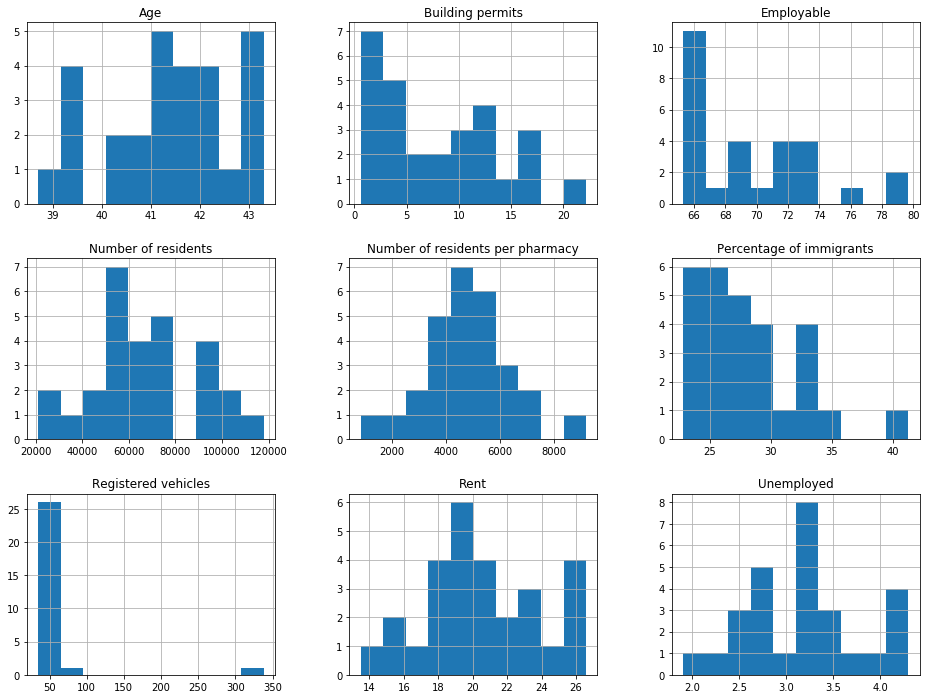

In [73]:
#hist_toplot_pandas = hist_toplot.hist(bins=10,figsize=(16,12))
hist_toplot_pandas = hist.hist(bins=10,figsize=(16,12))

# Lets cluster this data of the neighborhoods with K means

In [76]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy,registervehi
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0,338.1
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6,53.8
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9,37.2
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4,42.1
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2,49.7
5,Westpark,19.76,3.6,69.3,4.6,41.4,60498,29.5,6049.8,45.5
6,Schwabing-West,26.59,2.4,72.2,2.2,40.9,68935,22.8,4923.9,35.6
7,Freimann,20.87,2.8,72.7,8.9,39.5,78657,29.6,3932.9,57.7
8,Milbertshofen-Am Hart,21.91,4.2,72.2,4.1,39.6,76559,41.3,5103.9,76.2
9,Feldmoching-Hasenbergl,19.61,4.1,66.6,5.8,41.5,62069,32.8,6896.6,44.6


In [77]:
#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['residperpharmacy', 'unemployed', 'employable', 'buildingpermits', 'age', 'residentnumber', 'nongermanpropor', 'registervehi']] .values.astype(float)
#X[0:10]

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main.values[:,1:]
X[0:10]

array([[25.77, 1.9, 73.6, 2.6, 41.7, 21126, 26.0, 845.0, 338.1],
       [25.0, 2.2, 79.7, 10.6, 38.7, 51834, 25.6, 3239.6, 53.8],
       [25.68, 2.9, 78.6, 4.0, 39.2, 51933, 28.3, 2163.9, 37.2],
       [21.22, 3.4, 75.6, 0.6, 39.2, 29611, 32.6, 3701.4, 42.1],
       [20.0, 4.0, 68.8, 7.9, 41.5, 54871, 32.2, 5487.2, 49.7],
       [19.76, 3.6, 69.3, 4.6, 41.4, 60498, 29.5, 6049.8, 45.5],
       [26.59, 2.4, 72.2, 2.2, 40.9, 68935, 22.8, 4923.9, 35.6],
       [20.87, 2.8, 72.7, 8.9, 39.5, 78657, 29.6, 3932.9, 57.7],
       [21.91, 4.2, 72.2, 4.1, 39.6, 76559, 41.3, 5103.9, 76.2],
       [19.61, 4.1, 66.6, 5.8, 41.5, 62069, 32.8, 6896.6, 44.6]],
      dtype=object)

In [79]:
#munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main.columns

cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[0:10]

array([[ 1.59176408, -2.02486479,  0.96207907, -0.96442154,  0.29331162,
        -1.98394477, -0.51284969, -2.52958111,  5.13447363],
       [ 1.3525779 , -1.53750478,  2.51816907,  0.43022291, -2.09874432,
        -0.67093747, -0.6090627 , -1.03648402, -0.06089237],
       [ 1.56380725, -0.40033143,  2.23756267, -0.72035876, -1.70006833,
        -0.66670445,  0.0403751 , -1.70721171, -0.36424473],
       [ 0.17839118,  0.41193524,  1.47227251, -1.31308265, -1.70006833,
        -1.62114462,  1.07466494, -0.74853938, -0.27470096],
       [-0.20057914,  1.38665526, -0.2623852 , -0.04046959,  0.13384123,
        -0.54108196,  0.97845193,  0.36495464, -0.13581675],
       [-0.27513067,  0.73684192, -0.13483684, -0.61576043,  0.05410603,
        -0.30048367,  0.32901413,  0.71575078, -0.21256855],
       [ 1.84648183, -1.21259811,  0.60494365, -1.03415376, -0.34456996,
         0.0602641 , -1.28255376,  0.01372204, -0.39348351],
       [ 0.06967019, -0.56278477,  0.73249202,  0.13386096, -1

In [80]:
# There is no Y because we are dealing with unlabeled data, this is unsupervised learning
#y = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main['rent'].values.round()  #.astype(float)
#y[0:10]

## Considering a K=3, the neighborhoods will be clustered 

In [81]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)
print(labels.shape)

[2 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1]
(28,)


In [82]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main["Labels"] = labels

In [83]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy,registervehi,Labels
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0,338.1,2
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6,53.8,0
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9,37.2,0
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4,42.1,0
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2,49.7,1


We can easily check the centroid values by averaging the features in each cluster.


In [84]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main.groupby('Labels').mean()

,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy,registervehi
Labels,,,,,,,,,
0,23.141818,3.063636,73.581818,4.163636,40.154545,65555.181818,28.863636,3976.436364,45.409091
1,18.609375,3.281250,67.012500,11.206250,42.118750,71780.187500,27.762500,5791.700000,47.631250
2,25.770000,1.900000,73.600000,2.600000,41.700000,21126.000000,26.000000,845.000000,338.100000


k-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

# Now lets try to find the optimum k by the elbow method and lets select only 3 parameters for clustering, in order to ease the analysis

In [85]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [86]:
munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main#.head()

,Neighborhood,rent,unemployed,employable,buildingpermits,age,residentnumber,nongermanpropor,residperpharmacy,registervehi,Labels
0,Altstadt-Lehel,25.77,1.9,73.6,2.6,41.7,21126,26.0,845.0,338.1,2
1,Maxvorstadt,25.00,2.2,79.7,10.6,38.7,51834,25.6,3239.6,53.8,0
2,Ludwigsvorstadt-Isarvorstadt,25.68,2.9,78.6,4.0,39.2,51933,28.3,2163.9,37.2,0
3,Schwanthalerhöhe,21.22,3.4,75.6,0.6,39.2,29611,32.6,3701.4,42.1,0
4,Moosach,20.00,4.0,68.8,7.9,41.5,54871,32.2,5487.2,49.7,1
5,Westpark,19.76,3.6,69.3,4.6,41.4,60498,29.5,6049.8,45.5,1
6,Schwabing-West,26.59,2.4,72.2,2.2,40.9,68935,22.8,4923.9,35.6,0
7,Freimann,20.87,2.8,72.7,8.9,39.5,78657,29.6,3932.9,57.7,0
8,Milbertshofen-Am Hart,21.91,4.2,72.2,4.1,39.6,76559,41.3,5103.9,76.2,0
9,Feldmoching-Hasenbergl,19.61,4.1,66.6,5.8,41.5,62069,32.8,6896.6,44.6,1


In [87]:
#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','unemployed','employable','buildingpermits','age','residentnumber','nongermanpropor','residperpharmacy','registervehi']]

#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['buildingpermits','unemployed','employable']]  # 3is optimal

#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','buildingpermits','unemployed','residentnumber']]
X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','buildingpermits','unemployed']]
Xk3 = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','buildingpermits','unemployed']]

#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','unemployed','employable']]
#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','unemployed','employable','buildingpermits','age','residentnumber','nongermanpropor']]
#X = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main[['rent','buildingpermits','age','residentnumber','nongermanpropor']]

In [88]:
X[0:3]

,rent,buildingpermits,unemployed
0,25.77,2.6,1.9
1,25.00,10.6,2.2
2,25.68,4.0,2.9


In [89]:
XKMeans = X.values.astype(float)
XKMeans[0:3]

array([[25.77,  2.6 ,  1.9 ],
       [25.  , 10.6 ,  2.2 ],
       [25.68,  4.  ,  2.9 ]])

In [90]:
cluster_dataset = StandardScaler().fit_transform(XKMeans)
cluster_dataset[0:3]

array([[ 1.59176408, -0.96442154, -2.02486479],
       [ 1.3525779 ,  0.43022291, -1.53750478],
       [ 1.56380725, -0.72035876, -0.40033143]])

In [91]:
# 

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_dataset)
    Sum_of_squared_distances.append(km.inertia_)

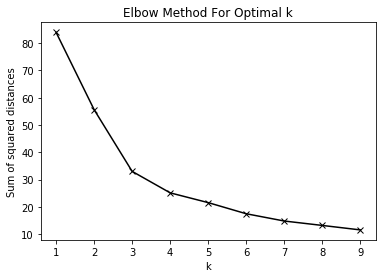

In [92]:
plt.plot(K, Sum_of_squared_distances, 'kx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

plt.savefig('ElbowPlot.png',dpi=300)

plt.show()

In [93]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)
print(labels.shape)

[1 1 1 2 2 2 1 0 2 2 0 0 0 0 2 0 0 0 0 1 2 2 0 0 1 1 2 0]
(28,)


In [94]:
Xk3["Labelsk3"] = labels

C:\Users\ingda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
Xk3.head()

,rent,buildingpermits,unemployed,Labelsk3
0,25.77,2.6,1.9,1
1,25.00,10.6,2.2,1
2,25.68,4.0,2.9,1
3,21.22,0.6,3.4,2
4,20.00,7.9,4.0,2


In [97]:
Clustering_results = Xk3.groupby('Labelsk3').mean()
Clustering_results

,rent,buildingpermits,unemployed
Labelsk3,,,
0,18.962500,13.250000,2.991667
1,24.507143,4.085714,2.500000
2,19.886667,4.455556,3.855556


In [98]:
Clustering_results_forreport= Clustering_results.copy().reset_index()

In [103]:
Clustering_results_forreport.rename(columns={"Labelsk3": "Labels with k=3", "rent": "Rent","buildingpermits": "Building permits","unemployed": "Unemployed"})

,Labels with k=3,Rent,Building permits,Unemployed
0,0,18.962500,13.250000,2.991667
1,1,24.507143,4.085714,2.500000
2,2,19.886667,4.455556,3.855556


In [106]:
Xk3.head()

,rent,buildingpermits,unemployed,Labelsk3
0,25.77,2.6,1.9,1
1,25.00,10.6,2.2,1
2,25.68,4.0,2.9,1
3,21.22,0.6,3.4,2
4,20.00,7.9,4.0,2


# therefore, the clusters are:
<br>1 low rent, rapid growth, AND with middle unemployment
<br>2 middle rent, slow growth, AND high unemployment
<br>3 high rent, slow growth, low unemployment

In [107]:
Neighborhood = munich_rent_unemployed_employable_buildingpermits_age_residentnumber_nongermanpropor_residperpharmacy_registervehi_main['Neighborhood']
Neighborhood 

0                   Altstadt-Lehel
1                      Maxvorstadt
2     Ludwigsvorstadt-Isarvorstadt
3                 Schwanthalerhöhe
4                          Moosach
5                         Westpark
6                   Schwabing-West
7                         Freimann
8            Milbertshofen-Am Hart
9           Feldmoching-Hasenbergl
10             Allach-Untermenzing
11                          Pasing
12      Aubing-Lochhausen-Langwied
13        Thalkirchen-Obersendling
14                            Laim
15                          Hadern
16         Forstenried-Fürstenried
17                           Solln
18                     Obermenzing
19                   Au-Haidhausen
20              Ramersdorf-Perlach
21                    Berg am Laim
22                     Bogenhausen
23                       Trudering
24                       Neuhausen
25                     Nymphenburg
26                         Giesing
27                      Harlaching
Name: Neighborhood, 

In [108]:
Xk3['Neighborhood']= Neighborhood


C:\Users\ingda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
Xk3 # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11

,rent,buildingpermits,unemployed,Labelsk3,Neighborhood
0,25.77,2.6,1.9,1,Altstadt-Lehel
1,25.00,10.6,2.2,1,Maxvorstadt
2,25.68,4.0,2.9,1,Ludwigsvorstadt-Isarvorstadt
3,21.22,0.6,3.4,2,Schwanthalerhöhe
4,20.00,7.9,4.0,2,Moosach
5,19.76,4.6,3.6,2,Westpark
6,26.59,2.2,2.4,1,Schwabing-West
7,20.87,8.9,2.8,0,Freimann
8,21.91,4.1,4.2,2,Milbertshofen-Am Hart
9,19.61,5.8,4.1,2,Feldmoching-Hasenbergl


## This is the final result of K-means clustering

In [110]:
Neighborhood_Clustering = Xk3.rename(columns={"rent": "Rent","buildingpermits": "Building permits","unemployed": "Unemployed","Labelsk3": "Labels with k=3"})
Neighborhood_Clustering.head()

,Rent,Building permits,Unemployed,Labels with k=3,Neighborhood
0,25.77,2.6,1.9,1,Altstadt-Lehel
1,25.00,10.6,2.2,1,Maxvorstadt
2,25.68,4.0,2.9,1,Ludwigsvorstadt-Isarvorstadt
3,21.22,0.6,3.4,2,Schwanthalerhöhe
4,20.00,7.9,4.0,2,Moosach


In [111]:
Neighborhood_Clustering

,Rent,Building permits,Unemployed,Labels with k=3,Neighborhood
0,25.77,2.6,1.9,1,Altstadt-Lehel
1,25.00,10.6,2.2,1,Maxvorstadt
2,25.68,4.0,2.9,1,Ludwigsvorstadt-Isarvorstadt
3,21.22,0.6,3.4,2,Schwanthalerhöhe
4,20.00,7.9,4.0,2,Moosach
5,19.76,4.6,3.6,2,Westpark
6,26.59,2.2,2.4,1,Schwabing-West
7,20.87,8.9,2.8,0,Freimann
8,21.91,4.1,4.2,2,Milbertshofen-Am Hart
9,19.61,5.8,4.1,2,Feldmoching-Hasenbergl


# these are all loaded statistical data

In [510]:
df_munich_rent = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="cost_rent",header=0)#
df_munich_unemployed = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="unemployed",header=0 )
df_munich_employable_rate = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="employable_rate",header=0)#
df_munich_building_permits = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="building_permits",header=0)#
df_munich_age = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="age",header=0)#
df_munich_resident_number = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="resident_number",header=0)#
df_munich_non_german_proportion = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="non_german_proportion",header=0)#
df_munich_residents_per_pharmacy = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="residents_per_pharmacy",header=0)#
df_munich_register_vehicle_by_population = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="register_vehicle_by_population",header=0)#


In [112]:
df_munich_resident_number.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Munich City,1560033,1542196,1526045,1542849,1521672,1489758,1463976,1438425,1409612,1381067
1,Altstadt-Lehel,21126,21100,20926,21454,21122,20801,20416,20041,19700,19198
2,Ludwigsvorstadt-Isarvorstadt,51933,51644,51632,54915,54049,52153,50594,49628,48197,47323
3,Maxvorstadt,51834,51402,51311,53443,53743,52549,51614,50849,49468,48845
4,Schwabing-West,68935,68527,68265,69407,68527,67051,65848,64723,63595,62803


In [103]:
#df_munich_resident_number_trans.head()

# Lets plot on a folium map the parameters used for clustering of the neighborhood. These plots have been added into the assigment

In [113]:
munich_neighborhood_forplot = munich_rentand_age_coordinates[['df_postalcode_screened_woduplicates_correctednames','latitude_Neighborhood','longitude_Neighborhood']]
munich_neighborhood_forplot.head()

,df_postalcode_screened_woduplicates_correctednames,latitude_Neighborhood,longitude_Neighborhood
0,Altstadt-Lehel,48.135388,11.580828
1,Maxvorstadt,48.149536,11.552303
2,Ludwigsvorstadt-Isarvorstadt,48.134124,11.556676
3,Schwanthalerhöhe,48.136274,11.538541
4,Moosach,48.162219,11.536121


In [114]:
munich_neighborhood_forplot_2 = munich_neighborhood_forplot.rename({'df_postalcode_screened_woduplicates_correctednames': 'Neighborhood', 'latitude_Neighborhood': 'Latitude','longitude_Neighborhood': 'Longitude'}, axis=1)
munich_neighborhood_forplot_2.head() 

,Neighborhood,Latitude,Longitude
0,Altstadt-Lehel,48.135388,11.580828
1,Maxvorstadt,48.149536,11.552303
2,Ludwigsvorstadt-Isarvorstadt,48.134124,11.556676
3,Schwanthalerhöhe,48.136274,11.538541
4,Moosach,48.162219,11.536121


In [115]:
## this is just for reference

#can we join a folium map with a cloropeth?

# coordinates of city centre, considering Frauenplatz 12, 80331 München (Frauenkirche)
#48.135388	11.580828

latitude_citycentre = 48.135388
longitude_citycentre = 11.580828

# create map
map_munich_onlyneighborhood_forassigment = folium.Map(location=[latitude_citycentre, longitude_citycentre], zoom_start=12)

# add markers to the map
#markers_colors = []
for lat, lon, poi in zip(munich_neighborhood_forplot_2['Latitude'], munich_neighborhood_forplot_2['Longitude'], munich_neighborhood_forplot_2['Neighborhood']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        #color=rainbow[cluster-7],
        color='blue',
        fill=True,
        #fill_color=rainbow[cluster-7],
        fill_color='blue',
        fill_opacity=0.7).add_to(map_munich_onlyneighborhood_forassigment)
       
#map_clusters_munichneighborhood
map_munich_onlyneighborhood_forassigment

In [116]:
map_munich_onlyneighborhood_forassigment.save('munich_map_onlyneighborhood.html')

In [117]:
munich_geo ={"type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.616604,48.133716],[11.617907,48.133867],[11.618877,48.133901],[11.637633,48.133649],[11.639103,48.133524],[11.647885,48.13203],[11.647094,48.130461],[11.646122,48.128531],[11.644793,48.126051],[11.644683,48.125825],[11.643301,48.1232],[11.642205,48.121247],[11.641901,48.12053],[11.639897,48.116941],[11.640003,48.117344],[11.638969,48.117626],[11.638692,48.117295],[11.637762,48.11753],[11.636629,48.117723],[11.633964,48.118102],[11.633051,48.118246],[11.633221,48.118588],[11.632939,48.118643],[11.632771,48.118298],[11.631485,48.118595],[11.629625,48.119029],[11.627934,48.119403],[11.626137,48.11977],[11.625158,48.119925],[11.624171,48.120052],[11.621857,48.120227],[11.620185,48.120337],[11.618389,48.120455],[11.616589,48.120578],[11.612926,48.120834],[11.611541,48.120939],[11.610112,48.120998],[11.608799,48.120984],[11.607024,48.120883],[11.606077,48.120779],[11.604007,48.1228],[11.60219,48.123869],[11.603161,48.124544],[11.603331,48.124662],[11.603611,48.124856],[11.607172,48.127224],[11.607605,48.127512],[11.607728,48.127597],[11.608997,48.128481],[11.60971,48.129058],[11.611343,48.130947],[11.611745,48.131487],[11.612126,48.131726],[11.614532,48.133236],[11.615476,48.133506],[11.616011,48.133593],[11.616604,48.133716]]]]},"properties":{"name":"Berg am Laim","munich_ren":15.54,"munich_r_1":81.6,"munich_r_2":20,"cartodb_id":15,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.535038,48.13033],[11.532614,48.131909],[11.532156,48.132346],[11.529181,48.13454],[11.527371,48.135834],[11.526602,48.136649],[11.526414,48.137036],[11.526271,48.137553],[11.526191,48.137894],[11.526333,48.139106],[11.528204,48.141243],[11.530302,48.142512],[11.531049,48.142756],[11.533505,48.142628],[11.53461,48.142585],[11.535228,48.142526],[11.535695,48.142483],[11.536504,48.142398],[11.53763,48.142369],[11.538344,48.142373],[11.53951,48.142203],[11.541572,48.141543],[11.543293,48.141089],[11.544579,48.141051],[11.546322,48.140937],[11.548344,48.140727],[11.548196,48.140326],[11.547851,48.140017],[11.547436,48.139617],[11.547049,48.139247],[11.549787,48.138952],[11.549744,48.137583],[11.549722,48.136837],[11.548316,48.135821],[11.547825,48.135521],[11.547406,48.134983],[11.547187,48.13445],[11.547129,48.133854],[11.547086,48.133176],[11.547005,48.132899],[11.546909,48.1327],[11.54635,48.13209],[11.545397,48.131518],[11.545087,48.129493],[11.544825,48.127782],[11.544648,48.127186],[11.544473,48.126823],[11.54419,48.126496],[11.543975,48.126579],[11.538836,48.128929],[11.535038,48.13033]]]]},"properties":{"name":"Schwanthalerhöhe","munich_ren":-99,"munich_r_1":66,"munich_r_2":8,"cartodb_id":8,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.58211,48.133721],[11.580517,48.133852],[11.580038,48.133886],[11.579401,48.133932],[11.577978,48.133584],[11.576243,48.133102],[11.573698,48.132443],[11.571505,48.131296],[11.568477,48.131274],[11.568149,48.131497],[11.567556,48.132],[11.566952,48.133067],[11.56672,48.13341],[11.566632,48.133538],[11.565678,48.135086],[11.564983,48.136264],[11.564963,48.137113],[11.565134,48.137929],[11.565165,48.13808],[11.565175,48.138164],[11.5652,48.138538],[11.565222,48.138833],[11.565224,48.139074],[11.565392,48.139297],[11.565615,48.139527],[11.573828,48.143433],[11.57557,48.143057],[11.576577,48.142834],[11.576887,48.142768],[11.5775,48.142611],[11.578364,48.144177],[11.583859,48.142976],[11.584123,48.1435],[11.584246,48.143768],[11.584306,48.143979],[11.584371,48.144249],[11.584411,48.14468],[11.584541,48.146064],[11.584857,48.149409],[11.586096,48.149839],[11.586825,48.150655],[11.587554,48.151836],[11.588647,48.152878],[11.589155,48.153143],[11.589239,48.153464],[11.589578,48.153785],[11.590128,48.154423],[11.590403,48.154982],[11.590301,48.155597],[11.59035,48.156576],[11.59101,48.156558],[11.591686,48.156447],[11.593348,48.152856],[11.59413,48.151624],[11.595232,48.150735],[11.596603,48.150067],[11.597753,48.149553],[11.597802,48.149529],[11.599114,48.148957],[11.598277,48.148404],[11.596928,48.145787],[11.595217,48.141662],[11.594405,48.14033],[11.592787,48.137678],[11.59153,48.136013],[11.590889,48.135541],[11.589234,48.134258],[11.588568,48.133468],[11.587078,48.131661],[11.586551,48.131775],[11.586362,48.131826],[11.585977,48.131944],[11.584913,48.132324],[11.583538,48.133057],[11.582821,48.133944],[11.582593,48.133864],[11.58211,48.133721]]]]},"properties":{"name":"Altstadt-Lehel","munich_ren":18.71,"munich_r_1":84.6,"munich_r_2":33,"cartodb_id":12,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.459797,48.211707],[11.460079,48.211754],[11.460213,48.211811],[11.460257,48.211828],[11.460422,48.212025],[11.460512,48.212238],[11.460529,48.212394],[11.46038,48.212718],[11.460337,48.212844],[11.460385,48.212884],[11.460413,48.212919],[11.46045,48.213014],[11.460504,48.213086],[11.460537,48.213142],[11.460812,48.213458],[11.4612,48.213856],[11.461292,48.214004],[11.461642,48.214348],[11.461906,48.214555],[11.462278,48.214807],[11.462669,48.215049],[11.462732,48.215088],[11.463238,48.21533],[11.464758,48.215966],[11.465797,48.21645],[11.466466,48.216762],[11.467626,48.217383],[11.469408,48.218191],[11.470211,48.218555],[11.470239,48.218565],[11.470861,48.218803],[11.470976,48.218846],[11.471445,48.219028],[11.47188,48.219177],[11.472796,48.219392],[11.473095,48.219445],[11.476189,48.219606],[11.476677,48.219625],[11.476908,48.219681],[11.480179,48.216796],[11.483354,48.213861],[11.484328,48.21285],[11.485062,48.211736],[11.485155,48.210118],[11.48571,48.208365],[11.486882,48.206706],[11.490677,48.202404],[11.493182,48.199685],[11.494206,48.198705],[11.49452,48.19861],[11.493007,48.198847],[11.488044,48.198919],[11.486788,48.199105],[11.482432,48.200084],[11.475008,48.20258],[11.470781,48.203617],[11.468775,48.204275],[11.468464,48.203881],[11.472497,48.202065],[11.475255,48.199662],[11.476381,48.198954],[11.479954,48.197152],[11.481389,48.196843],[11.484968,48.196074],[11.486001,48.195967],[11.487547,48.195588],[11.488985,48.195044],[11.489199,48.194965],[11.490266,48.190002],[11.490387,48.189367],[11.490091,48.18908],[11.490071,48.188818],[11.48997,48.188241],[11.489845,48.187775],[11.489953,48.186861],[11.489837,48.186337],[11.489968,48.18617],[11.490071,48.185926],[11.490056,48.184784],[11.490009,48.184551],[11.490011,48.184028],[11.490013,48.183519],[11.489849,48.181892],[11.489778,48.179886],[11.489396,48.178951],[11.489287,48.177933],[11.489087,48.176453],[11.488798,48.175142],[11.489337,48.1752],[11.489396,48.174187],[11.490662,48.174132],[11.490632,48.173184],[11.491208,48.17267],[11.488571,48.172362],[11.488358,48.172378],[11.488332,48.172494],[11.485539,48.172421],[11.48514,48.172392],[11.484669,48.17236],[11.484499,48.172344],[11.483875,48.172191],[11.483751,48.17213],[11.483094,48.171801],[11.481895,48.170807],[11.48061,48.171792],[11.479158,48.172513],[11.478545,48.17294],[11.477401,48.173766],[11.477235,48.173895],[11.477044,48.174033],[11.476475,48.174457],[11.474979,48.175546],[11.47472,48.175834],[11.473457,48.176063],[11.472437,48.17634],[11.470123,48.175326],[11.465849,48.174876],[11.46557,48.174597],[11.464336,48.174461],[11.464124,48.174729],[11.463319,48.174765],[11.46215,48.174579],[11.460805,48.174467],[11.460581,48.174455],[11.460548,48.174786],[11.456998,48.174196],[11.45688,48.17547],[11.4529,48.174728],[11.451458,48.174214],[11.449725,48.173899],[11.448866,48.17356],[11.447525,48.174633],[11.446673,48.175091],[11.44582,48.175463],[11.445127,48.175624],[11.443363,48.175763],[11.442756,48.175702],[11.441834,48.175463],[11.441575,48.175429],[11.438287,48.17744],[11.436553,48.178578],[11.432627,48.181225],[11.431685,48.186057],[11.43047,48.188748],[11.430894,48.193415],[11.430952,48.194076],[11.431962,48.205155],[11.432116,48.20518],[11.432453,48.205233],[11.432505,48.205239],[11.432797,48.205297],[11.432748,48.205745],[11.43587,48.205786],[11.438405,48.205808],[11.438624,48.20581],[11.43862,48.206191],[11.440821,48.206267],[11.441252,48.206282],[11.4427,48.206336],[11.443596,48.20637],[11.443875,48.20664],[11.444187,48.206947],[11.445903,48.207216],[11.447556,48.207475],[11.450401,48.207876],[11.452291,48.208146],[11.455221,48.208512],[11.457542,48.208823],[11.457597,48.20883],[11.457668,48.20884],[11.45785,48.20886],[11.458134,48.209244],[11.458195,48.209347],[11.45836,48.209623],[11.458425,48.209731],[11.458454,48.209852],[11.458557,48.209993],[11.458602,48.210045],[11.458817,48.210567],[11.458944,48.210962],[11.459087,48.211387],[11.459147,48.211571],[11.459174,48.211593],[11.459274,48.211622],[11.459485,48.211656],[11.459797,48.211707]]]]},"properties":{"name":"Allach-Untermenzing","munich_ren":11.9,"munich_r_1":85.1,"munich_r_2":12,"cartodb_id":4,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.472219,48.130075],[11.475911,48.131171],[11.482935,48.130176],[11.484252,48.130192],[11.485618,48.130165],[11.486955,48.130131],[11.488038,48.130097],[11.488925,48.130022],[11.490948,48.129808],[11.49223,48.129537],[11.496196,48.127372],[11.497245,48.126492],[11.498028,48.125399],[11.49958,48.125653],[11.500396,48.125731],[11.502368,48.125841],[11.502959,48.125506],[11.502578,48.1156],[11.502335,48.112175],[11.502331,48.112118],[11.502328,48.112028],[11.502388,48.105673],[11.50239,48.105473],[11.502145,48.104653],[11.501674,48.102726],[11.501816,48.102277],[11.500146,48.101957],[11.499457,48.101637],[11.499419,48.101629],[11.499281,48.101663],[11.494272,48.099213],[11.491533,48.09813],[11.488283,48.096517],[11.487284,48.096002],[11.480744,48.095847],[11.4765,48.102661],[11.4762,48.103201],[11.475762,48.103392],[11.475453,48.103508],[11.474793,48.103457],[11.474603,48.103581],[11.47447,48.103631],[11.474406,48.103667],[11.474049,48.103827],[11.474634,48.104585],[11.474197,48.104676],[11.472246,48.104975],[11.471984,48.105025],[11.471467,48.105123],[11.471241,48.105124],[11.471151,48.105164],[11.47099,48.105224],[11.469445,48.105795],[11.469471,48.105422],[11.469487,48.105289],[11.46928,48.105311],[11.468527,48.105314],[11.467236,48.105318],[11.465232,48.105331],[11.463823,48.105364],[11.463669,48.105371],[11.463089,48.105373],[11.463092,48.105464],[11.463097,48.105519],[11.46314,48.105759],[11.463207,48.1061],[11.463263,48.106308],[11.463325,48.106602],[11.463382,48.107035],[11.463426,48.107341],[11.463485,48.10783],[11.463359,48.108041],[11.463402,48.108132],[11.463467,48.108268],[11.463493,48.108567],[11.463511,48.108823],[11.463513,48.108845],[11.4633,48.109215],[11.463078,48.109601],[11.463262,48.110374],[11.463219,48.110886],[11.463211,48.111046],[11.463205,48.111177],[11.463286,48.111415],[11.463484,48.111991],[11.463553,48.112217],[11.463594,48.112598],[11.463286,48.113357],[11.46344,48.113879],[11.463429,48.114068],[11.463421,48.114198],[11.463407,48.114394],[11.463405,48.114457],[11.463401,48.11452],[11.463397,48.114581],[11.463396,48.114683],[11.463918,48.114725],[11.464089,48.114736],[11.464814,48.11476],[11.464827,48.114818],[11.46484,48.114865],[11.464861,48.115441],[11.464868,48.115462],[11.464929,48.115548],[11.464973,48.115617],[11.465003,48.115658],[11.465041,48.115758],[11.465086,48.115953],[11.465377,48.117141],[11.465409,48.117239],[11.465445,48.117347],[11.46549,48.117546],[11.465536,48.117778],[11.465575,48.118017],[11.465578,48.118143],[11.46557,48.118217],[11.46558,48.118393],[11.46557,48.118794],[11.46553,48.119225],[11.465469,48.119801],[11.465413,48.120163],[11.465383,48.120307],[11.465324,48.120485],[11.465269,48.120685],[11.46515,48.120966],[11.464869,48.121645],[11.464734,48.121955],[11.464691,48.122076],[11.464656,48.122209],[11.464619,48.122395],[11.464586,48.12274],[11.46458,48.122999],[11.464505,48.123109],[11.464443,48.123413],[11.464432,48.123648],[11.464438,48.123909],[11.464452,48.12398],[11.464469,48.124056],[11.464524,48.124312],[11.464521,48.124456],[11.464545,48.124665],[11.464678,48.125443],[11.464803,48.126457],[11.464885,48.127054],[11.464891,48.127105],[11.464891,48.127421],[11.464883,48.127664],[11.464873,48.127816],[11.464809,48.128093],[11.464787,48.128163],[11.464744,48.1283],[11.464708,48.128404],[11.464526,48.129115],[11.464516,48.129147],[11.464502,48.129151],[11.464217,48.129214],[11.467406,48.129652],[11.472219,48.130075]]]]},"properties":{"name":"Hadern","munich_ren":14.28,"munich_r_1":67.3,"munich_r_2":10,"cartodb_id":2,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.567936,48.122751],[11.571297,48.124632],[11.576751,48.127465],[11.578029,48.128129],[11.578699,48.127974],[11.581352,48.128273],[11.582645,48.128355],[11.583452,48.128646],[11.584639,48.129127],[11.586788,48.130869],[11.587078,48.131661],[11.588568,48.133468],[11.589234,48.134258],[11.590889,48.135541],[11.59153,48.136013],[11.592787,48.137678],[11.594405,48.14033],[11.595217,48.141662],[11.59561,48.141575],[11.59572,48.141528],[11.595787,48.141461],[11.595798,48.141338],[11.595553,48.140663],[11.595585,48.14053],[11.595753,48.14041],[11.595879,48.140346],[11.596138,48.140313],[11.596442,48.140316],[11.5966,48.140442],[11.596965,48.141024],[11.597082,48.141097],[11.597217,48.141121],[11.598168,48.140944],[11.598726,48.140855],[11.600034,48.140484],[11.604326,48.139862],[11.606181,48.139654],[11.606561,48.139607],[11.607082,48.139248],[11.607383,48.139041],[11.609116,48.138802],[11.61157,48.138479],[11.612997,48.13832],[11.614655,48.138226],[11.617045,48.138144],[11.623568,48.138293],[11.621769,48.137646],[11.615176,48.136954],[11.616604,48.133716],[11.616011,48.133593],[11.615476,48.133506],[11.614532,48.133236],[11.612126,48.131726],[11.611745,48.131487],[11.611343,48.130947],[11.60971,48.129058],[11.608997,48.128481],[11.607728,48.127597],[11.607605,48.127512],[11.607172,48.127224],[11.603611,48.124856],[11.603331,48.124662],[11.603161,48.124544],[11.60219,48.123869],[11.601983,48.123994],[11.600898,48.124651],[11.600489,48.124399],[11.598016,48.122875],[11.595966,48.122337],[11.593848,48.121899],[11.582193,48.119905],[11.577141,48.118741],[11.575303,48.119485],[11.572996,48.120358],[11.572786,48.120458],[11.568989,48.121912],[11.568472,48.122292],[11.568149,48.122571],[11.567936,48.122751]],[[11.598016,48.122875],[11.597309,48.123587],[11.597673,48.123203],[11.598016,48.122875]]]]},"properties":{"name":"Au-Haidhausen","munich_ren":15.82,"munich_r_1":83.8,"munich_r_2":39,"cartodb_id":14,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.491492,48.168291],[11.491273,48.168102],[11.49153,48.167857],[11.491691,48.165538],[11.491864,48.16541],[11.491835,48.165141],[11.4914,48.164899],[11.489825,48.16408],[11.489144,48.163239],[11.488563,48.162604],[11.488058,48.162709],[11.487837,48.162622],[11.487462,48.162508],[11.486855,48.162367],[11.486424,48.162318],[11.486173,48.162301],[11.485954,48.162293],[11.485281,48.162316],[11.484785,48.162366],[11.484208,48.162469],[11.483707,48.162566],[11.483348,48.162683],[11.481812,48.160497],[11.481235,48.158203],[11.481331,48.157405],[11.481447,48.156746],[11.48176,48.155904],[11.481898,48.155527],[11.480936,48.155521],[11.479877,48.155705],[11.47982,48.155521],[11.479734,48.155414],[11.478908,48.155285],[11.478694,48.155077],[11.477953,48.155199],[11.4779,48.155092],[11.472728,48.155099],[11.472707,48.155049],[11.470679,48.155034],[11.470132,48.154741],[11.466999,48.154813],[11.466238,48.154777],[11.466173,48.154691],[11.465883,48.154691],[11.463923,48.154806],[11.46388,48.154488],[11.463237,48.154522],[11.463279,48.154923],[11.462603,48.154964],[11.462566,48.15456],[11.46137,48.154594],[11.461402,48.154787],[11.459739,48.154802],[11.458773,48.154437],[11.458237,48.153807],[11.457293,48.154387],[11.45395,48.154652],[11.45262,48.154635],[11.452626,48.155023],[11.451016,48.155038],[11.451019,48.155424],[11.448385,48.155415],[11.446515,48.156413],[11.445797,48.155848],[11.444965,48.156306],[11.432388,48.163075],[11.433866,48.164088],[11.434944,48.165684],[11.436897,48.167116],[11.439858,48.169191],[11.440597,48.16969],[11.438036,48.171344],[11.439427,48.172301],[11.439159,48.172895],[11.438794,48.173167],[11.438258,48.17341],[11.43785,48.173754],[11.437764,48.174026],[11.43755,48.174927],[11.439932,48.174999],[11.440846,48.175203],[11.441575,48.175429],[11.441834,48.175463],[11.442756,48.175702],[11.443363,48.175763],[11.445127,48.175624],[11.44582,48.175463],[11.446673,48.175091],[11.447525,48.174633],[11.448866,48.17356],[11.449725,48.173899],[11.451458,48.174214],[11.4529,48.174728],[11.45688,48.17547],[11.456998,48.174196],[11.460548,48.174786],[11.460581,48.174455],[11.460805,48.174467],[11.46215,48.174579],[11.463319,48.174765],[11.464124,48.174729],[11.464336,48.174461],[11.46557,48.174597],[11.465849,48.174876],[11.470123,48.175326],[11.472437,48.17634],[11.473457,48.176063],[11.47472,48.175834],[11.474979,48.175546],[11.476475,48.174457],[11.477044,48.174033],[11.477235,48.173895],[11.477401,48.173766],[11.478545,48.17294],[11.479158,48.172513],[11.48061,48.171792],[11.481895,48.170807],[11.483094,48.171801],[11.483751,48.17213],[11.483875,48.172191],[11.484499,48.172344],[11.484669,48.17236],[11.48514,48.172392],[11.485539,48.172421],[11.488332,48.172494],[11.488358,48.172378],[11.488571,48.172362],[11.491208,48.17267],[11.491273,48.171738],[11.49112,48.171628],[11.491101,48.171524],[11.491281,48.171433],[11.491504,48.168306],[11.491492,48.168291]]]]},"properties":{"name":"Obermenzing","munich_ren":12.77,"munich_r_1":79.4,"munich_r_2":19,"cartodb_id":19,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.536215,48.167726],[11.538072,48.168095],[11.540847,48.168721],[11.542301,48.169161],[11.543262,48.169431],[11.544097,48.169645],[11.544806,48.169846],[11.546156,48.170013],[11.547389,48.170266],[11.548228,48.170537],[11.548818,48.169846],[11.549406,48.168952],[11.5499,48.168437],[11.550176,48.168342],[11.550677,48.168181],[11.551446,48.168242],[11.552926,48.168373],[11.553584,48.168294],[11.553897,48.168077],[11.554536,48.167699],[11.553603,48.167025],[11.553395,48.166381],[11.55306,48.165404],[11.552971,48.163894],[11.552887,48.161455],[11.551519,48.161431],[11.550746,48.161316],[11.549387,48.160562],[11.555437,48.155963],[11.553094,48.154867],[11.547222,48.151711],[11.548933,48.15103],[11.54765,48.149687],[11.546532,48.149869],[11.545954,48.149101],[11.545621,48.148704],[11.544982,48.148087],[11.544296,48.147656],[11.543879,48.147167],[11.543093,48.14678],[11.542727,48.146977],[11.542145,48.146492],[11.541855,48.146661],[11.541153,48.146041],[11.541681,48.145757],[11.541417,48.145395],[11.541868,48.145218],[11.541432,48.145043],[11.541004,48.144667],[11.538344,48.142373],[11.53763,48.142369],[11.536504,48.142398],[11.535695,48.142483],[11.535228,48.142526],[11.53461,48.142585],[11.533505,48.142628],[11.531049,48.142756],[11.530302,48.142512],[11.528204,48.141243],[11.527393,48.141223],[11.518999,48.141994],[11.520193,48.145532],[11.520384,48.146452],[11.520525,48.14769],[11.520282,48.150112],[11.520065,48.153482],[11.521562,48.153326],[11.522486,48.155661],[11.522528,48.155997],[11.522543,48.156127],[11.522579,48.156398],[11.522405,48.158897],[11.522372,48.159215],[11.522203,48.160972],[11.521733,48.162222],[11.521433,48.162677],[11.519424,48.164733],[11.517542,48.166828],[11.516732,48.167383],[11.516725,48.16777],[11.521994,48.168619],[11.524142,48.168782],[11.526937,48.168892],[11.527135,48.168916],[11.527269,48.169138],[11.530967,48.16936],[11.532974,48.169804],[11.536215,48.167726]]]]},"properties":{"name":"Neuhausen","munich_ren":15.61,"munich_r_1":73.8,"munich_r_2":30,"cartodb_id":22,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.58211,48.133721],[11.582593,48.133864],[11.582821,48.133944],[11.583538,48.133057],[11.584913,48.132324],[11.585977,48.131944],[11.586362,48.131826],[11.586551,48.131775],[11.587078,48.131661],[11.586788,48.130869],[11.584639,48.129127],[11.583452,48.128646],[11.582645,48.128355],[11.581352,48.128273],[11.578699,48.127974],[11.578029,48.128129],[11.576751,48.127465],[11.571297,48.124632],[11.567936,48.122751],[11.56248,48.119519],[11.5613,48.118563],[11.558255,48.120016],[11.557239,48.120522],[11.556686,48.120796],[11.553964,48.122117],[11.549043,48.124371],[11.548819,48.124475],[11.54854,48.124593],[11.545259,48.125994],[11.54419,48.126496],[11.544473,48.126823],[11.544648,48.127186],[11.544825,48.127782],[11.545087,48.129493],[11.545397,48.131518],[11.54635,48.13209],[11.546909,48.1327],[11.547005,48.132899],[11.547086,48.133176],[11.547129,48.133854],[11.547187,48.13445],[11.547406,48.134983],[11.547825,48.135521],[11.548316,48.135821],[11.549722,48.136837],[11.549744,48.137583],[11.549787,48.138952],[11.547049,48.139247],[11.547436,48.139617],[11.547851,48.140017],[11.548196,48.140326],[11.548344,48.140727],[11.548781,48.143558],[11.556102,48.142049],[11.56031,48.141358],[11.561168,48.141111],[11.5652,48.139791],[11.565615,48.139527],[11.565392,48.139297],[11.565224,48.139074],[11.565222,48.138833],[11.5652,48.138538],[11.565175,48.138164],[11.565165,48.13808],[11.565134,48.137929],[11.564963,48.137113],[11.564983,48.136264],[11.565678,48.135086],[11.566632,48.133538],[11.56672,48.13341],[11.566952,48.133067],[11.567556,48.132],[11.568149,48.131497],[11.568477,48.131274],[11.571505,48.131296],[11.573698,48.132443],[11.576243,48.133102],[11.577978,48.133584],[11.579401,48.133932],[11.580038,48.133886],[11.580517,48.133852],[11.58211,48.133721]]]]},"properties":{"name":"Ludwigsvorstadt-Isarvorstadt","munich_ren":16.49,"munich_r_1":85.2,"munich_r_2":42,"cartodb_id":9,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.545954,48.149101],[11.546532,48.149869],[11.54765,48.149687],[11.548933,48.15103],[11.547222,48.151711],[11.553094,48.154867],[11.555437,48.155963],[11.555952,48.155381],[11.560747,48.158041],[11.56057,48.157545],[11.562252,48.157173],[11.563946,48.156937],[11.56446,48.156876],[11.565895,48.156804],[11.567277,48.156761],[11.568663,48.156694],[11.569595,48.156649],[11.570591,48.156537],[11.573201,48.15576],[11.573351,48.155711],[11.575545,48.155064],[11.5785,48.154739],[11.579415,48.15462],[11.580634,48.154471],[11.582762,48.15412],[11.582849,48.154106],[11.582376,48.152987],[11.582428,48.15224],[11.582751,48.152031],[11.584583,48.151838],[11.585192,48.151755],[11.585303,48.151976],[11.585466,48.152166],[11.585846,48.152446],[11.587416,48.153148],[11.588487,48.152973],[11.589155,48.153143],[11.588647,48.152878],[11.587554,48.151836],[11.586825,48.150655],[11.586096,48.149839],[11.584857,48.149409],[11.584541,48.146064],[11.584411,48.14468],[11.584371,48.144249],[11.584306,48.143979],[11.584246,48.143768],[11.584123,48.1435],[11.583859,48.142976],[11.578364,48.144177],[11.5775,48.142611],[11.576887,48.142768],[11.576577,48.142834],[11.57557,48.143057],[11.573828,48.143433],[11.565615,48.139527],[11.5652,48.139791],[11.561168,48.141111],[11.56031,48.141358],[11.556102,48.142049],[11.548781,48.143558],[11.548344,48.140727],[11.546322,48.140937],[11.544579,48.141051],[11.543293,48.141089],[11.541572,48.141543],[11.53951,48.142203],[11.538344,48.142373],[11.541004,48.144667],[11.541432,48.145043],[11.541868,48.145218],[11.541417,48.145395],[11.541681,48.145757],[11.541153,48.146041],[11.541855,48.146661],[11.542145,48.146492],[11.542727,48.146977],[11.543093,48.14678],[11.543879,48.147167],[11.544296,48.147656],[11.544982,48.148087],[11.545621,48.148704],[11.545954,48.149101]],[[11.564254,48.151139],[11.564244,48.151142],[11.564244,48.151128],[11.564254,48.151139]],[[11.562458,48.15167],[11.562188,48.15175],[11.56242,48.151637],[11.562458,48.15167]]]]},"properties":{"name":"Maxvorstadt","munich_ren":15.68,"munich_r_1":80.9,"munich_r_2":36,"cartodb_id":11,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.585308,48.17647],[11.585377,48.175512],[11.585564,48.174185],[11.585923,48.17428],[11.586356,48.174284],[11.587075,48.173209],[11.587827,48.172866],[11.587528,48.172342],[11.58784,48.169558],[11.589417,48.16966],[11.589386,48.171065],[11.590414,48.171683],[11.591821,48.17146],[11.594576,48.170702],[11.597531,48.169949],[11.598857,48.169764],[11.600288,48.169863],[11.601102,48.169492],[11.602203,48.169062],[11.603223,48.170169],[11.603919,48.16988],[11.604966,48.171226],[11.605185,48.17024],[11.60606,48.169994],[11.606407,48.169569],[11.605836,48.168786],[11.603281,48.166642],[11.600108,48.16384],[11.600296,48.16272],[11.599944,48.161942],[11.598805,48.161706],[11.600106,48.160921],[11.600658,48.160578],[11.602069,48.158982],[11.602566,48.158353],[11.603489,48.157677],[11.605394,48.15682],[11.605254,48.156669],[11.603133,48.154223],[11.599587,48.149269],[11.599114,48.148957],[11.597802,48.149529],[11.597753,48.149553],[11.596603,48.150067],[11.595232,48.150735],[11.59413,48.151624],[11.593348,48.152856],[11.591686,48.156447],[11.59101,48.156558],[11.59035,48.156576],[11.590301,48.155597],[11.590403,48.154982],[11.590128,48.154423],[11.589578,48.153785],[11.589239,48.153464],[11.589155,48.153143],[11.588487,48.152973],[11.587416,48.153148],[11.585846,48.152446],[11.585466,48.152166],[11.585303,48.151976],[11.585192,48.151755],[11.584583,48.151838],[11.582751,48.152031],[11.582428,48.15224],[11.582376,48.152987],[11.582849,48.154106],[11.582762,48.15412],[11.580634,48.154471],[11.579415,48.15462],[11.5785,48.154739],[11.575545,48.155064],[11.573351,48.155711],[11.573201,48.15576],[11.570591,48.156537],[11.569595,48.156649],[11.568663,48.156694],[11.567277,48.156761],[11.565895,48.156804],[11.56446,48.156876],[11.563946,48.156937],[11.562252,48.157173],[11.56057,48.157545],[11.560747,48.158041],[11.555952,48.155381],[11.555437,48.155963],[11.549387,48.160562],[11.550746,48.161316],[11.551519,48.161431],[11.552887,48.161455],[11.552971,48.163894],[11.55306,48.165404],[11.553395,48.166381],[11.553603,48.167025],[11.554536,48.167699],[11.555722,48.168235],[11.55733,48.168538],[11.559741,48.168607],[11.561525,48.168364],[11.560899,48.17093],[11.559897,48.17416],[11.558187,48.176099],[11.563952,48.175987],[11.565271,48.176064],[11.567745,48.176734],[11.569819,48.177231],[11.570913,48.177493],[11.574419,48.177929],[11.578162,48.17785],[11.585284,48.177544],[11.585308,48.17647]]]]},"properties":{"name":"Schwabing-West","munich_ren":15.47,"munich_r_1":91.3,"munich_r_2":66,"cartodb_id":21,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.491492,48.168291],[11.491504,48.168306],[11.491281,48.171433],[11.491101,48.171524],[11.49112,48.171628],[11.491273,48.171738],[11.491208,48.17267],[11.490632,48.173184],[11.490662,48.174132],[11.489396,48.174187],[11.489337,48.1752],[11.488798,48.175142],[11.489087,48.176453],[11.489287,48.177933],[11.489396,48.178951],[11.489778,48.179886],[11.489849,48.181892],[11.490013,48.183519],[11.490011,48.184028],[11.490009,48.184551],[11.490056,48.184784],[11.490071,48.185926],[11.489968,48.18617],[11.489837,48.186337],[11.489953,48.186861],[11.489845,48.187775],[11.48997,48.188241],[11.490071,48.188818],[11.490091,48.18908],[11.490387,48.189367],[11.490266,48.190002],[11.489199,48.194965],[11.488985,48.195044],[11.487547,48.195588],[11.486001,48.195967],[11.484968,48.196074],[11.481389,48.196843],[11.479954,48.197152],[11.476381,48.198954],[11.475255,48.199662],[11.472497,48.202065],[11.468464,48.203881],[11.468775,48.204275],[11.470781,48.203617],[11.475008,48.20258],[11.482432,48.200084],[11.486788,48.199105],[11.488044,48.198919],[11.493007,48.198847],[11.49452,48.19861],[11.505139,48.196198],[11.511509,48.193765],[11.521976,48.191436],[11.534857,48.188555],[11.537568,48.188526],[11.539444,48.189163],[11.539634,48.189228],[11.540947,48.190952],[11.541289,48.186716],[11.53999,48.181079],[11.539888,48.180536],[11.539894,48.18038],[11.540027,48.176735],[11.539275,48.173935],[11.538524,48.171137],[11.538259,48.169702],[11.538072,48.168095],[11.536215,48.167726],[11.532974,48.169804],[11.530967,48.16936],[11.527269,48.169138],[11.527135,48.168916],[11.526937,48.168892],[11.524142,48.168782],[11.521994,48.168619],[11.516725,48.16777],[11.51611,48.167812],[11.512682,48.168946],[11.51074,48.169955],[11.509694,48.167483],[11.509394,48.167579],[11.506792,48.167415],[11.50176,48.167361],[11.499427,48.167583],[11.498075,48.167873],[11.497865,48.167089],[11.497807,48.166875],[11.496777,48.166982],[11.496736,48.166858],[11.49662,48.166505],[11.496353,48.165694],[11.497158,48.165583],[11.497095,48.165347],[11.497039,48.165141],[11.495503,48.165363],[11.495385,48.165395],[11.493765,48.165837],[11.493137,48.165835],[11.49266,48.165746],[11.491864,48.16541],[11.491691,48.165538],[11.49153,48.167857],[11.491273,48.168102],[11.491492,48.168291]]]]},"properties":{"name":"Moosach","munich_ren":14.53,"munich_r_1":51,"munich_r_2":21,"cartodb_id":6,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.639897,48.116941],[11.641901,48.12053],[11.642205,48.121247],[11.643301,48.1232],[11.644683,48.125825],[11.644793,48.126051],[11.646122,48.128531],[11.647094,48.130461],[11.647885,48.13203],[11.652047,48.133635],[11.653504,48.134371],[11.653821,48.134532],[11.656362,48.13585],[11.657537,48.136395],[11.66113,48.138178],[11.66529,48.140318],[11.664908,48.142429],[11.664815,48.142944],[11.66796,48.157731],[11.674066,48.15636],[11.67445,48.156114],[11.674642,48.156011],[11.675209,48.155722],[11.67527,48.155688],[11.676522,48.15498],[11.679423,48.153445],[11.679648,48.153286],[11.679692,48.153202],[11.679312,48.151569],[11.679155,48.150989],[11.679078,48.150702],[11.678222,48.146107],[11.678151,48.145835],[11.678177,48.144262],[11.678178,48.144221],[11.681236,48.144588],[11.683014,48.144753],[11.683264,48.144786],[11.684894,48.144962],[11.68507,48.144989],[11.685179,48.145006],[11.686876,48.14526],[11.688818,48.145531],[11.689157,48.145581],[11.698921,48.146823],[11.704603,48.14753],[11.70566,48.147647],[11.70628,48.147728],[11.706855,48.147803],[11.707119,48.147834],[11.707397,48.147869],[11.708022,48.147944],[11.708335,48.147957],[11.710119,48.14818],[11.710195,48.148162],[11.710261,48.148089],[11.71046,48.147869],[11.710544,48.147777],[11.711859,48.146782],[11.712822,48.146025],[11.713548,48.145446],[11.713422,48.14539],[11.713294,48.145334],[11.711498,48.144652],[11.711099,48.144505],[11.712782,48.143194],[11.712224,48.142913],[11.711773,48.142688],[11.711649,48.142627],[11.711022,48.142327],[11.710977,48.142303],[11.710507,48.142065],[11.710396,48.142008],[11.710272,48.141935],[11.710132,48.141854],[11.710889,48.141315],[11.711873,48.140529],[11.713526,48.139282],[11.713587,48.139203],[11.713634,48.139138],[11.71364,48.139132],[11.713811,48.138977],[11.713905,48.138889],[11.714096,48.138731],[11.714186,48.138678],[11.714284,48.138647],[11.714474,48.138622],[11.71454,48.138617],[11.714602,48.138613],[11.714712,48.138604],[11.71665,48.138098],[11.717845,48.137798],[11.718666,48.138254],[11.71979,48.138879],[11.720231,48.139097],[11.720343,48.13898],[11.720371,48.138956],[11.721623,48.137894],[11.721749,48.137787],[11.722193,48.137453],[11.722878,48.136937],[11.720814,48.136045],[11.72004,48.135709],[11.71968,48.135541],[11.720215,48.134708],[11.720284,48.134593],[11.720437,48.134335],[11.72013,48.134233],[11.719111,48.133936],[11.718739,48.133781],[11.718161,48.133593],[11.717842,48.133505],[11.71731,48.133387],[11.717182,48.133359],[11.716451,48.133051],[11.715247,48.132698],[11.71508,48.132764],[11.715016,48.132863],[11.714884,48.133066],[11.71481,48.133178],[11.714724,48.13331],[11.714672,48.13339],[11.714341,48.133897],[11.713793,48.133746],[11.713649,48.133704],[11.712413,48.133342],[11.712294,48.133307],[11.712265,48.133299],[11.712558,48.133007],[11.712964,48.132627],[11.713263,48.132342],[11.713399,48.13213],[11.713764,48.13179],[11.71395,48.131597],[11.714129,48.131411],[11.714273,48.131264],[11.714118,48.13119],[11.712711,48.130521],[11.711857,48.130024],[11.711769,48.129973],[11.711829,48.129942],[11.713302,48.129169],[11.714101,48.129544],[11.714128,48.129561],[11.714458,48.1297],[11.714557,48.129624],[11.715386,48.129003],[11.715534,48.128875],[11.715368,48.128746],[11.715974,48.128311],[11.715963,48.128291],[11.715398,48.127257],[11.715125,48.126758],[11.714951,48.126439],[11.714877,48.126312],[11.71467,48.125896],[11.714287,48.125226],[11.713829,48.1244],[11.713753,48.124299],[11.713602,48.124177],[11.713371,48.124039],[11.711998,48.12322],[11.710904,48.124103],[11.710886,48.124114],[11.710677,48.12397],[11.710209,48.123623],[11.709628,48.12315],[11.708896,48.122583],[11.70867,48.122917],[11.708077,48.12267],[11.707671,48.122504],[11.707619,48.122535],[11.707356,48.122663],[11.707151,48.122735],[11.707043,48.122751],[11.706601,48.122734],[11.706583,48.122734],[11.706286,48.122683],[11.705905,48.122571],[11.705882,48.122566],[11.705858,48.122557],[11.705829,48.122549],[11.705811,48.122539],[11.705614,48.122462],[11.705252,48.122295],[11.704842,48.122056],[11.70427,48.12173],[11.70418,48.121685],[11.703999,48.121594],[11.701566,48.123038],[11.699991,48.124027],[11.699332,48.124436],[11.699203,48.124529],[11.699085,48.124614],[11.698922,48.124723],[11.698553,48.124968],[11.698523,48.124988],[11.697831,48.12543],[11.69715,48.124963],[11.696518,48.12453],[11.696437,48.124474],[11.696352,48.124416],[11.696317,48.124393],[11.695957,48.124401],[11.695882,48.124398],[11.695594,48.124218],[11.695542,48.124182],[11.694047,48.123151],[11.694187,48.123068],[11.694427,48.122925],[11.697509,48.121251],[11.696974,48.120779],[11.696072,48.119985],[11.695143,48.120395],[11.694765,48.119995],[11.694797,48.119832],[11.694295,48.119368],[11.694238,48.119314],[11.694399,48.11921],[11.694686,48.119008],[11.695694,48.11879],[11.696476,48.118631],[11.697441,48.118365],[11.697903,48.118201],[11.698237,48.118059],[11.698367,48.117989],[11.698487,48.117928],[11.698565,48.117959],[11.698915,48.11806],[11.699484,48.117898],[11.699577,48.117986],[11.707491,48.116286],[11.710711,48.115558],[11.708914,48.114248],[11.709808,48.113722],[11.710417,48.113295],[11.710723,48.113052],[11.711313,48.112654],[11.711887,48.112261],[11.712532,48.11177],[11.713002,48.111496],[11.713831,48.11106],[11.714163,48.110924],[11.714284,48.110847],[11.714393,48.110772],[11.714429,48.110748],[11.714397,48.110571],[11.714009,48.108581],[11.713372,48.107131],[11.713226,48.106551],[11.713186,48.106113],[11.713067,48.10556],[11.712837,48.105237],[11.712678,48.104824],[11.712563,48.104736],[11.712444,48.104649],[11.711726,48.104186],[11.711301,48.103917],[11.711258,48.10389],[11.711253,48.103883],[11.711192,48.103818],[11.710933,48.103621],[11.709752,48.102755],[11.709565,48.102626],[11.709126,48.102353],[11.709112,48.102344],[11.708938,48.10226],[11.708904,48.102246],[11.708776,48.102194],[11.708515,48.102107],[11.706913,48.101543],[11.706131,48.101246],[11.705964,48.101186],[11.705657,48.101035],[11.705539,48.100966],[11.705419,48.100896],[11.705073,48.100731],[11.704689,48.100548],[11.70459,48.10051],[11.704409,48.100448],[11.704289,48.100422],[11.704178,48.100401],[11.703764,48.10033],[11.70356,48.100298],[11.703511,48.100287],[11.703419,48.100265],[11.703363,48.10025],[11.70328,48.100227],[11.70306,48.10016],[11.702891,48.100089],[11.702523,48.099906],[11.701527,48.099533],[11.70147,48.099517],[11.700927,48.099381],[11.700453,48.099188],[11.70038,48.099142],[11.700339,48.099111],[11.700205,48.099069],[11.700006,48.099048],[11.698981,48.098603],[11.698405,48.098355],[11.697572,48.098006],[11.697101,48.097754],[11.696835,48.097548],[11.696642,48.097415],[11.696191,48.097266],[11.695539,48.097305],[11.694847,48.097213],[11.694605,48.097208],[11.694332,48.097139],[11.694191,48.097103],[11.693664,48.096805],[11.693585,48.096705],[11.693575,48.096698],[11.693476,48.096638],[11.692401,48.096245],[11.692065,48.096131],[11.691757,48.095995],[11.691386,48.09585],[11.691097,48.095706],[11.69084,48.095606],[11.690408,48.095484],[11.690152,48.095349],[11.69011,48.095336],[11.682963,48.096472],[11.681047,48.096728],[11.678484,48.097353],[11.677194,48.097691],[11.677189,48.097929],[11.664379,48.101222],[11.660502,48.102449],[11.663057,48.107355],[11.654579,48.110592],[11.649808,48.110627],[11.649716,48.110907],[11.649594,48.111124],[11.649435,48.111342],[11.649325,48.111463],[11.649041,48.111703],[11.648792,48.111893],[11.643756,48.115024],[11.642,48.116076],[11.641192,48.11645],[11.639897,48.116941]]]]},"properties":{"name":"Trudering","munich_ren":12.38,"munich_r_1":91.3,"munich_r_2":24,"cartodb_id":1,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.498028,48.125399],[11.497245,48.126492],[11.496196,48.127372],[11.49223,48.129537],[11.490948,48.129808],[11.488925,48.130022],[11.488038,48.130097],[11.486955,48.130131],[11.485618,48.130165],[11.484252,48.130192],[11.482935,48.130176],[11.482767,48.131067],[11.482738,48.131746],[11.482961,48.132481],[11.483494,48.133733],[11.483778,48.134328],[11.484103,48.13495],[11.484417,48.135568],[11.484708,48.136141],[11.485026,48.136662],[11.489881,48.145157],[11.489966,48.145369],[11.492358,48.145121],[11.497784,48.144609],[11.503136,48.143988],[11.507242,48.143558],[11.51256,48.142973],[11.513602,48.142844],[11.516133,48.142922],[11.518999,48.141994],[11.527393,48.141223],[11.528204,48.141243],[11.526333,48.139106],[11.526191,48.137894],[11.526271,48.137553],[11.526414,48.137036],[11.526602,48.136649],[11.524757,48.135549],[11.522806,48.134397],[11.522662,48.134305],[11.521748,48.133679],[11.519792,48.13231],[11.519233,48.131801],[11.517468,48.13021],[11.516632,48.12966],[11.514997,48.128737],[11.514798,48.128625],[11.513596,48.128131],[11.512839,48.127818],[11.51047,48.126869],[11.509826,48.126606],[11.508905,48.12597],[11.508681,48.125258],[11.502959,48.125506],[11.502368,48.125841],[11.500396,48.125731],[11.49958,48.125653],[11.498028,48.125399]]]]},"properties":{"name":"Laim","munich_ren":13.34,"munich_r_1":63.7,"munich_r_2":37,"cartodb_id":7,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.563252,48.227179],[11.564283,48.227192],[11.566328,48.227294],[11.567346,48.227341],[11.568265,48.227387],[11.568556,48.227376],[11.568836,48.227373],[11.570161,48.227448],[11.57072,48.22748],[11.574338,48.227739],[11.575312,48.22782],[11.575536,48.22784],[11.575901,48.227894],[11.576073,48.227936],[11.579919,48.228303],[11.581645,48.228463],[11.582185,48.228511],[11.582198,48.228494],[11.582366,48.228318],[11.582517,48.22816],[11.582652,48.228019],[11.583156,48.227491],[11.583751,48.226882],[11.583754,48.226877],[11.583777,48.226855],[11.583784,48.226851],[11.583841,48.226802],[11.58426,48.22644],[11.584871,48.225934],[11.585631,48.225351],[11.58615,48.224961],[11.586702,48.224544],[11.58675,48.224509],[11.586847,48.224458],[11.587023,48.224348],[11.587054,48.224193],[11.587079,48.224064],[11.587195,48.223117],[11.587274,48.222115],[11.587357,48.22153],[11.587382,48.220992],[11.587338,48.220122],[11.587361,48.218134],[11.587404,48.216647],[11.587452,48.213866],[11.587439,48.21371],[11.587437,48.213629],[11.586874,48.213605],[11.582959,48.213462],[11.582687,48.212807],[11.587206,48.212315],[11.586947,48.210842],[11.585303,48.200946],[11.585412,48.200969],[11.585577,48.20099],[11.59059,48.201381],[11.590587,48.201236],[11.590586,48.201155],[11.590467,48.200805],[11.589981,48.198883],[11.590358,48.198803],[11.590246,48.198179],[11.589576,48.198229],[11.589183,48.198255],[11.589213,48.19441],[11.588877,48.193396],[11.586896,48.193196],[11.584021,48.193145],[11.584204,48.190692],[11.584199,48.1904],[11.584265,48.189001],[11.58436,48.187861],[11.584616,48.184864],[11.584888,48.181856],[11.585271,48.177687],[11.585284,48.177544],[11.578162,48.17785],[11.574419,48.177929],[11.570913,48.177493],[11.569819,48.177231],[11.567745,48.176734],[11.565271,48.176064],[11.563952,48.175987],[11.558187,48.176099],[11.559897,48.17416],[11.560899,48.17093],[11.561525,48.168364],[11.559741,48.168607],[11.55733,48.168538],[11.555722,48.168235],[11.554536,48.167699],[11.553897,48.168077],[11.553584,48.168294],[11.552926,48.168373],[11.551446,48.168242],[11.550677,48.168181],[11.550176,48.168342],[11.5499,48.168437],[11.549406,48.168952],[11.548818,48.169846],[11.548228,48.170537],[11.547389,48.170266],[11.546156,48.170013],[11.544806,48.169846],[11.544097,48.169645],[11.543262,48.169431],[11.542301,48.169161],[11.540847,48.168721],[11.538072,48.168095],[11.538259,48.169702],[11.538524,48.171137],[11.539275,48.173935],[11.540027,48.176735],[11.539894,48.18038],[11.539888,48.180536],[11.53999,48.181079],[11.541289,48.186716],[11.540947,48.190952],[11.545993,48.18963],[11.550464,48.19021],[11.552156,48.190199],[11.555403,48.19024],[11.563554,48.190279],[11.565598,48.190443],[11.565741,48.19339],[11.565463,48.19549],[11.565225,48.197008],[11.565531,48.19866],[11.565283,48.201489],[11.564872,48.204212],[11.564129,48.204215],[11.563937,48.205215],[11.564443,48.205351],[11.56443,48.205898],[11.564692,48.205922],[11.564536,48.207634],[11.563583,48.208243],[11.563639,48.208822],[11.563435,48.210917],[11.563103,48.210891],[11.563061,48.211105],[11.563494,48.211142],[11.563321,48.211965],[11.564684,48.212032],[11.563252,48.227179]]]]},"properties":{"name":"Milbertshofen-Am Hart","munich_ren":15.67,"munich_r_1":48.3,"munich_r_2":31,"cartodb_id":10,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.516725,48.16777],[11.516732,48.167383],[11.517542,48.166828],[11.519424,48.164733],[11.521433,48.162677],[11.521733,48.162222],[11.522203,48.160972],[11.522372,48.159215],[11.522405,48.158897],[11.522579,48.156398],[11.522543,48.156127],[11.522528,48.155997],[11.522486,48.155661],[11.521562,48.153326],[11.520065,48.153482],[11.520282,48.150112],[11.520525,48.14769],[11.520384,48.146452],[11.520193,48.145532],[11.518999,48.141994],[11.516133,48.142922],[11.513602,48.142844],[11.51256,48.142973],[11.507242,48.143558],[11.503136,48.143988],[11.497784,48.144609],[11.492358,48.145121],[11.489966,48.145369],[11.487493,48.147902],[11.482899,48.153213],[11.482406,48.154276],[11.481825,48.15549],[11.481898,48.155527],[11.48176,48.155904],[11.481447,48.156746],[11.481331,48.157405],[11.481235,48.158203],[11.481812,48.160497],[11.483348,48.162683],[11.483707,48.162566],[11.484208,48.162469],[11.484785,48.162366],[11.485281,48.162316],[11.485954,48.162293],[11.486173,48.162301],[11.486424,48.162318],[11.486855,48.162367],[11.487462,48.162508],[11.487837,48.162622],[11.488058,48.162709],[11.488563,48.162604],[11.489144,48.163239],[11.489825,48.16408],[11.4914,48.164899],[11.491835,48.165141],[11.491864,48.16541],[11.49266,48.165746],[11.493137,48.165835],[11.493765,48.165837],[11.495385,48.165395],[11.495503,48.165363],[11.497039,48.165141],[11.497095,48.165347],[11.497158,48.165583],[11.496353,48.165694],[11.49662,48.166505],[11.496736,48.166858],[11.496777,48.166982],[11.497807,48.166875],[11.497865,48.167089],[11.498075,48.167873],[11.499427,48.167583],[11.50176,48.167361],[11.506792,48.167415],[11.509394,48.167579],[11.509694,48.167483],[11.51074,48.169955],[11.512682,48.168946],[11.51611,48.167812],[11.516725,48.16777]]]]},"properties":{"name":"Nymphenburg","munich_ren":15.62,"munich_r_1":83.4,"munich_r_2":25,"cartodb_id":18,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.540947,48.190952],[11.539634,48.189228],[11.539444,48.189163],[11.537568,48.188526],[11.534857,48.188555],[11.521976,48.191436],[11.511509,48.193765],[11.505139,48.196198],[11.49452,48.19861],[11.494206,48.198705],[11.493182,48.199685],[11.490677,48.202404],[11.486882,48.206706],[11.48571,48.208365],[11.485155,48.210118],[11.485062,48.211736],[11.484328,48.21285],[11.483354,48.213861],[11.480179,48.216796],[11.476908,48.219681],[11.476968,48.219695],[11.477214,48.219765],[11.477172,48.219802],[11.477131,48.219838],[11.477095,48.21987],[11.47704,48.219917],[11.477618,48.22005],[11.478875,48.220339],[11.479621,48.22051],[11.481813,48.221014],[11.482858,48.221237],[11.484195,48.221549],[11.484383,48.221593],[11.484749,48.221677],[11.485531,48.221843],[11.486702,48.222092],[11.487148,48.22219],[11.489598,48.222684],[11.489779,48.222721],[11.491346,48.223063],[11.491014,48.223117],[11.488897,48.223467],[11.488996,48.224009],[11.488676,48.224791],[11.488516,48.225181],[11.488103,48.226188],[11.48808,48.22627],[11.488384,48.228303],[11.488234,48.228303],[11.488248,48.228402],[11.488262,48.228503],[11.488299,48.228829],[11.488408,48.229154],[11.488441,48.229337],[11.488326,48.229666],[11.487808,48.230938],[11.487805,48.230951],[11.487804,48.230965],[11.487737,48.231243],[11.487661,48.2316],[11.487648,48.231659],[11.487565,48.232045],[11.487558,48.232202],[11.487738,48.232528],[11.487877,48.232746],[11.488102,48.233101],[11.488209,48.233289],[11.488294,48.233421],[11.48833,48.233451],[11.488613,48.233715],[11.488748,48.233966],[11.489051,48.234327],[11.489221,48.234487],[11.489571,48.234764],[11.489852,48.234978],[11.489918,48.235065],[11.490034,48.235304],[11.490135,48.235588],[11.490104,48.235685],[11.489781,48.236543],[11.489635,48.236929],[11.48956,48.237128],[11.489299,48.237925],[11.489566,48.237957],[11.489733,48.237977],[11.490838,48.238034],[11.491573,48.238316],[11.491592,48.239331],[11.491598,48.239449],[11.491604,48.239598],[11.491186,48.239946],[11.491161,48.239976],[11.490826,48.240384],[11.490773,48.240475],[11.49066,48.240653],[11.490592,48.240849],[11.490605,48.241053],[11.490623,48.241096],[11.490679,48.241221],[11.490732,48.241283],[11.490835,48.241398],[11.491034,48.241549],[11.491104,48.241592],[11.491382,48.241763],[11.491403,48.24179],[11.491414,48.241818],[11.491412,48.241859],[11.491389,48.241958],[11.491302,48.242096],[11.491052,48.24241],[11.490517,48.24312],[11.49034,48.243341],[11.490292,48.243444],[11.490249,48.243673],[11.490248,48.243725],[11.490246,48.243915],[11.490246,48.24396],[11.49025,48.244001],[11.490321,48.244043],[11.490421,48.244102],[11.490509,48.244155],[11.490596,48.244504],[11.490615,48.244686],[11.490697,48.24533],[11.490729,48.245461],[11.490775,48.245553],[11.490808,48.245605],[11.490835,48.24564],[11.490948,48.245731],[11.491057,48.245785],[11.491668,48.24589],[11.494854,48.246456],[11.496008,48.246698],[11.496683,48.24687],[11.497094,48.24697],[11.497794,48.247113],[11.498183,48.247188],[11.498469,48.247233],[11.498628,48.247254],[11.498899,48.247267],[11.499324,48.247284],[11.499601,48.24735],[11.499561,48.247446],[11.499529,48.247526],[11.499523,48.247542],[11.499523,48.247557],[11.499529,48.247571],[11.499592,48.247637],[11.499575,48.247879],[11.499595,48.248051],[11.499608,48.248151],[11.499672,48.248148],[11.499794,48.248159],[11.499849,48.248164],[11.499985,48.248176],[11.500338,48.24821],[11.501075,48.24822],[11.5017,48.248122],[11.502437,48.24804],[11.504249,48.247734],[11.505051,48.247668],[11.505708,48.247579],[11.506662,48.247321],[11.507858,48.247044],[11.50849,48.246877],[11.509539,48.246691],[11.510015,48.246637],[11.510507,48.246508],[11.511137,48.246318],[11.511199,48.2463],[11.511809,48.246143],[11.512118,48.246062],[11.512298,48.246014],[11.512936,48.245835],[11.51312,48.245783],[11.51338,48.245711],[11.51489,48.245186],[11.515646,48.244923],[11.516234,48.244718],[11.51643,48.244649],[11.518139,48.244029],[11.51837,48.243947],[11.518926,48.243749],[11.519383,48.243587],[11.519646,48.243487],[11.52009,48.243316],[11.52182,48.242656],[11.523179,48.242383],[11.523986,48.241961],[11.524734,48.24157],[11.525101,48.241378],[11.525144,48.241367],[11.525447,48.241291],[11.525589,48.241252],[11.525662,48.241226],[11.525684,48.241152],[11.525774,48.240977],[11.526081,48.240334],[11.526323,48.239853],[11.526518,48.239586],[11.526651,48.239251],[11.526799,48.238967],[11.526903,48.238818],[11.526989,48.23871],[11.527059,48.238533],[11.527096,48.238332],[11.5272,48.238004],[11.527752,48.237152],[11.527992,48.236687],[11.528051,48.236533],[11.52814,48.236154],[11.528241,48.235878],[11.528307,48.235751],[11.528447,48.235545],[11.528653,48.235273],[11.528947,48.234865],[11.52926,48.234353],[11.529545,48.233863],[11.529761,48.233472],[11.530171,48.232598],[11.530274,48.232424],[11.530287,48.232403],[11.530455,48.232227],[11.530564,48.23213],[11.530736,48.232014],[11.531087,48.231783],[11.531167,48.231707],[11.53123,48.231647],[11.531381,48.231486],[11.532819,48.231419],[11.534072,48.231459],[11.534224,48.231464],[11.534196,48.231108],[11.534104,48.230789],[11.534092,48.230714],[11.534059,48.230616],[11.534261,48.230532],[11.53485,48.230468],[11.535944,48.230383],[11.53664,48.230298],[11.537047,48.230203],[11.537323,48.230134],[11.537639,48.230089],[11.537648,48.230086],[11.537709,48.230055],[11.537849,48.230001],[11.541117,48.229372],[11.541705,48.229292],[11.541822,48.229276],[11.541641,48.228842],[11.541637,48.228825],[11.541855,48.228811],[11.542566,48.228768],[11.542913,48.228746],[11.543077,48.228738],[11.543381,48.229481],[11.543444,48.229613],[11.543586,48.22989],[11.543659,48.229729],[11.543778,48.229506],[11.543893,48.229329],[11.544206,48.229338],[11.544165,48.229216],[11.544087,48.228986],[11.544145,48.228885],[11.544185,48.228817],[11.544441,48.228455],[11.544839,48.228092],[11.545213,48.227819],[11.545442,48.227679],[11.545677,48.22755],[11.546058,48.227384],[11.54633,48.227287],[11.546707,48.227172],[11.546962,48.22712],[11.547085,48.227094],[11.547195,48.227072],[11.547589,48.227011],[11.548736,48.226879],[11.548968,48.226845],[11.551571,48.226895],[11.552996,48.226933],[11.55306,48.226951],[11.553131,48.226981],[11.553556,48.226993],[11.554004,48.227001],[11.556472,48.227045],[11.559623,48.227078],[11.560555,48.227094],[11.563252,48.227179],[11.564684,48.212032],[11.563321,48.211965],[11.563494,48.211142],[11.563061,48.211105],[11.563103,48.210891],[11.563435,48.210917],[11.563639,48.208822],[11.563583,48.208243],[11.564536,48.207634],[11.564692,48.205922],[11.56443,48.205898],[11.564443,48.205351],[11.563937,48.205215],[11.564129,48.204215],[11.564872,48.204212],[11.565283,48.201489],[11.565531,48.19866],[11.565225,48.197008],[11.565463,48.19549],[11.565741,48.19339],[11.565598,48.190443],[11.563554,48.190279],[11.555403,48.19024],[11.552156,48.190199],[11.550464,48.19021],[11.545993,48.18963],[11.540947,48.190952]]]]},"properties":{"name":"Feldmoching-Hasenbergl","munich_ren":-99,"munich_r_1":81.4,"munich_r_2":5,"cartodb_id":5,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.444965,48.156306],[11.445588,48.15254],[11.446024,48.150116],[11.444248,48.14901],[11.44328,48.148037],[11.437483,48.138513],[11.436348,48.13669],[11.436029,48.136198],[11.435976,48.136247],[11.43591,48.136288],[11.435753,48.136384],[11.435379,48.136604],[11.434949,48.136821],[11.434481,48.136958],[11.434343,48.136964],[11.43416,48.136928],[11.43402,48.13688],[11.433847,48.136945],[11.433782,48.136966],[11.433526,48.137002],[11.433365,48.137011],[11.433293,48.137009],[11.433112,48.136989],[11.432818,48.136935],[11.43273,48.13692],[11.4327,48.136928],[11.431869,48.137093],[11.430042,48.137487],[11.429761,48.137516],[11.429486,48.137482],[11.429137,48.137378],[11.428262,48.137093],[11.427958,48.137009],[11.427367,48.13679],[11.427234,48.136759],[11.426626,48.13658],[11.426141,48.136345],[11.425095,48.135649],[11.42508,48.13564],[11.424666,48.135275],[11.424319,48.134923],[11.424065,48.134644],[11.424046,48.134577],[11.423789,48.133902],[11.423769,48.133815],[11.423736,48.133704],[11.423575,48.133429],[11.423544,48.133365],[11.423445,48.133264],[11.423151,48.132868],[11.422993,48.132787],[11.422461,48.132528],[11.422385,48.132365],[11.422347,48.132283],[11.42228,48.132134],[11.421575,48.131768],[11.421091,48.131517],[11.420653,48.131376],[11.420377,48.131229],[11.419531,48.130833],[11.419117,48.130639],[11.419102,48.130632],[11.418845,48.130532],[11.418724,48.130448],[11.418599,48.130363],[11.418473,48.130276],[11.418132,48.130041],[11.417921,48.129889],[11.417638,48.129711],[11.417457,48.129598],[11.416896,48.129311],[11.416224,48.128934],[11.416112,48.128865],[11.414619,48.128022],[11.414073,48.127792],[11.413282,48.127549],[11.41323,48.127541],[11.413096,48.127521],[11.412903,48.127462],[11.412795,48.127386],[11.412654,48.127429],[11.412513,48.127472],[11.412381,48.127344],[11.412287,48.127324],[11.409703,48.126475],[11.40876,48.126202],[11.408499,48.126163],[11.408129,48.126111],[11.406952,48.12593],[11.406045,48.125818],[11.405277,48.125709],[11.404943,48.125651],[11.404025,48.125552],[11.403688,48.125516],[11.403358,48.125481],[11.403182,48.125458],[11.403006,48.125435],[11.402923,48.125425],[11.402308,48.125349],[11.402135,48.125331],[11.402064,48.125196],[11.401998,48.125094],[11.401779,48.125105],[11.394559,48.125414],[11.39449,48.125419],[11.394447,48.125432],[11.394311,48.12547],[11.394163,48.125482],[11.393826,48.126163],[11.392977,48.127906],[11.392742,48.128295],[11.392647,48.128473],[11.390066,48.128014],[11.389899,48.127984],[11.389607,48.128063],[11.389436,48.128151],[11.389362,48.128212],[11.388746,48.129277],[11.388715,48.129395],[11.388785,48.129697],[11.388777,48.129788],[11.389123,48.130845],[11.389294,48.13111],[11.38939,48.131361],[11.389489,48.131617],[11.389519,48.131712],[11.389514,48.131736],[11.389456,48.131829],[11.389374,48.131955],[11.389268,48.132217],[11.389153,48.132565],[11.389117,48.132696],[11.389078,48.132882],[11.389046,48.133017],[11.38883,48.13299],[11.388684,48.132962],[11.388624,48.133156],[11.388485,48.133508],[11.38848,48.13358],[11.388476,48.133659],[11.388534,48.133817],[11.388497,48.133943],[11.388274,48.134529],[11.388235,48.134605],[11.388621,48.134704],[11.388871,48.13481],[11.389077,48.134892],[11.389266,48.13494],[11.389408,48.134976],[11.389327,48.135171],[11.390188,48.135417],[11.390047,48.135795],[11.391623,48.136258],[11.392517,48.136514],[11.392457,48.13661],[11.392433,48.136652],[11.392329,48.136819],[11.39223,48.136986],[11.391295,48.138584],[11.389639,48.141096],[11.390317,48.141348],[11.391428,48.141769],[11.39135,48.141907],[11.390388,48.143287],[11.390212,48.143526],[11.390753,48.143725],[11.389606,48.145501],[11.38985,48.145673],[11.390537,48.145938],[11.390467,48.146034],[11.390292,48.146263],[11.389924,48.146752],[11.389251,48.147531],[11.389064,48.147744],[11.387202,48.147276],[11.387121,48.147393],[11.386079,48.148899],[11.385543,48.149687],[11.384267,48.149132],[11.383893,48.148969],[11.383985,48.14979],[11.383611,48.149765],[11.383132,48.149733],[11.383118,48.150582],[11.383136,48.151505],[11.383127,48.151564],[11.383005,48.152291],[11.382858,48.153129],[11.381313,48.153421],[11.379812,48.153561],[11.379546,48.153527],[11.379552,48.153792],[11.379312,48.153856],[11.378685,48.153836],[11.378383,48.153852],[11.378221,48.153828],[11.378035,48.15383],[11.378022,48.153222],[11.377632,48.153253],[11.376996,48.153305],[11.375617,48.153364],[11.374007,48.153567],[11.373903,48.153575],[11.373594,48.154189],[11.373763,48.154181],[11.374422,48.154088],[11.374141,48.154975],[11.373968,48.155465],[11.375087,48.155465],[11.374918,48.156],[11.373187,48.156023],[11.371906,48.156305],[11.370162,48.156875],[11.370446,48.157558],[11.370548,48.157693],[11.371286,48.158271],[11.3713,48.158289],[11.371342,48.158383],[11.37125,48.158411],[11.371171,48.158422],[11.370899,48.158462],[11.369677,48.158652],[11.367619,48.158747],[11.366533,48.158732],[11.366449,48.158745],[11.366308,48.158767],[11.366157,48.158766],[11.36608,48.158769],[11.365855,48.158768],[11.365316,48.158722],[11.365075,48.15871],[11.364675,48.1587],[11.364268,48.158676],[11.363455,48.158598],[11.363084,48.158541],[11.362706,48.158489],[11.361877,48.158353],[11.36184,48.158347],[11.36164,48.15832],[11.361068,48.158227],[11.361028,48.158222],[11.360923,48.158209],[11.36078,48.158195],[11.361069,48.158706],[11.361153,48.158871],[11.361186,48.158913],[11.361198,48.158929],[11.361211,48.158945],[11.361241,48.158982],[11.361343,48.159058],[11.361446,48.159101],[11.361652,48.159431],[11.361819,48.15977],[11.361849,48.159831],[11.361856,48.159845],[11.362184,48.16088],[11.362662,48.162632],[11.3627,48.162863],[11.362677,48.163003],[11.363601,48.163237],[11.364135,48.163402],[11.364357,48.163501],[11.364415,48.163522],[11.364739,48.163671],[11.365189,48.163967],[11.365475,48.164246],[11.365732,48.164614],[11.36579,48.164721],[11.365831,48.164796],[11.365888,48.164934],[11.366264,48.165672],[11.366608,48.166318],[11.366802,48.166671],[11.367043,48.1671],[11.367108,48.167205],[11.367242,48.167434],[11.367387,48.167671],[11.367499,48.167825],[11.367527,48.167851],[11.367594,48.167913],[11.367628,48.167944],[11.3677,48.16801],[11.367722,48.168058],[11.367744,48.168107],[11.367784,48.168193],[11.367919,48.168483],[11.368319,48.169346],[11.368463,48.169747],[11.368507,48.170034],[11.368759,48.171652],[11.368937,48.172664],[11.369488,48.17378],[11.369665,48.174187],[11.369694,48.174316],[11.369688,48.174442],[11.369686,48.174454],[11.369653,48.17456],[11.369625,48.174612],[11.369005,48.176434],[11.368992,48.176469],[11.369795,48.177187],[11.370168,48.17752],[11.371021,48.178283],[11.371248,48.178408],[11.371352,48.178437],[11.37162,48.17846],[11.373113,48.178461],[11.373635,48.178498],[11.374171,48.178617],[11.374816,48.17884],[11.374904,48.178886],[11.375216,48.178886],[11.375906,48.178884],[11.377007,48.178807],[11.377315,48.178795],[11.377583,48.178811],[11.380888,48.179145],[11.381033,48.179167],[11.381051,48.179173],[11.381118,48.179188],[11.382938,48.178045],[11.383102,48.17794],[11.38312,48.177931],[11.38322,48.177897],[11.383293,48.177872],[11.383442,48.177832],[11.384,48.177773],[11.38411,48.177756],[11.384507,48.177698],[11.384851,48.177667],[11.38512,48.177566],[11.385195,48.177596],[11.386145,48.17815],[11.386825,48.178554],[11.386963,48.178636],[11.387135,48.178747],[11.387332,48.178883],[11.387542,48.179124],[11.387821,48.179561],[11.38807,48.179933],[11.38823,48.180109],[11.388452,48.180257],[11.388685,48.180377],[11.389433,48.180698],[11.389504,48.180733],[11.389903,48.180929],[11.389964,48.180959],[11.390355,48.181156],[11.390578,48.181268],[11.39063,48.181321],[11.390693,48.181385],[11.390778,48.181471],[11.390854,48.181541],[11.390865,48.181554],[11.391062,48.181788],[11.391356,48.18215],[11.391509,48.18246],[11.391859,48.182851],[11.391987,48.182997],[11.392132,48.183217],[11.392241,48.183386],[11.39233,48.183477],[11.392543,48.183709],[11.392682,48.183867],[11.393104,48.184372],[11.39271,48.184591],[11.392229,48.184858],[11.391214,48.185421],[11.391253,48.185463],[11.391295,48.185503],[11.391381,48.185572],[11.391552,48.18571],[11.392051,48.186966],[11.392286,48.188108],[11.392287,48.188282],[11.392331,48.188488],[11.392334,48.188677],[11.392381,48.189248],[11.392404,48.189522],[11.392257,48.189565],[11.39058,48.190261],[11.390715,48.190572],[11.389666,48.190734],[11.388566,48.190958],[11.388633,48.191264],[11.388667,48.191529],[11.388766,48.192318],[11.388784,48.19249],[11.388917,48.192907],[11.389339,48.194224],[11.389514,48.194812],[11.389659,48.195325],[11.389978,48.196936],[11.390149,48.197799],[11.390317,48.198572],[11.390519,48.199006],[11.390613,48.199634],[11.390678,48.200218],[11.390679,48.200362],[11.391275,48.200396],[11.392132,48.200454],[11.393588,48.20064],[11.394158,48.200706],[11.397371,48.200857],[11.400258,48.20099],[11.40144,48.201056],[11.401665,48.201065],[11.401974,48.201077],[11.40219,48.201215],[11.402257,48.201259],[11.402327,48.201301],[11.402345,48.201312],[11.402576,48.201453],[11.403003,48.201161],[11.404618,48.20147],[11.40489,48.201522],[11.404931,48.20153],[11.405081,48.201559],[11.406234,48.201718],[11.406413,48.201594],[11.406592,48.201469],[11.406883,48.201511],[11.40744,48.201595],[11.407493,48.201603],[11.408974,48.2018],[11.409194,48.201938],[11.409234,48.201965],[11.410216,48.202101],[11.412624,48.202429],[11.413448,48.202538],[11.415143,48.20279],[11.415456,48.202844],[11.415929,48.202924],[11.415989,48.202921],[11.416215,48.202896],[11.416698,48.202828],[11.417792,48.20266],[11.418651,48.202523],[11.418783,48.202524],[11.418955,48.202535],[11.419118,48.202574],[11.41914,48.202582],[11.419251,48.202641],[11.419263,48.20265],[11.419355,48.20274],[11.419375,48.202761],[11.41958,48.203219],[11.419696,48.203458],[11.419717,48.203484],[11.419752,48.203498],[11.420594,48.203586],[11.421338,48.203663],[11.422724,48.203862],[11.423663,48.203997],[11.424428,48.204106],[11.424638,48.204139],[11.425524,48.204253],[11.425701,48.204242],[11.426004,48.204224],[11.426205,48.204313],[11.426228,48.204346],[11.426623,48.204403],[11.427794,48.20457],[11.428088,48.204612],[11.428384,48.204654],[11.430532,48.20496],[11.430755,48.204992],[11.431962,48.205155],[11.430952,48.194076],[11.430894,48.193415],[11.43047,48.188748],[11.431685,48.186057],[11.432627,48.181225],[11.436553,48.178578],[11.438287,48.17744],[11.441575,48.175429],[11.440846,48.175203],[11.439932,48.174999],[11.43755,48.174927],[11.437764,48.174026],[11.43785,48.173754],[11.438258,48.17341],[11.438794,48.173167],[11.439159,48.172895],[11.439427,48.172301],[11.438036,48.171344],[11.440597,48.16969],[11.439858,48.169191],[11.436897,48.167116],[11.434944,48.165684],[11.433866,48.164088],[11.432388,48.163075],[11.444965,48.156306]]]]},"properties":{"name":"Aubing-Lochhausen-Langwied","munich_ren":10,"munich_r_1":10,"munich_r_2":10,"cartodb_id":3,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.647885,48.13203],[11.639103,48.133524],[11.637633,48.133649],[11.618877,48.133901],[11.617907,48.133867],[11.616604,48.133716],[11.615176,48.136954],[11.621769,48.137646],[11.623568,48.138293],[11.617045,48.138144],[11.614655,48.138226],[11.612997,48.13832],[11.61157,48.138479],[11.609116,48.138802],[11.607383,48.139041],[11.607082,48.139248],[11.606561,48.139607],[11.606181,48.139654],[11.604326,48.139862],[11.600034,48.140484],[11.598726,48.140855],[11.598168,48.140944],[11.597217,48.141121],[11.597082,48.141097],[11.596965,48.141024],[11.5966,48.140442],[11.596442,48.140316],[11.596138,48.140313],[11.595879,48.140346],[11.595753,48.14041],[11.595585,48.14053],[11.595553,48.140663],[11.595798,48.141338],[11.595787,48.141461],[11.59572,48.141528],[11.59561,48.141575],[11.595217,48.141662],[11.596928,48.145787],[11.598277,48.148404],[11.599114,48.148957],[11.599587,48.149269],[11.603133,48.154223],[11.605254,48.156669],[11.605394,48.15682],[11.615621,48.168698],[11.625537,48.178906],[11.628051,48.178295],[11.627943,48.177304],[11.630366,48.177146],[11.630538,48.177689],[11.631376,48.177556],[11.631495,48.177854],[11.634524,48.177076],[11.635258,48.176894],[11.636709,48.176521],[11.637118,48.176415],[11.637061,48.176276],[11.636905,48.175773],[11.636818,48.17567],[11.636639,48.175517],[11.636482,48.175414],[11.636379,48.175327],[11.636282,48.175241],[11.636002,48.175052],[11.635955,48.175025],[11.636049,48.174972],[11.636091,48.174948],[11.63621,48.174869],[11.636251,48.174839],[11.636304,48.174816],[11.636758,48.174679],[11.636947,48.174623],[11.63829,48.17426],[11.639037,48.174058],[11.64053,48.173641],[11.640834,48.173557],[11.640985,48.173515],[11.641372,48.174046],[11.641496,48.174038],[11.642302,48.173983],[11.642567,48.17397],[11.643645,48.173921],[11.644182,48.173896],[11.644947,48.173844],[11.645055,48.173834],[11.645193,48.173821],[11.64531,48.173811],[11.645664,48.173781],[11.645871,48.17376],[11.646109,48.173739],[11.645961,48.174051],[11.648195,48.174125],[11.648229,48.174513],[11.650772,48.174528],[11.650746,48.175093],[11.665272,48.176369],[11.665511,48.176438],[11.665581,48.176658],[11.66561,48.176806],[11.665614,48.176852],[11.665456,48.17699],[11.665272,48.177092],[11.665239,48.17711],[11.665141,48.177163],[11.66509,48.177196],[11.664966,48.177268],[11.664937,48.17728],[11.664889,48.177291],[11.66478,48.177298],[11.664672,48.177297],[11.664616,48.177307],[11.664566,48.177326],[11.664548,48.177338],[11.664507,48.177352],[11.664328,48.177413],[11.662247,48.178854],[11.661244,48.179549],[11.661131,48.179667],[11.661061,48.179838],[11.661068,48.180047],[11.661071,48.180262],[11.661082,48.180295],[11.661138,48.180403],[11.661148,48.180461],[11.661153,48.180532],[11.661147,48.180603],[11.661082,48.180781],[11.661009,48.180948],[11.660959,48.181062],[11.660857,48.181309],[11.660829,48.181389],[11.660874,48.181488],[11.660909,48.181564],[11.660971,48.181701],[11.661177,48.181905],[11.661599,48.181892],[11.661845,48.182225],[11.662052,48.182505],[11.662142,48.182862],[11.663359,48.182789],[11.664707,48.182703],[11.665272,48.182686],[11.667108,48.182495],[11.667802,48.182443],[11.668185,48.182392],[11.671742,48.182094],[11.672249,48.182047],[11.672375,48.182037],[11.677003,48.181649],[11.680008,48.181399],[11.681105,48.181335],[11.682063,48.181209],[11.685578,48.180658],[11.686053,48.180549],[11.686743,48.180332],[11.687241,48.180625],[11.688897,48.181628],[11.688849,48.182828],[11.689316,48.182788],[11.690854,48.182658],[11.691599,48.182595],[11.691703,48.182522],[11.691898,48.182386],[11.692116,48.182236],[11.693334,48.181343],[11.693601,48.181189],[11.693874,48.181032],[11.694677,48.18056],[11.69572,48.179912],[11.693914,48.179171],[11.693,48.178816],[11.690868,48.178091],[11.690959,48.178026],[11.69334,48.176412],[11.693635,48.176209],[11.693752,48.176129],[11.693887,48.176036],[11.694078,48.175905],[11.695429,48.174986],[11.69611,48.174518],[11.696008,48.174365],[11.695933,48.17426],[11.695804,48.174031],[11.69424,48.172016],[11.693824,48.171491],[11.693449,48.170973],[11.693136,48.17056],[11.692835,48.170624],[11.690505,48.171124],[11.688936,48.171452],[11.685914,48.171694],[11.685927,48.171613],[11.685971,48.171442],[11.686032,48.171271],[11.686293,48.17061],[11.686398,48.17031],[11.686687,48.169873],[11.686693,48.169857],[11.686724,48.169666],[11.686706,48.169491],[11.686598,48.16901],[11.686491,48.16878],[11.686245,48.168518],[11.686007,48.168304],[11.685911,48.168185],[11.685854,48.168069],[11.685871,48.167913],[11.685853,48.167724],[11.685813,48.167601],[11.685805,48.167588],[11.685661,48.167412],[11.685479,48.16725],[11.685346,48.167161],[11.685325,48.167112],[11.685289,48.166973],[11.685247,48.166931],[11.685211,48.166915],[11.685048,48.166851],[11.684905,48.166658],[11.684375,48.166068],[11.684263,48.165937],[11.684203,48.165869],[11.683466,48.165117],[11.683251,48.164905],[11.682022,48.163813],[11.681724,48.163548],[11.681566,48.163357],[11.681234,48.163001],[11.680657,48.162382],[11.677349,48.15934],[11.675588,48.157774],[11.674704,48.157024],[11.674536,48.157048],[11.674482,48.157047],[11.67442,48.157037],[11.674398,48.157035],[11.674368,48.157029],[11.674349,48.157022],[11.674275,48.157001],[11.674258,48.156998],[11.67422,48.156985],[11.674182,48.15675],[11.674066,48.15636],[11.66796,48.157731],[11.664815,48.142944],[11.664908,48.142429],[11.66529,48.140318],[11.66113,48.138178],[11.657537,48.136395],[11.656362,48.13585],[11.653821,48.134532],[11.653504,48.134371],[11.652047,48.133635],[11.647885,48.13203]]]]},"properties":{"name":"Bogenhausen","munich_ren":17.22,"munich_r_1":106.3,"munich_r_2":90,"cartodb_id":13,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.554688,48.104618],[11.552176,48.106113],[11.552324,48.106572],[11.552327,48.106805],[11.55153,48.106824],[11.551478,48.10589],[11.551413,48.105468],[11.551079,48.104845],[11.548995,48.105395],[11.545092,48.106353],[11.54514,48.105658],[11.545227,48.105399],[11.544915,48.10534],[11.544327,48.105332],[11.544089,48.105323],[11.543819,48.105207],[11.543706,48.105131],[11.543591,48.105053],[11.543258,48.10473],[11.541945,48.10353],[11.541323,48.103183],[11.541238,48.101742],[11.541019,48.101913],[11.540386,48.103798],[11.540027,48.103749],[11.538251,48.103564],[11.537046,48.10352],[11.536567,48.103503],[11.536074,48.105141],[11.535274,48.10499],[11.535171,48.103537],[11.533219,48.103161],[11.53126,48.102865],[11.530113,48.102688],[11.527937,48.102568],[11.526303,48.102426],[11.524364,48.102306],[11.524405,48.102798],[11.52451,48.103415],[11.518422,48.103242],[11.517842,48.10458],[11.514618,48.103095],[11.506303,48.099058],[11.504674,48.100409],[11.502596,48.101517],[11.501816,48.102277],[11.501674,48.102726],[11.502145,48.104653],[11.50239,48.105473],[11.502388,48.105673],[11.502328,48.112028],[11.502331,48.112118],[11.502335,48.112175],[11.502578,48.1156],[11.502959,48.125506],[11.508681,48.125258],[11.508905,48.12597],[11.509826,48.126606],[11.51047,48.126869],[11.512839,48.127818],[11.513596,48.128131],[11.514798,48.128625],[11.514997,48.128737],[11.516632,48.12966],[11.517468,48.13021],[11.519233,48.131801],[11.519792,48.13231],[11.521748,48.133679],[11.522662,48.134305],[11.522806,48.134397],[11.524757,48.135549],[11.526602,48.136649],[11.527371,48.135834],[11.529181,48.13454],[11.532156,48.132346],[11.532614,48.131909],[11.535038,48.13033],[11.538836,48.128929],[11.543975,48.126579],[11.54419,48.126496],[11.545259,48.125994],[11.54854,48.124593],[11.548819,48.124475],[11.549043,48.124371],[11.553964,48.122117],[11.556686,48.120796],[11.557239,48.120522],[11.558255,48.120016],[11.5613,48.118563],[11.560062,48.117115],[11.559533,48.112521],[11.560481,48.110043],[11.559594,48.108091],[11.558087,48.107304],[11.557793,48.107099],[11.556454,48.105959],[11.554688,48.104618]]]]},"properties":{"name":"Westpark","munich_ren":14.06,"munich_r_1":73.7,"munich_r_2":39,"cartodb_id":27,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.663057,48.107355],[11.660502,48.102449],[11.664379,48.101222],[11.677189,48.097929],[11.677194,48.097691],[11.678484,48.097353],[11.681047,48.096728],[11.682963,48.096472],[11.69011,48.095336],[11.689889,48.095266],[11.689615,48.095125],[11.689399,48.095055],[11.688953,48.09487],[11.688941,48.094491],[11.689019,48.094165],[11.689032,48.093989],[11.688884,48.093945],[11.687121,48.093572],[11.686945,48.093537],[11.68705,48.093457],[11.687155,48.093377],[11.687656,48.092968],[11.687707,48.092927],[11.688312,48.092554],[11.688525,48.092351],[11.688699,48.092242],[11.688565,48.092212],[11.688535,48.092205],[11.6885,48.092197],[11.688487,48.092194],[11.687402,48.092216],[11.685809,48.092496],[11.684288,48.092401],[11.683863,48.092324],[11.683481,48.09223],[11.683122,48.092081],[11.682901,48.091952],[11.682733,48.091764],[11.682489,48.091441],[11.68248,48.091423],[11.682452,48.091185],[11.682436,48.091048],[11.682373,48.090404],[11.682334,48.089527],[11.682368,48.089022],[11.682342,48.088831],[11.682336,48.088759],[11.682276,48.088476],[11.682197,48.088126],[11.682149,48.088012],[11.682022,48.087506],[11.681965,48.087028],[11.681812,48.08682],[11.681682,48.086276],[11.681489,48.086223],[11.681369,48.085801],[11.681497,48.0856],[11.681137,48.08472],[11.681179,48.083293],[11.681278,48.083071],[11.681302,48.082975],[11.681555,48.082799],[11.682415,48.082286],[11.683283,48.081629],[11.683414,48.081544],[11.683428,48.08149],[11.683449,48.081358],[11.683517,48.080984],[11.683545,48.080958],[11.683651,48.080818],[11.683762,48.080554],[11.683765,48.080529],[11.683742,48.080298],[11.683817,48.080116],[11.684134,48.079357],[11.684137,48.079326],[11.68413,48.079296],[11.684093,48.079228],[11.684197,48.079124],[11.684323,48.078931],[11.68457,48.078399],[11.684865,48.078093],[11.685266,48.077741],[11.685507,48.077491],[11.685008,48.077559],[11.684367,48.077628],[11.682764,48.077777],[11.680513,48.078074],[11.679357,48.078198],[11.679394,48.078388],[11.678669,48.078453],[11.67863,48.078295],[11.676995,48.078441],[11.675349,48.078618],[11.673696,48.078777],[11.673442,48.078249],[11.671676,48.07809],[11.671484,48.078033],[11.671398,48.078012],[11.671297,48.077982],[11.671203,48.077961],[11.668583,48.077872],[11.667854,48.077839],[11.667826,48.077837],[11.667772,48.077848],[11.666975,48.078002],[11.665817,48.078165],[11.665691,48.078399],[11.664928,48.078519],[11.663467,48.078995],[11.66335,48.078808],[11.662921,48.078901],[11.661958,48.079078],[11.661048,48.079266],[11.660671,48.079326],[11.660263,48.079461],[11.6601,48.079412],[11.659237,48.079562],[11.658492,48.079698],[11.658373,48.079715],[11.657081,48.079896],[11.654259,48.080503],[11.650168,48.08132],[11.646727,48.082035],[11.641886,48.082977],[11.63746,48.083802],[11.634854,48.084167],[11.633114,48.084273],[11.633166,48.085884],[11.629578,48.086253],[11.629609,48.086514],[11.626599,48.086777],[11.626435,48.087055],[11.624153,48.087256],[11.624259,48.088044],[11.616485,48.088483],[11.615028,48.094292],[11.609612,48.094487],[11.608242,48.094579],[11.607583,48.094668],[11.606919,48.094824],[11.606244,48.095085],[11.605935,48.095233],[11.605574,48.095403],[11.605201,48.095668],[11.604776,48.096023],[11.604616,48.096168],[11.604169,48.0967],[11.599989,48.103284],[11.595692,48.112255],[11.595127,48.115117],[11.595716,48.118404],[11.596019,48.119919],[11.59654,48.121612],[11.598016,48.122875],[11.600489,48.124399],[11.600898,48.124651],[11.601983,48.123994],[11.60219,48.123869],[11.604007,48.1228],[11.606077,48.120779],[11.607024,48.120883],[11.608799,48.120984],[11.610112,48.120998],[11.611541,48.120939],[11.612926,48.120834],[11.616589,48.120578],[11.618389,48.120455],[11.620185,48.120337],[11.621857,48.120227],[11.624171,48.120052],[11.625158,48.119925],[11.626137,48.11977],[11.627934,48.119403],[11.629625,48.119029],[11.631485,48.118595],[11.632771,48.118298],[11.632939,48.118643],[11.633221,48.118588],[11.633051,48.118246],[11.633964,48.118102],[11.636629,48.117723],[11.637762,48.11753],[11.638692,48.117295],[11.638969,48.117626],[11.640003,48.117344],[11.639897,48.116941],[11.641192,48.11645],[11.642,48.116076],[11.643756,48.115024],[11.648792,48.111893],[11.649041,48.111703],[11.649325,48.111463],[11.649435,48.111342],[11.649594,48.111124],[11.649716,48.110907],[11.649808,48.110627],[11.654579,48.110592],[11.663057,48.107355]]]]},"properties":{"name":"Ramersdorf-Perlach","munich_ren":12.9,"munich_r_1":61,"munich_r_2":25,"cartodb_id":16,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.502792,48.087465],[11.507152,48.088741],[11.508763,48.088829],[11.509359,48.088942],[11.510018,48.08755],[11.510742,48.087598],[11.51138,48.087536],[11.513,48.087325],[11.514613,48.086839],[11.516954,48.086143],[11.518741,48.085873],[11.52391,48.085702],[11.525506,48.085845],[11.527399,48.085901],[11.529271,48.085958],[11.527005,48.080277],[11.528412,48.080049],[11.531639,48.079526],[11.531734,48.079222],[11.531225,48.079236],[11.531225,48.078874],[11.53313,48.078823],[11.533389,48.078478],[11.53336,48.078371],[11.533355,48.078332],[11.533351,48.078247],[11.533347,48.078055],[11.533439,48.077905],[11.533755,48.077624],[11.532752,48.07733],[11.532522,48.077276],[11.532501,48.077196],[11.532501,48.077188],[11.532493,48.077166],[11.532488,48.077159],[11.532421,48.077007],[11.532306,48.076821],[11.532254,48.076752],[11.532238,48.076732],[11.532167,48.076665],[11.531997,48.07651],[11.531912,48.076418],[11.531857,48.076361],[11.531733,48.076183],[11.531616,48.07597],[11.531506,48.075711],[11.531335,48.075094],[11.531326,48.075082],[11.53116,48.074953],[11.531085,48.07473],[11.531064,48.074662],[11.531011,48.074599],[11.531005,48.074593],[11.53085,48.074411],[11.530776,48.074324],[11.530527,48.074033],[11.530394,48.073877],[11.530074,48.073339],[11.530058,48.073312],[11.529233,48.071952],[11.5291,48.071729],[11.528713,48.070475],[11.528709,48.069638],[11.528474,48.069507],[11.528225,48.069315],[11.528251,48.068961],[11.527699,48.068988],[11.527644,48.068991],[11.526263,48.068948],[11.526244,48.068818],[11.526241,48.068794],[11.526119,48.068273],[11.52531,48.06835],[11.52433,48.068444],[11.523818,48.068377],[11.522875,48.067368],[11.52294,48.066518],[11.522197,48.066633],[11.522289,48.066896],[11.522373,48.067135],[11.521862,48.06716],[11.52186,48.067244],[11.521226,48.06725],[11.520979,48.067249],[11.519931,48.067264],[11.519614,48.067277],[11.519375,48.067307],[11.51904,48.067342],[11.518881,48.067341],[11.519093,48.067005],[11.518794,48.066931],[11.518737,48.067038],[11.518239,48.066933],[11.518264,48.06666],[11.51756,48.066676],[11.517189,48.066714],[11.517019,48.066291],[11.516906,48.066038],[11.516682,48.065532],[11.516604,48.06537],[11.516396,48.065389],[11.516328,48.065399],[11.516114,48.065416],[11.51609,48.065368],[11.516031,48.065272],[11.515877,48.06488],[11.515776,48.064596],[11.515688,48.064263],[11.515626,48.064052],[11.515468,48.063508],[11.515438,48.063426],[11.511556,48.064329],[11.50931,48.062134],[11.508793,48.061602],[11.508465,48.061615],[11.508321,48.061629],[11.508169,48.061644],[11.505195,48.062117],[11.504222,48.062271],[11.504096,48.062891],[11.503651,48.065454],[11.503538,48.065496],[11.503049,48.06568],[11.502576,48.066822],[11.502594,48.066823],[11.503045,48.066852],[11.503194,48.066868],[11.503171,48.066999],[11.503112,48.067253],[11.502984,48.067591],[11.502937,48.06779],[11.502937,48.068059],[11.502937,48.068142],[11.502934,48.068157],[11.502951,48.068297],[11.503009,48.068475],[11.503053,48.068566],[11.503088,48.068616],[11.503176,48.068707],[11.503366,48.068877],[11.503528,48.069037],[11.503651,48.069171],[11.503534,48.069236],[11.503504,48.069252],[11.503466,48.069278],[11.503285,48.069388],[11.503207,48.069435],[11.503073,48.069502],[11.502844,48.069618],[11.502731,48.069704],[11.502571,48.0698],[11.502307,48.069954],[11.501836,48.070184],[11.501356,48.070383],[11.501027,48.070535],[11.500741,48.07066],[11.500628,48.070738],[11.500394,48.070842],[11.499156,48.071333],[11.498629,48.071566],[11.498266,48.071819],[11.497292,48.07215],[11.49684,48.072263],[11.496486,48.072425],[11.496238,48.07261],[11.496212,48.07262],[11.493959,48.073506],[11.491776,48.07435],[11.491623,48.074376],[11.491472,48.074435],[11.493844,48.075993],[11.494647,48.076963],[11.496304,48.08007],[11.49891,48.079654],[11.500535,48.080532],[11.501453,48.081767],[11.502616,48.082828],[11.503043,48.083085],[11.502707,48.084311],[11.502792,48.087465]]]]},"properties":{"name":"Solln","munich_ren":13.65,"munich_r_1":90.9,"munich_r_2":25,"cartodb_id":17,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.437483,48.138513],[11.44328,48.148037],[11.444248,48.14901],[11.446024,48.150116],[11.445588,48.15254],[11.444965,48.156306],[11.445797,48.155848],[11.446515,48.156413],[11.448385,48.155415],[11.451019,48.155424],[11.451016,48.155038],[11.452626,48.155023],[11.45262,48.154635],[11.45395,48.154652],[11.457293,48.154387],[11.458237,48.153807],[11.458773,48.154437],[11.459739,48.154802],[11.461402,48.154787],[11.46137,48.154594],[11.462566,48.15456],[11.462603,48.154964],[11.463279,48.154923],[11.463237,48.154522],[11.46388,48.154488],[11.463923,48.154806],[11.465883,48.154691],[11.466173,48.154691],[11.466238,48.154777],[11.466999,48.154813],[11.470132,48.154741],[11.470679,48.155034],[11.472707,48.155049],[11.472728,48.155099],[11.4779,48.155092],[11.477953,48.155199],[11.478694,48.155077],[11.478908,48.155285],[11.479734,48.155414],[11.47982,48.155521],[11.479877,48.155705],[11.480936,48.155521],[11.481898,48.155527],[11.481825,48.15549],[11.482406,48.154276],[11.482899,48.153213],[11.487493,48.147902],[11.489966,48.145369],[11.489881,48.145157],[11.485026,48.136662],[11.484708,48.136141],[11.484417,48.135568],[11.484103,48.13495],[11.483778,48.134328],[11.483494,48.133733],[11.482961,48.132481],[11.482738,48.131746],[11.482767,48.131067],[11.482935,48.130176],[11.475911,48.131171],[11.472219,48.130075],[11.467406,48.129652],[11.464217,48.129214],[11.464076,48.129245],[11.46379,48.129334],[11.46353,48.129447],[11.463341,48.129499],[11.463329,48.12982],[11.462819,48.129817],[11.462348,48.129821],[11.462114,48.129853],[11.462006,48.129895],[11.461981,48.129913],[11.461935,48.129968],[11.461903,48.130061],[11.4619,48.130086],[11.461928,48.130221],[11.460141,48.13056],[11.459993,48.130585],[11.459515,48.130665],[11.459266,48.130716],[11.460072,48.132015],[11.457669,48.132437],[11.457667,48.132181],[11.454663,48.132657],[11.454519,48.13268],[11.454644,48.133007],[11.454301,48.133033],[11.452441,48.133177],[11.452188,48.133196],[11.451693,48.133188],[11.451423,48.133184],[11.45118,48.133179],[11.451135,48.133181],[11.451108,48.13304],[11.45102,48.132725],[11.450977,48.13261],[11.450628,48.132714],[11.449958,48.132944],[11.44993,48.132956],[11.449798,48.132903],[11.44958,48.132667],[11.449477,48.132571],[11.449455,48.132538],[11.449357,48.132395],[11.449191,48.132185],[11.449015,48.132049],[11.448922,48.131964],[11.44882,48.131872],[11.448638,48.131669],[11.4484,48.131311],[11.44835,48.131214],[11.44831,48.131155],[11.448276,48.131138],[11.448252,48.131112],[11.448183,48.131099],[11.448174,48.131097],[11.44811,48.131085],[11.448025,48.131069],[11.447983,48.131126],[11.447888,48.13129],[11.447861,48.131367],[11.447811,48.131509],[11.447811,48.131521],[11.447883,48.131756],[11.44788,48.131812],[11.447782,48.131963],[11.447557,48.132172],[11.447438,48.132283],[11.447318,48.132466],[11.447067,48.132977],[11.447064,48.132998],[11.447101,48.133166],[11.44711,48.133183],[11.447214,48.133289],[11.447233,48.133302],[11.447549,48.133433],[11.447494,48.133512],[11.446923,48.133482],[11.446545,48.133596],[11.445928,48.133783],[11.445776,48.133829],[11.445639,48.133886],[11.44555,48.133917],[11.445315,48.134008],[11.444805,48.134087],[11.444546,48.13407],[11.444283,48.134054],[11.443694,48.134016],[11.443349,48.134134],[11.443188,48.134156],[11.443034,48.134162],[11.442817,48.13415],[11.442693,48.13413],[11.442535,48.1341],[11.442356,48.134136],[11.442249,48.134139],[11.44222,48.134136],[11.442129,48.134114],[11.441977,48.134047],[11.441934,48.134029],[11.441668,48.134049],[11.44137,48.134147],[11.440971,48.134273],[11.440877,48.134305],[11.440431,48.134338],[11.438619,48.134605],[11.43807,48.134663],[11.438212,48.134818],[11.438385,48.134991],[11.438513,48.135114],[11.438785,48.13537],[11.438585,48.135473],[11.438396,48.135586],[11.437354,48.136191],[11.4365,48.136629],[11.436348,48.13669],[11.437483,48.138513]]]]},"properties":{"name":"Pasing","munich_ren":13.43,"munich_r_1":69.5,"munich_r_2":34,"cartodb_id":23,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.557132,48.096017],[11.558984,48.09578],[11.560364,48.095694],[11.561733,48.095706],[11.563626,48.095892],[11.565251,48.096302],[11.567351,48.096849],[11.569782,48.097383],[11.570838,48.097748],[11.571114,48.098104],[11.57322,48.098712],[11.57483,48.099541],[11.576954,48.10102],[11.577891,48.101871],[11.57895,48.102788],[11.58026,48.103744],[11.581558,48.104343],[11.5821,48.103321],[11.581865,48.098347],[11.584845,48.099524],[11.585192,48.099661],[11.586924,48.096818],[11.58812,48.094856],[11.588249,48.094644],[11.587087,48.09423],[11.586664,48.09403],[11.586906,48.093817],[11.58684,48.093789],[11.58635,48.093507],[11.586148,48.093429],[11.585971,48.093404],[11.585776,48.093388],[11.58553,48.093411],[11.585352,48.093486],[11.585002,48.093351],[11.584376,48.093013],[11.580483,48.09153],[11.580408,48.091502],[11.575676,48.089713],[11.574401,48.089314],[11.57441,48.088857],[11.574193,48.088766],[11.573259,48.088862],[11.570095,48.087668],[11.564791,48.085748],[11.563609,48.085329],[11.563265,48.08522],[11.563034,48.085158],[11.562793,48.085107],[11.562343,48.083594],[11.561377,48.083763],[11.560511,48.083976],[11.560552,48.084151],[11.554431,48.084941],[11.553254,48.082432],[11.552414,48.080606],[11.552099,48.079932],[11.551381,48.078403],[11.551355,48.07835],[11.550651,48.07689],[11.55053,48.076647],[11.550439,48.076462],[11.550422,48.07643],[11.55039,48.076352],[11.55022,48.076006],[11.550082,48.075726],[11.549902,48.075364],[11.549651,48.074866],[11.549607,48.074768],[11.549522,48.074576],[11.549328,48.074611],[11.549294,48.074529],[11.549277,48.07449],[11.549254,48.074442],[11.549109,48.074114],[11.54848,48.072847],[11.548103,48.072068],[11.547822,48.071583],[11.547769,48.071599],[11.547628,48.07164],[11.547478,48.07169],[11.547417,48.071703],[11.547178,48.071728],[11.547091,48.071588],[11.546815,48.071122],[11.546255,48.070158],[11.546188,48.070042],[11.54564,48.069008],[11.545613,48.068911],[11.545415,48.0685],[11.545262,48.068202],[11.543899,48.068402],[11.544043,48.06921],[11.543843,48.069676],[11.544135,48.070298],[11.543991,48.071096],[11.543828,48.072004],[11.543079,48.073094],[11.543501,48.073541],[11.543385,48.07377],[11.543327,48.073829],[11.54309,48.073998],[11.542905,48.074136],[11.542752,48.074306],[11.542644,48.074403],[11.542573,48.074459],[11.542535,48.074461],[11.542371,48.074456],[11.542339,48.074459],[11.542308,48.074467],[11.542225,48.074507],[11.542108,48.074493],[11.54197,48.074473],[11.54192,48.074467],[11.541837,48.074458],[11.541807,48.074636],[11.541782,48.07483],[11.541738,48.075487],[11.541697,48.076044],[11.541953,48.076901],[11.541848,48.077768],[11.541856,48.077905],[11.542338,48.077956],[11.545341,48.084948],[11.548996,48.089496],[11.550245,48.092328],[11.551829,48.091923],[11.552017,48.092097],[11.552569,48.09278],[11.554144,48.093925],[11.557132,48.096017]]],[[[11.557713,48.079664],[11.557684,48.079644],[11.557658,48.079625],[11.556303,48.079195],[11.555764,48.079479],[11.556432,48.080421],[11.55647,48.080482],[11.556807,48.080237],[11.557266,48.079944],[11.557713,48.079664]]]]},"properties":{"name":"Harlaching","munich_ren":13.61,"munich_r_1":108.3,"munich_r_2":23,"cartodb_id":24,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.577141,48.118741],[11.582193,48.119905],[11.593848,48.121899],[11.595966,48.122337],[11.598016,48.122875],[11.59654,48.121612],[11.596019,48.119919],[11.595716,48.118404],[11.595127,48.115117],[11.595692,48.112255],[11.599989,48.103284],[11.604169,48.0967],[11.604616,48.096168],[11.604776,48.096023],[11.605201,48.095668],[11.605574,48.095403],[11.605935,48.095233],[11.606244,48.095085],[11.606919,48.094824],[11.607583,48.094668],[11.608242,48.094579],[11.609612,48.094487],[11.615028,48.094292],[11.616485,48.088483],[11.615729,48.088394],[11.615732,48.08793],[11.615344,48.08794],[11.614666,48.087958],[11.614577,48.087964],[11.613485,48.088033],[11.613393,48.087561],[11.611994,48.087686],[11.612111,48.087131],[11.612104,48.087094],[11.612084,48.087064],[11.612047,48.087029],[11.611973,48.087024],[11.608629,48.086805],[11.608121,48.086813],[11.60743,48.086943],[11.606867,48.086945],[11.606559,48.086901],[11.605621,48.086215],[11.603457,48.085328],[11.60203,48.087369],[11.600622,48.087061],[11.600149,48.086889],[11.600057,48.086796],[11.600011,48.086717],[11.600005,48.086641],[11.600016,48.086593],[11.599774,48.086566],[11.599755,48.086607],[11.599642,48.086677],[11.599486,48.086734],[11.599342,48.086743],[11.599071,48.086731],[11.597911,48.086487],[11.597983,48.086306],[11.59796,48.086133],[11.597887,48.086024],[11.597664,48.085934],[11.596987,48.085908],[11.596617,48.085907],[11.595854,48.085822],[11.595195,48.085651],[11.594546,48.085462],[11.594582,48.085338],[11.594173,48.085207],[11.593622,48.085066],[11.593478,48.085063],[11.593358,48.085064],[11.593209,48.085076],[11.593032,48.085107],[11.59277,48.085185],[11.592576,48.0853],[11.592416,48.085489],[11.592308,48.08573],[11.592234,48.086004],[11.592208,48.08629],[11.592169,48.086512],[11.592127,48.08667],[11.591054,48.088632],[11.588583,48.092727],[11.588122,48.093496],[11.587831,48.09346],[11.587578,48.093462],[11.587385,48.093525],[11.586906,48.093817],[11.586664,48.09403],[11.587087,48.09423],[11.588249,48.094644],[11.58812,48.094856],[11.586924,48.096818],[11.585192,48.099661],[11.584845,48.099524],[11.581865,48.098347],[11.5821,48.103321],[11.581558,48.104343],[11.58026,48.103744],[11.57895,48.102788],[11.577891,48.101871],[11.576954,48.10102],[11.57483,48.099541],[11.57322,48.098712],[11.571114,48.098104],[11.570838,48.097748],[11.569782,48.097383],[11.567351,48.096849],[11.565251,48.096302],[11.563626,48.095892],[11.561733,48.095706],[11.560364,48.095694],[11.558984,48.09578],[11.557132,48.096017],[11.554144,48.093925],[11.552569,48.09278],[11.552017,48.092097],[11.551829,48.091923],[11.550245,48.092328],[11.549787,48.097723],[11.549786,48.098094],[11.549809,48.098886],[11.549722,48.099778],[11.550026,48.101692],[11.554688,48.104618],[11.556454,48.105959],[11.557793,48.107099],[11.558087,48.107304],[11.559594,48.108091],[11.560481,48.110043],[11.559533,48.112521],[11.560062,48.117115],[11.5613,48.118563],[11.56248,48.119519],[11.567936,48.122751],[11.568149,48.122571],[11.568472,48.122292],[11.568989,48.121912],[11.572786,48.120458],[11.572996,48.120358],[11.575303,48.119485],[11.577141,48.118741]],[[11.571953,48.11076],[11.572386,48.110817],[11.572646,48.111032],[11.571953,48.11076]],[[11.582216,48.104562],[11.581638,48.105376],[11.5816,48.10542],[11.582216,48.104562]]]]},"properties":{"name":"Giesing","munich_ren":15.54,"munich_r_1":91.3,"munich_r_2":23,"cartodb_id":25,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.587075,48.173209],[11.586356,48.174284],[11.585923,48.17428],[11.585564,48.174185],[11.585377,48.175512],[11.58535,48.175907],[11.585308,48.17647],[11.585284,48.177544],[11.585271,48.177687],[11.584888,48.181856],[11.584616,48.184864],[11.58436,48.187861],[11.584265,48.189001],[11.584199,48.1904],[11.584204,48.190692],[11.584021,48.193145],[11.586896,48.193196],[11.588877,48.193396],[11.589213,48.19441],[11.589183,48.198255],[11.589576,48.198229],[11.590246,48.198179],[11.590358,48.198803],[11.589981,48.198883],[11.590467,48.200805],[11.590586,48.201155],[11.590587,48.201236],[11.59059,48.201381],[11.585577,48.20099],[11.585412,48.200969],[11.585303,48.200946],[11.586947,48.210842],[11.587206,48.212315],[11.582687,48.212807],[11.582959,48.213462],[11.586874,48.213605],[11.587437,48.213629],[11.587685,48.21363],[11.587765,48.213631],[11.587843,48.213631],[11.588107,48.213633],[11.58809,48.213529],[11.58814,48.213528],[11.588984,48.213517],[11.589153,48.213514],[11.590422,48.213497],[11.591953,48.213486],[11.592793,48.213476],[11.59409,48.213458],[11.594801,48.213449],[11.595326,48.213444],[11.595442,48.213445],[11.59559,48.213446],[11.597897,48.213494],[11.597934,48.213496],[11.599225,48.213425],[11.60033,48.21331],[11.60183,48.213418],[11.601496,48.214832],[11.601816,48.214938],[11.602042,48.215141],[11.602016,48.215958],[11.601991,48.216763],[11.604424,48.217278],[11.605122,48.21745],[11.60496,48.218446],[11.605942,48.218342],[11.606818,48.218456],[11.606831,48.219117],[11.611058,48.218895],[11.611151,48.219139],[11.611785,48.219147],[11.610408,48.221035],[11.609925,48.22167],[11.609543,48.222152],[11.609175,48.222581],[11.608931,48.222864],[11.608401,48.223446],[11.608352,48.223513],[11.608128,48.223813],[11.607988,48.224],[11.607657,48.224446],[11.607294,48.22498],[11.60715,48.225229],[11.606905,48.225371],[11.606659,48.225513],[11.606512,48.225766],[11.606075,48.226527],[11.605973,48.226701],[11.605717,48.226899],[11.605935,48.227007],[11.605952,48.227012],[11.606944,48.227308],[11.607515,48.227461],[11.607433,48.227707],[11.607412,48.227776],[11.607388,48.227844],[11.60729,48.228138],[11.607451,48.228163],[11.608271,48.22829],[11.609143,48.228382],[11.609336,48.227871],[11.60942,48.22765],[11.60898,48.227585],[11.608922,48.227566],[11.608819,48.227549],[11.608552,48.227536],[11.608501,48.227535],[11.607946,48.2274],[11.60791,48.227394],[11.608171,48.226524],[11.608339,48.22593],[11.608436,48.225686],[11.610085,48.225695],[11.611881,48.225708],[11.612141,48.22571],[11.612481,48.225679],[11.613242,48.225609],[11.613604,48.226282],[11.613706,48.226471],[11.613738,48.226531],[11.61377,48.22659],[11.613877,48.226791],[11.614339,48.22765],[11.614466,48.227886],[11.614532,48.22788],[11.616611,48.227669],[11.61718,48.227676],[11.617817,48.22757],[11.620229,48.227593],[11.620663,48.227544],[11.621449,48.227466],[11.622195,48.227393],[11.622275,48.227389],[11.622367,48.227377],[11.622406,48.227374],[11.62234,48.227502],[11.622319,48.227548],[11.622317,48.22769],[11.62231,48.227747],[11.622263,48.228129],[11.622191,48.228642],[11.622649,48.228671],[11.622672,48.228673],[11.622735,48.228682],[11.622785,48.22868],[11.622992,48.228652],[11.624117,48.228505],[11.624574,48.228707],[11.624641,48.228744],[11.624671,48.228768],[11.624935,48.228874],[11.627811,48.22814],[11.628214,48.228028],[11.62842,48.227983],[11.629024,48.22787],[11.629851,48.227714],[11.63093,48.227472],[11.631175,48.227412],[11.632204,48.227216],[11.632331,48.227191],[11.632421,48.227173],[11.632813,48.227089],[11.633069,48.227175],[11.633112,48.227167],[11.634039,48.226976],[11.635812,48.226529],[11.636654,48.226387],[11.636841,48.226477],[11.637592,48.226308],[11.638355,48.226215],[11.639347,48.225863],[11.639439,48.22583],[11.639269,48.225646],[11.63898,48.225334],[11.638672,48.22508],[11.638422,48.224757],[11.638272,48.224441],[11.638198,48.224159],[11.638233,48.223736],[11.638176,48.223641],[11.638168,48.223617],[11.638154,48.22343],[11.638139,48.223317],[11.638304,48.223137],[11.638347,48.22309],[11.638526,48.222724],[11.638604,48.222571],[11.638686,48.222394],[11.63891,48.22191],[11.639375,48.22182],[11.639683,48.221737],[11.639945,48.221661],[11.640161,48.221573],[11.640253,48.221535],[11.640397,48.221477],[11.640673,48.221365],[11.641193,48.221154],[11.642756,48.220671],[11.642818,48.220651],[11.642877,48.220632],[11.642997,48.220569],[11.642711,48.220301],[11.642672,48.220249],[11.642877,48.220135],[11.642903,48.22013],[11.642951,48.220109],[11.642989,48.22008],[11.643053,48.219995],[11.643283,48.219812],[11.643423,48.219739],[11.643802,48.219628],[11.644529,48.219367],[11.645644,48.21899],[11.646866,48.21854],[11.647086,48.218458],[11.647099,48.218455],[11.647123,48.218444],[11.648025,48.218143],[11.648081,48.218124],[11.648133,48.218107],[11.648553,48.217967],[11.649135,48.217758],[11.649219,48.217728],[11.64946,48.217642],[11.650281,48.21733],[11.650334,48.217321],[11.650533,48.217293],[11.650522,48.217145],[11.650512,48.217129],[11.650524,48.216913],[11.650532,48.216756],[11.650562,48.215456],[11.650526,48.214576],[11.650281,48.213712],[11.650374,48.213448],[11.650442,48.213268],[11.650253,48.212903],[11.64986,48.211833],[11.649164,48.210698],[11.648608,48.209888],[11.648593,48.209873],[11.648247,48.20964],[11.648103,48.209536],[11.648037,48.209491],[11.647971,48.209446],[11.64761,48.209197],[11.645905,48.208393],[11.645145,48.207967],[11.645134,48.207963],[11.644898,48.20788],[11.644647,48.207783],[11.644518,48.207716],[11.643424,48.207183],[11.643031,48.206959],[11.642954,48.206915],[11.642484,48.206646],[11.64247,48.206639],[11.641879,48.206382],[11.641578,48.206284],[11.641014,48.205987],[11.640927,48.205951],[11.640802,48.205863],[11.640326,48.205509],[11.640076,48.205149],[11.639958,48.205025],[11.639803,48.204901],[11.639761,48.204851],[11.63962,48.204562],[11.639598,48.204535],[11.639426,48.204288],[11.639066,48.2034],[11.638982,48.202999],[11.638879,48.202425],[11.638823,48.202059],[11.638668,48.202044],[11.638512,48.20203],[11.638492,48.201903],[11.638476,48.201221],[11.638433,48.200591],[11.638393,48.200186],[11.638309,48.19964],[11.638229,48.199364],[11.638136,48.199167],[11.638103,48.199128],[11.638072,48.199095],[11.637915,48.198763],[11.637235,48.197367],[11.636996,48.196866],[11.636907,48.196636],[11.636718,48.196309],[11.636468,48.195819],[11.636283,48.195459],[11.636071,48.195089],[11.635756,48.194564],[11.635404,48.193978],[11.635219,48.193626],[11.635133,48.193456],[11.635056,48.193278],[11.634837,48.192812],[11.634722,48.19261],[11.634638,48.192426],[11.634586,48.192327],[11.63455,48.192263],[11.634223,48.191721],[11.633994,48.191364],[11.633739,48.190951],[11.633011,48.189672],[11.632921,48.189504],[11.632629,48.189045],[11.632036,48.188099],[11.631189,48.186889],[11.630683,48.186209],[11.6305,48.185946],[11.630238,48.185614],[11.630215,48.185585],[11.629898,48.185183],[11.629851,48.185143],[11.629756,48.18497],[11.629627,48.184736],[11.629571,48.184664],[11.629366,48.184404],[11.629335,48.184364],[11.62925,48.184254],[11.62943,48.184187],[11.629584,48.18413],[11.629573,48.184114],[11.629592,48.184107],[11.629881,48.183998],[11.630112,48.183909],[11.630559,48.183737],[11.630632,48.183709],[11.630649,48.183734],[11.63076,48.183693],[11.630863,48.183655],[11.63102,48.183596],[11.631109,48.183563],[11.631237,48.183513],[11.631104,48.18336],[11.631025,48.183269],[11.630991,48.183239],[11.631149,48.183166],[11.631316,48.183074],[11.631368,48.183039],[11.631308,48.182992],[11.630722,48.182538],[11.63054,48.182361],[11.630204,48.182114],[11.628607,48.17983],[11.628375,48.179487],[11.628389,48.179358],[11.628403,48.179263],[11.628388,48.179163],[11.628194,48.178782],[11.628051,48.178295],[11.625537,48.178906],[11.615621,48.168698],[11.605394,48.15682],[11.603489,48.157677],[11.602566,48.158353],[11.602069,48.158982],[11.600658,48.160578],[11.600106,48.160921],[11.598805,48.161706],[11.599944,48.161942],[11.600296,48.16272],[11.600108,48.16384],[11.603281,48.166642],[11.605836,48.168786],[11.606407,48.169569],[11.60606,48.169994],[11.605185,48.17024],[11.604966,48.171226],[11.603919,48.16988],[11.603223,48.170169],[11.602203,48.169062],[11.601102,48.169492],[11.600288,48.169863],[11.598857,48.169764],[11.597531,48.169949],[11.594576,48.170702],[11.591821,48.17146],[11.590414,48.171683],[11.589386,48.171065],[11.589417,48.16966],[11.58784,48.169558],[11.587528,48.172342],[11.587827,48.172866],[11.587075,48.173209]]]]},"properties":{"name":"Freimann","munich_ren":-99,"munich_r_1":62.2,"munich_r_2":7,"cartodb_id":20,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.502792,48.087465],[11.503004,48.089405],[11.503043,48.089841],[11.502915,48.092858],[11.504076,48.094274],[11.506735,48.096324],[11.507798,48.097267],[11.508464,48.098149],[11.507277,48.098544],[11.506303,48.099058],[11.514618,48.103095],[11.517842,48.10458],[11.518422,48.103242],[11.52451,48.103415],[11.524405,48.102798],[11.524364,48.102306],[11.526303,48.102426],[11.527937,48.102568],[11.530113,48.102688],[11.53126,48.102865],[11.533219,48.103161],[11.535171,48.103537],[11.535274,48.10499],[11.536074,48.105141],[11.536567,48.103503],[11.537046,48.10352],[11.538251,48.103564],[11.540027,48.103749],[11.540386,48.103798],[11.541019,48.101913],[11.541238,48.101742],[11.541323,48.103183],[11.541945,48.10353],[11.543258,48.10473],[11.543591,48.105053],[11.543706,48.105131],[11.543819,48.105207],[11.544089,48.105323],[11.544327,48.105332],[11.544915,48.10534],[11.545227,48.105399],[11.54514,48.105658],[11.545092,48.106353],[11.548995,48.105395],[11.551079,48.104845],[11.551413,48.105468],[11.551478,48.10589],[11.55153,48.106824],[11.552327,48.106805],[11.552324,48.106572],[11.552176,48.106113],[11.554688,48.104618],[11.550026,48.101692],[11.549722,48.099778],[11.549809,48.098886],[11.549786,48.098094],[11.549787,48.097723],[11.550245,48.092328],[11.548996,48.089496],[11.545341,48.084948],[11.542338,48.077956],[11.541856,48.077905],[11.541671,48.077915],[11.541312,48.077913],[11.540889,48.077925],[11.540604,48.077933],[11.540229,48.077941],[11.540105,48.077944],[11.539708,48.077953],[11.538816,48.077975],[11.538543,48.077982],[11.538424,48.077985],[11.538295,48.077988],[11.538119,48.077993],[11.538,48.078002],[11.53789,48.078002],[11.537667,48.078011],[11.537502,48.078002],[11.536928,48.077973],[11.536649,48.077959],[11.535859,48.077818],[11.535285,48.07778],[11.534602,48.077707],[11.53413,48.077671],[11.533852,48.077636],[11.533812,48.077632],[11.533755,48.077624],[11.533439,48.077905],[11.533347,48.078055],[11.533351,48.078247],[11.533355,48.078332],[11.53336,48.078371],[11.533389,48.078478],[11.53313,48.078823],[11.531225,48.078874],[11.531225,48.079236],[11.531734,48.079222],[11.531639,48.079526],[11.528412,48.080049],[11.527005,48.080277],[11.529271,48.085958],[11.527399,48.085901],[11.525506,48.085845],[11.52391,48.085702],[11.518741,48.085873],[11.516954,48.086143],[11.514613,48.086839],[11.513,48.087325],[11.51138,48.087536],[11.510742,48.087598],[11.510018,48.08755],[11.509359,48.088942],[11.508763,48.088829],[11.507152,48.088741],[11.502792,48.087465]]]]},"properties":{"name":"Thalkirchen-Obersendling","munich_ren":13.77,"munich_r_1":84.5,"munich_r_2":15,"cartodb_id":26,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}},{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[11.506735,48.096324],[11.504076,48.094274],[11.502915,48.092858],[11.503043,48.089841],[11.503004,48.089405],[11.502792,48.087465],[11.502707,48.084311],[11.503043,48.083085],[11.502616,48.082828],[11.501453,48.081767],[11.500535,48.080532],[11.49891,48.079654],[11.496304,48.08007],[11.494647,48.076963],[11.493844,48.075993],[11.491472,48.074435],[11.489871,48.075076],[11.489832,48.075182],[11.488936,48.075524],[11.487595,48.076101],[11.486997,48.075387],[11.48796,48.075059],[11.487105,48.073885],[11.486077,48.074226],[11.486704,48.075179],[11.486208,48.07534],[11.486617,48.075854],[11.48694,48.076324],[11.486328,48.076605],[11.486188,48.076645],[11.486114,48.076679],[11.485067,48.07711],[11.483335,48.07782],[11.482906,48.077904],[11.482664,48.077979],[11.480657,48.078841],[11.479397,48.079336],[11.477348,48.080259],[11.474737,48.081389],[11.47332,48.081973],[11.473101,48.081778],[11.473436,48.081591],[11.472968,48.081163],[11.472402,48.081469],[11.471785,48.081855],[11.472431,48.082361],[11.470939,48.082999],[11.470974,48.083159],[11.471229,48.083461],[11.471352,48.083591],[11.471467,48.083769],[11.471794,48.084206],[11.472374,48.084889],[11.472956,48.085527],[11.473731,48.08651],[11.473872,48.08658],[11.474323,48.08666],[11.474439,48.086692],[11.47458,48.08674],[11.474784,48.086824],[11.474946,48.086918],[11.475077,48.08702],[11.475108,48.087046],[11.475702,48.08767],[11.475865,48.087856],[11.475934,48.087941],[11.476007,48.088031],[11.47627,48.088356],[11.4764,48.088503],[11.476446,48.088631],[11.476494,48.088694],[11.476381,48.088706],[11.476341,48.088712],[11.475996,48.088767],[11.475798,48.088792],[11.474972,48.08884],[11.47474,48.088879],[11.47424,48.088992],[11.473495,48.089262],[11.473446,48.089282],[11.473267,48.089357],[11.473393,48.089536],[11.473417,48.089569],[11.473439,48.089602],[11.473558,48.089771],[11.472797,48.090076],[11.472425,48.090233],[11.472317,48.090279],[11.472283,48.090288],[11.472142,48.090327],[11.47218,48.090415],[11.472236,48.090514],[11.472272,48.090564],[11.472357,48.090646],[11.472549,48.090931],[11.472613,48.091049],[11.472683,48.09129],[11.472732,48.091428],[11.472737,48.091438],[11.472822,48.091559],[11.472881,48.091672],[11.472886,48.091711],[11.472879,48.091794],[11.473028,48.091835],[11.473184,48.091877],[11.473226,48.091978],[11.473441,48.092438],[11.473504,48.092603],[11.473506,48.092614],[11.473517,48.092832],[11.473641,48.093142],[11.47366,48.093195],[11.473669,48.093461],[11.473728,48.09353],[11.473829,48.09377],[11.473917,48.094167],[11.474196,48.095315],[11.474209,48.095447],[11.473923,48.095442],[11.473931,48.095574],[11.473952,48.095702],[11.473811,48.095863],[11.473649,48.096047],[11.473162,48.0966],[11.471681,48.098541],[11.47164,48.098594],[11.47129,48.099052],[11.471184,48.099106],[11.471049,48.099157],[11.47119,48.099326],[11.471396,48.099573],[11.4722,48.100527],[11.473393,48.101937],[11.474793,48.103457],[11.475453,48.103508],[11.475762,48.103392],[11.4762,48.103201],[11.4765,48.102661],[11.480744,48.095847],[11.487284,48.096002],[11.488283,48.096517],[11.491533,48.09813],[11.494272,48.099213],[11.499281,48.101663],[11.499419,48.101629],[11.499457,48.101637],[11.500146,48.101957],[11.501816,48.102277],[11.502596,48.101517],[11.504674,48.100409],[11.506303,48.099058],[11.507277,48.098544],[11.508464,48.098149],[11.507798,48.097267],[11.506735,48.096324]]]]},"properties":{"name":"Forstenried-Fürstenried","munich_ren":13.87,"munich_r_1":70.5,"munich_r_2":16,"cartodb_id":28,"created_at":"2015-07-21T19:25:57Z","updated_at":"2015-07-21T19:25:57Z"}}]}

In [89]:
#munich_geo

In [118]:
munich_rentand_age_coordinates.head()

,Postal Code,latitude_Neighborhood,longitude_Neighborhood,df_postalcode_screened_woduplicates_correctednames,Unnamed: 0_x,cost,Unnamed: 0_y,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,80331,48.135388,11.580828,Altstadt-Lehel,Altstadt-Lehel,25.77,Altstadt-Lehel,41.7,41.7,41.7,41.7,41.8,41.7,41.8,41.9,41.9,42.2
1,80335,48.149536,11.552303,Maxvorstadt,Maxvorstadt,25.00,Maxvorstadt,38.7,38.7,38.6,38.5,38.3,38.4,38.4,38.4,38.6,38.6
2,80336,48.134124,11.556676,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt-Isarvorstadt,25.68,Ludwigsvorstadt-Isarvorstadt,39.2,39.0,39.0,38.9,38.8,38.9,38.9,38.9,39.0,39.1
3,80339,48.136274,11.538541,Schwanthalerhöhe,Schwanthalerhöhe,21.22,Schwanthalerhöhe,39.2,39.2,39.1,39.1,38.9,38.7,38.6,38.6,38.6,38.8
4,80637,48.162219,11.536121,Moosach,Moosach,20.00,Moosach,41.5,41.5,41.4,41.5,41.6,41.7,41.8,41.9,41.8,41.8


In [119]:
## this is just for reference

#can we join a folium map with a cloropeth?

# coordinates of city centre, considering Frauenplatz 12, 80331 München (Frauenkirche)
#48.135388	11.580828

latitude_citycentre = 48.135388
longitude_citycentre = 11.580828

# create map
map_clusters_munichneighborhood = folium.Map(location=[latitude_citycentre, longitude_citycentre], zoom_start=12)

# add markers to the map
#markers_colors = []
for lat, lon, poi in zip(df_postalcode_screened['latitude_Neighborhood'], df_postalcode_screened['longitude_Neighborhood'], df_postalcode_screened['Neighborhood']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        #color=rainbow[cluster-7],
        color='blue',
        fill=True,
        #fill_color=rainbow[cluster-7],
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters_munichneighborhood)
       
map_clusters_munichneighborhood

In [120]:
## this is just for reference
munich_map2 = folium.Map(location=[48.151146, 11.562479], zoom_start=11.5)#, tiles='Mapbox Bright')   # München Altstadt-Lehel coordinates
munich_map2 

In [121]:
munich_map = folium.Map(location=[48.151146, 11.562479], zoom_start=12.5)#, tiles='Mapbox Bright')   # München Altstadt-Lehel coordinates
#munich_map2 

In [122]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

munich_map_residentnumber = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 

munich_map_residentnumber.choropleth(
    geo_data=munich_geo,
    data=munich_rentand_residentnumber_coordinates,
    columns=['df_postalcode_screened_woduplicates_correctednames', '2019'] ,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Number of residents'
)

# display map

munich_map_residentnumber

C:\Users\ingda\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [123]:
#munich_map.savefig('Munich_population_plot.png')
munich_map_residentnumber.save('munich_map_residentnumber.html')

In [124]:
Neighborhood_Clustering.head()


,Rent,Building permits,Unemployed,Labels with k=3,Neighborhood
0,25.77,2.6,1.9,1,Altstadt-Lehel
1,25.00,10.6,2.2,1,Maxvorstadt
2,25.68,4.0,2.9,1,Ludwigsvorstadt-Isarvorstadt
3,21.22,0.6,3.4,2,Schwanthalerhöhe
4,20.00,7.9,4.0,2,Moosach


In [125]:

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

munich_map_rent = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 

munich_map_rent.choropleth(
    geo_data=munich_geo,
    data=Neighborhood_Clustering,
    columns=['Neighborhood', 'Rent'] ,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Cost of rent in Euro/sqm'
)

# display map

munich_map_rent


C:\Users\ingda\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [126]:
#munich_map.savefig('Munich_population_plot.png')
munich_map_rent.save('munich_map_rent.html')

In [127]:

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

munich_map_Buildingpermits = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 

munich_map_Buildingpermits.choropleth(
    geo_data=munich_geo,
    data=Neighborhood_Clustering,
    columns=['Neighborhood', 'Building permits'] ,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Building permits'
)

# display map

munich_map_Buildingpermits


In [128]:
#munich_map.savefig('Munich_population_plot.png')
munich_map_Buildingpermits.save('munich_map_Buildingpermits.html')

In [129]:

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

munich_map_Unemployed = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 

munich_map_Unemployed.choropleth(
    geo_data=munich_geo,
    data=Neighborhood_Clustering,
    columns=['Neighborhood', 'Unemployed'] ,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Unemployed (%)'
)

# display map

munich_map_Unemployed


In [528]:
#munich_map.savefig('Munich_population_plot.png')
munich_map_Unemployed.save('munich_map_Unemployed.html')

# lets plot our labels, our clustered neighborhoods

In [130]:

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

munich_map_Labelsk3 = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 

munich_map_Labelsk3.choropleth(
    geo_data=munich_geo,
    data=Neighborhood_Clustering,
    columns=['Neighborhood', 'Labels with k=3'] ,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Cluster'
)

# display map

munich_map_Labelsk3


In [526]:
#munich_map.savefig('Munich_population_plot.png')
munich_map_Labelsk3.save('munich_map_Labelsk3.html')

# Now lets retrieve data from foursquare regarding the venues in each neighborhood

In [131]:
CLIENT_ID = 'ZMMBERFHRI2XURXGIWJODYQK5BYFZEHXDJZJQH5UN20BD1B5' # your Foursquare ID
CLIENT_SECRET = 'SSDIP35XOQE00VTZPIQOHWQK45BO5D1ZMOPKOEBCHJY4U1PI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZMMBERFHRI2XURXGIWJODYQK5BYFZEHXDJZJQH5UN20BD1B5
CLIENT_SECRET:SSDIP35XOQE00VTZPIQOHWQK45BO5D1ZMOPKOEBCHJY4U1PI


In [132]:
CLIENT_ID = 'ZMMBERFHRI2XURXGIWJODYQK5BYFZEHXDJZJQH5UN20BD1B5' # your Foursquare ID
CLIENT_SECRET = 'SSDIP35XOQE00VTZPIQOHWQK45BO5D1ZMOPKOEBCHJY4U1PI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


# MARIENSAEULE 48.137135, 11.575402
neighborhood_latitude=48.137135
neighborhood_longitude=11.575402

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

Your credentails:
CLIENT_ID: ZMMBERFHRI2XURXGIWJODYQK5BYFZEHXDJZJQH5UN20BD1B5
CLIENT_SECRET:SSDIP35XOQE00VTZPIQOHWQK45BO5D1ZMOPKOEBCHJY4U1PI


'https://api.foursquare.com/v2/venues/explore?&client_id=ZMMBERFHRI2XURXGIWJODYQK5BYFZEHXDJZJQH5UN20BD1B5&client_secret=SSDIP35XOQE00VTZPIQOHWQK45BO5D1ZMOPKOEBCHJY4U1PI&v=20180605&ll=48.137135,11.575402&radius=500&limit=100'

In [133]:
import requests # library to handle requests
results = requests.get(url).json()
#results

In [134]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [135]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Marienplatz,Plaza,48.137125,11.575483
1,Fischbrunnen,Fountain,48.137211,11.576047
2,Alois Dallmayr,Gourmet Shop,48.138554,11.576750
3,Viktualienmarkt,Farmers Market,48.135296,11.576368
4,St. Peter,Church,48.136530,11.575615


In [136]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [137]:
munich_neighborhood_forplot_2.head()

,Neighborhood,Latitude,Longitude
0,Altstadt-Lehel,48.135388,11.580828
1,Maxvorstadt,48.149536,11.552303
2,Ludwigsvorstadt-Isarvorstadt,48.134124,11.556676
3,Schwanthalerhöhe,48.136274,11.538541
4,Moosach,48.162219,11.536121


In [139]:
# MARIENSAEULE 48.137135, 11.575402

munich_venues = getNearbyVenues(names=munich_neighborhood_forplot_2['Neighborhood'],
                                   latitudes=munich_neighborhood_forplot_2['Latitude'],
                                   longitudes=munich_neighborhood_forplot_2['Longitude']
                                  )



Altstadt-Lehel
Maxvorstadt
Ludwigsvorstadt-Isarvorstadt
Schwanthalerhöhe
Moosach
Westpark
Schwabing-West
Freimann
Milbertshofen-Am Hart
Feldmoching-Hasenbergl
Allach-Untermenzing
Pasing
Aubing-Lochhausen-Langwied
Thalkirchen-Obersendling
Laim
Hadern
Forstenried-Fürstenried
Solln
Obermenzing
Au-Haidhausen
Ramersdorf-Perlach
Berg am Laim
Bogenhausen
Trudering
Neuhausen
Nymphenburg
Giesing
Harlaching


In [140]:
print(munich_venues.shape)
munich_venues.head(20)

(766, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Lehel,48.135388,11.580828,Bar Centrale,48.136821,11.579873,Café
1,Altstadt-Lehel,48.135388,11.580828,Little London,48.135562,11.580961,Steakhouse
2,Altstadt-Lehel,48.135388,11.580828,Globetrotter,48.134611,11.581879,Sporting Goods Shop
3,Altstadt-Lehel,48.135388,11.580828,Mandarin Oriental Munich,48.137538,11.580839,Hotel
4,Altstadt-Lehel,48.135388,11.580828,Gasthaus Isarthor,48.134928,11.583601,German Restaurant
5,Altstadt-Lehel,48.135388,11.580828,OOH BABY I LIKE IT RAW,48.134023,11.580400,Café
6,Altstadt-Lehel,48.135388,11.580828,Cortiina Hotel,48.136804,11.579450,Hotel
7,Altstadt-Lehel,48.135388,11.580828,Madam Strip Club,48.136821,11.579639,Strip Club
8,Altstadt-Lehel,48.135388,11.580828,Schneider Bräuhaus,48.136378,11.578446,Bavarian Restaurant
9,Altstadt-Lehel,48.135388,11.580828,Sababa,48.134748,11.577250,Falafel Restaurant


### The dataframe shown above contains the obtained venues in each neighborhood. Below is displayed the count of how many venues were obtained in each neighborhood

In [141]:
munich_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allach-Untermenzing,4,4,4,4,4,4
Altstadt-Lehel,100,100,100,100,100,100
Au-Haidhausen,24,24,24,24,24,24
Aubing-Lochhausen-Langwied,7,7,7,7,7,7
Berg am Laim,28,28,28,28,28,28
Bogenhausen,24,24,24,24,24,24
Feldmoching-Hasenbergl,12,12,12,12,12,12
Forstenried-Fürstenried,11,11,11,11,11,11
Freimann,60,60,60,60,60,60


In [142]:
venues_neighborhood_munich = munich_venues.groupby('Neighborhood').count().reset_index()

# lets try to plot this in a bar chart

In [143]:
venues_neighborhood_munich.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allach-Untermenzing,4,4,4,4,4,4
1,Altstadt-Lehel,100,100,100,100,100,100
2,Au-Haidhausen,24,24,24,24,24,24
3,Aubing-Lochhausen-Langwied,7,7,7,7,7,7
4,Berg am Laim,28,28,28,28,28,28


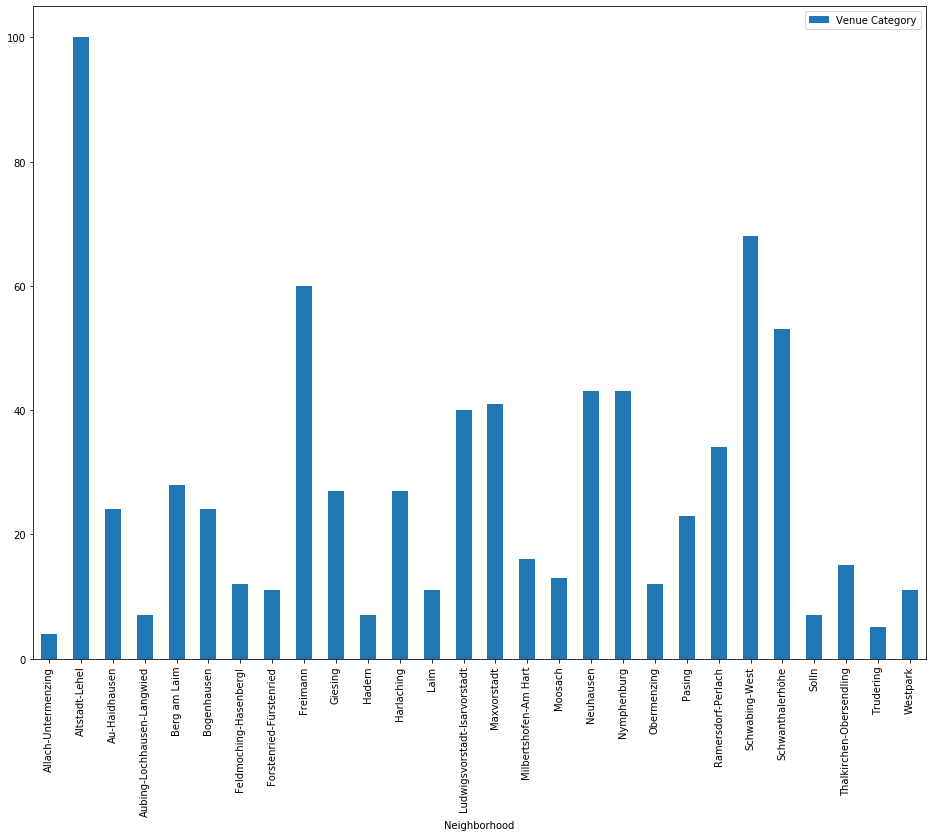

In [144]:
venues_neighborhood_munich_barchart = venues_neighborhood_munich.plot.bar(x='Neighborhood', y='Venue Category', rot=90,figsize=(16,12))

In [ ]:
plt.savefig('ElbowPlot.png',dpi=300)

In [145]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 161 uniques categories.


In [146]:
# one hot encoding
munich_onehot= pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")
#manhattan_onehot.head()

# add neighborhood column back to dataframe
munich_onehot['Neighborhood'] = munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cretan Restaurant,Cupcake Shop,Department Store,Diner,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Lake,Laundromat,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Movie Theater,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Recreation Center,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
munich_onehot.shape

(766, 162)

In [148]:
munich_grouped = munich_onehot.groupby('Neighborhood').mean().reset_index()
munich_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cretan Restaurant,Cupcake Shop,Department Store,Diner,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Lake,Laundromat,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Movie Theater,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Recreation Center,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000,0.000000
1,Altstadt-Lehel,0.01,0.010000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.070000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.01,0.03,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.070000,0.000,0.000000,0.000000,0.000000,0.01,0.00000,0.000000,0.000000,0.030000,0.040000,0.000000,0.01,0.000000,0.01,0.

In [149]:
munich_grouped.shape

(28, 162)

In [150]:
num_top_venues = 5

for hood in munich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                venue  freq
0            Bus Stop  0.50
1  Turkish Restaurant  0.25
2              Bakery  0.25
3   Accessories Store  0.00
4         Planetarium  0.00


----Altstadt-Lehel----
                 venue  freq
0  Bavarian Restaurant  0.07
1                Hotel  0.07
2                 Café  0.07
3    German Restaurant  0.05
4          Coffee Shop  0.04


----Au-Haidhausen----
                 venue  freq
0                 Café  0.08
1   Italian Restaurant  0.08
2              Brewery  0.04
3  Bavarian Restaurant  0.04
4    German Restaurant  0.04


----Aubing-Lochhausen-Langwied----
             venue  freq
0       Smoke Shop  0.14
1  Automotive Shop  0.14
2             Café  0.14
3       Playground  0.14
4   Shop & Service  0.14


----Berg am Laim----
                   venue  freq
0                  Hotel  0.14
1     Italian Restaurant  0.14
2               Bus Stop  0.07
3  Portuguese Restaurant  0.07
4            Supermarket  0.04


----Bogen

In [151]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Lets order the retrieved venues of each neighborhood, by what venues are the most common

In [152]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = munich_grouped['Neighborhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Bus Stop,Bakery,Turkish Restaurant,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fair,Ethiopian Restaurant
1,Altstadt-Lehel,Hotel,Café,Bavarian Restaurant,German Restaurant,Coffee Shop,Steakhouse,Bookstore,Department Store,Cocktail Bar,Pizza Place
2,Au-Haidhausen,Italian Restaurant,Café,Racetrack,Cocktail Bar,Breakfast Spot,Brewery,Burrito Place,Restaurant,Pub,Plaza
3,Aubing-Lochhausen-Langwied,Lake,Playground,Park,Automotive Shop,Smoke Shop,Café,Shop & Service,Electronics Store,Falafel Restaurant,Fair
4,Berg am Laim,Hotel,Italian Restaurant,Bus Stop,Portuguese Restaurant,Coffee Shop,Restaurant,Middle Eastern Restaurant,Bus Line,Electronics Store,Pizza Place


In [153]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Bus Stop,Bakery,Turkish Restaurant,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fair,Ethiopian Restaurant
1,Altstadt-Lehel,Hotel,Café,Bavarian Restaurant,German Restaurant,Coffee Shop,Steakhouse,Bookstore,Department Store,Cocktail Bar,Pizza Place
2,Au-Haidhausen,Italian Restaurant,Café,Racetrack,Cocktail Bar,Breakfast Spot,Brewery,Burrito Place,Restaurant,Pub,Plaza
3,Aubing-Lochhausen-Langwied,Lake,Playground,Park,Automotive Shop,Smoke Shop,Café,Shop & Service,Electronics Store,Falafel Restaurant,Fair
4,Berg am Laim,Hotel,Italian Restaurant,Bus Stop,Portuguese Restaurant,Coffee Shop,Restaurant,Middle Eastern Restaurant,Bus Line,Electronics Store,Pizza Place
5,Bogenhausen,Bus Stop,Tram Station,Drugstore,Greek Restaurant,Hotel,Bagel Shop,Burger Joint,Steakhouse,Electronics Store,Supermarket
6,Feldmoching-Hasenbergl,Supermarket,Bus Stop,Clothing Store,Shopping Mall,Gas Station,Bakery,Drugstore,Fast Food Restaurant,Hotel,Falafel Restaurant
7,Forstenried-Fürstenried,Bakery,Drugstore,Farmers Market,Metro Station,Gas Station,Bank,Supermarket,Plaza,Pool,Doner Restaurant
8,Freimann,Café,Italian Restaurant,Ice Cream Shop,German Restaurant,Vietnamese Restaurant,Coffee Shop,Pizza Place,Asian Restaurant,Greek Restaurant,Breakfast Spot
9,Giesing,Italian Restaurant,Pizza Place,Park,Café,Asian Restaurant,Gastropub,German Restaurant,Hotel,Bar,Doner Restaurant


In [154]:
munich_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cretan Restaurant,Cupcake Shop,Department Store,Diner,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Lake,Laundromat,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Movie Theater,Music Venue,Nightclub,Opera House,Optical Shop,Organic Grocery,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Recreation Center,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Track,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Allach-Untermenzing,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.250000,0.00,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.00,0.000000,0.00,0.00,0.00
1,Altstadt-Lehel,0.01,0.01,0.01,0.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.01,0.01,0.070000,0.000000,0.0,0.0,0.010000,0.0,0.01,0.01,0.03,0.01,0.010000,0.010000,0.0,0.010000,0.000000,0.000000,0.070000,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.030000,0.040000,0.0,0.01,0.0,0.01,0.03,0.0,0.0,0.0,0.000000,0.0,0.000000,0.01,0.0,0.000000,0.01,0.01,0.000000,0.01,0.000000,0.01,0.01,0.0,0.0,0.0,0.0,0.050000,0.0,0.01,0.000000,0.0,0.0,0.0,0.01,0.0,0.01,0.070000,0.0,0.02,0.000000,0.0,0.0,0.0,0.020000,0.0,0.01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,0.02,0.01,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,0.030000,0.0,0.000000,0.020000,0.0,0.000000,0.0,0.010000,0.000000,0.0,0.010000,0.0,0.0,0.0,0.01,0.0,0.02,0.0,0.000000,0.0,0.000000,0.01,0.0,0.01,0.0,0.0,0.01,0.030000,0.01,0.000000,0.01,0.0,

## now lets find out the optimum k of the average (mean) of venues that are located in each neighborhood

In [155]:
munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

In [163]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(munich_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)


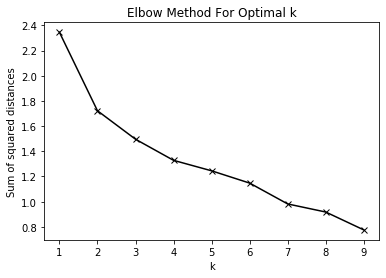

In [164]:


plt.plot(K, Sum_of_squared_distances, 'kx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

plt.savefig('ElbowPlotvenues.png',dpi=300)

plt.show()

## the elbow method was not able to direcly provide the optimum k value. Therefore an arbitrary value of 6 was choose for clustering

In [165]:
# set number of clusters
kclusters = 6



# run k-means clustering
kmeans6 = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans6.labels_[0:100] 

array([4, 2, 2, 2, 2, 2, 3, 1, 2, 2, 5, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 4, 3])

In [166]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Bus Stop,Bakery,Turkish Restaurant,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fair,Ethiopian Restaurant
1,Altstadt-Lehel,Hotel,Café,Bavarian Restaurant,German Restaurant,Coffee Shop,Steakhouse,Bookstore,Department Store,Cocktail Bar,Pizza Place
2,Au-Haidhausen,Italian Restaurant,Café,Racetrack,Cocktail Bar,Breakfast Spot,Brewery,Burrito Place,Restaurant,Pub,Plaza
3,Aubing-Lochhausen-Langwied,Lake,Playground,Park,Automotive Shop,Smoke Shop,Café,Shop & Service,Electronics Store,Falafel Restaurant,Fair
4,Berg am Laim,Hotel,Italian Restaurant,Bus Stop,Portuguese Restaurant,Coffee Shop,Restaurant,Middle Eastern Restaurant,Bus Line,Electronics Store,Pizza Place


In [171]:
#neighborhoods_venues_sorted6 = neighborhoods_venues_sorted.drop(['Cluster Labels4', 'Cluster Labels'], axis=1)
neighborhoods_venues_sorted6 = neighborhoods_venues_sorted

In [172]:
neighborhoods_venues_sorted6.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Bus Stop,Bakery,Turkish Restaurant,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fair,Ethiopian Restaurant
1,Altstadt-Lehel,Hotel,Café,Bavarian Restaurant,German Restaurant,Coffee Shop,Steakhouse,Bookstore,Department Store,Cocktail Bar,Pizza Place
2,Au-Haidhausen,Italian Restaurant,Café,Racetrack,Cocktail Bar,Breakfast Spot,Brewery,Burrito Place,Restaurant,Pub,Plaza
3,Aubing-Lochhausen-Langwied,Lake,Playground,Park,Automotive Shop,Smoke Shop,Café,Shop & Service,Electronics Store,Falafel Restaurant,Fair
4,Berg am Laim,Hotel,Italian Restaurant,Bus Stop,Portuguese Restaurant,Coffee Shop,Restaurant,Middle Eastern Restaurant,Bus Line,Electronics Store,Pizza Place


In [173]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)   

neighborhoods_venues_sorted6.insert(0, 'Cluster Labels6', kmeans6.labels_)   

In [174]:
neighborhoods_venues_sorted6.head()

,Cluster Labels6,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Allach-Untermenzing,Bus Stop,Bakery,Turkish Restaurant,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fair,Ethiopian Restaurant
1,2,Altstadt-Lehel,Hotel,Café,Bavarian Restaurant,German Restaurant,Coffee Shop,Steakhouse,Bookstore,Department Store,Cocktail Bar,Pizza Place
2,2,Au-Haidhausen,Italian Restaurant,Café,Racetrack,Cocktail Bar,Breakfast Spot,Brewery,Burrito Place,Restaurant,Pub,Plaza
3,2,Aubing-Lochhausen-Langwied,Lake,Playground,Park,Automotive Shop,Smoke Shop,Café,Shop & Service,Electronics Store,Falafel Restaurant,Fair
4,2,Berg am Laim,Hotel,Italian Restaurant,Bus Stop,Portuguese Restaurant,Coffee Shop,Restaurant,Middle Eastern Restaurant,Bus Line,Electronics Store,Pizza Place


In [175]:
munich_merged = munich_neighborhood_forplot_2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
munich_merged6 = munich_merged.join(neighborhoods_venues_sorted6.set_index('Neighborhood'), on='Neighborhood')



In [176]:
munich_merged6#.head(15) # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels6,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt-Lehel,48.135388,11.580828,2,Hotel,Café,Bavarian Restaurant,German Restaurant,Coffee Shop,Steakhouse,Bookstore,Department Store,Cocktail Bar,Pizza Place
1,Maxvorstadt,48.149536,11.552303,2,Italian Restaurant,Hotel,German Restaurant,Supermarket,Asian Restaurant,Greek Restaurant,Bakery,Yoga Studio,Coffee Shop,Burger Joint
2,Ludwigsvorstadt-Isarvorstadt,48.134124,11.556676,0,Hotel,Middle Eastern Restaurant,German Restaurant,Café,Brewery,Chinese Restaurant,Burrito Place,Burger Joint,Sandwich Place,Mexican Restaurant
3,Schwanthalerhöhe,48.136274,11.538541,2,Café,Pizza Place,Ice Cream Shop,Italian Restaurant,Hotel,Vietnamese Restaurant,Burger Joint,German Restaurant,French Restaurant,Bar
4,Moosach,48.162219,11.536121,2,Café,Supermarket,German Restaurant,Gastropub,Italian Restaurant,Trattoria/Osteria,Sushi Restaurant,Beer Garden,Gym,Farmers Market
5,Westpark,48.132543,11.508779,3,Supermarket,Bank,Caucasian Restaurant,Bus Stop,Metro Station,Gastropub,German Restaurant,Ice Cream Shop,Tram Station,Gym / Fitness Center
6,Schwabing-West,48.161690,11.570583,2,Italian Restaurant,Vietnamese Restaurant,Greek Restaurant,Café,Bar,Thai Restaurant,Plaza,Indian Restaurant,Sushi Restaurant,Ice Cream Shop
7,Freimann,48.158727,11.578513,2,Café,Italian Restaurant,Ice Cream Shop,German Restaurant,Vietnamese Restaurant,Coffee Shop,Pizza Place,Asian Restaurant,Greek Restaurant,Breakfast Spot
8,Milbertshofen-Am Hart,48.172267,11.580048,2,Italian Restaurant,Restaurant,Bakery,Bus Stop,Hotel Bar,Hotel,Plaza,Supermarket,Jewelry Store,Diner
9,Feldmoching-Hasenbergl,48.211851,11.557133,3,Supermarket,Bus Stop,Clothing Store,Shopping Mall,Gas Station,Bakery,Drugstore,Fast Food Restaurant,Hotel,Falafel Restaurant


In [177]:
munich_merged6_venue1st = munich_merged6[['Cluster Labels6','1st Most Common Venue']]

#  CLUSTER 0

In [178]:
munich_merged6_venue1st #.head()

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
2,0,Hotel
3,2,Café
4,2,Café
5,3,Supermarket
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
9,3,Supermarket


In [671]:
#munich_merged6_venue1st_hist = munich_merged6_venue1st.hist(bins=10,figsize=(8,6))

In [669]:
#munich_merged6_venue1st_barchart = munich_merged6_venue1st.plot.bar(x='Cluster Labels6', y='1st Most Common Venue', rot=90,figsize=(16,12))

#munich_merged6_venue1st_test = munich_merged6_venue1st.groupby('1st Most Common Venue').count()  #.reset_index()

In [179]:
munich_merged6_venue1st_label0 = munich_merged6_venue1st.loc[munich_merged6_venue1st['Cluster Labels6'] == 0]

In [180]:
munich_merged6_venue1st_label0

,Cluster Labels6,1st Most Common Venue
2,0,Hotel


In [181]:
munich_merged6_venue1st_label0_counts = munich_merged6_venue1st_label0.groupby('1st Most Common Venue').count().reset_index()

In [182]:
munich_merged6_venue1st_label0_counts 

,1st Most Common Venue,Cluster Labels6
0,Hotel,1


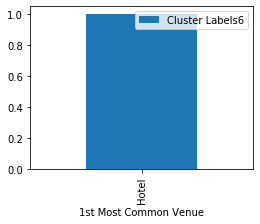

In [183]:
munich_merged6_venue1st_label0_counts_barchart = munich_merged6_venue1st_label0_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=90,figsize=(4,3))

#  CLUSTER 1

In [184]:
munich_merged6_venue1st#.head()

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
2,0,Hotel
3,2,Café
4,2,Café
5,3,Supermarket
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
9,3,Supermarket


In [185]:
#munich_merged6_venue1st.head()
munich_merged6_venue1st_label1 = munich_merged6_venue1st.loc[munich_merged6_venue1st['Cluster Labels6'] == 1]

In [186]:
munich_merged6_venue1st_label1

,Cluster Labels6,1st Most Common Venue
14,1,Bakery
16,1,Bakery


In [187]:
munich_merged6_venue1st_label1_counts = munich_merged6_venue1st_label1.groupby('1st Most Common Venue').count().reset_index()
munich_merged6_venue1st_label1_counts 

,1st Most Common Venue,Cluster Labels6
0,Bakery,2


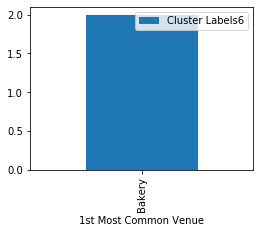

In [188]:
munich_merged6_venue1st_label1_counts_barchart = munich_merged6_venue1st_label1_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=90,figsize=(4,3))

#  CLUSTER 2

In [189]:
munich_merged6_venue1st#.head()

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
2,0,Hotel
3,2,Café
4,2,Café
5,3,Supermarket
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
9,3,Supermarket


In [190]:
#munich_merged6_venue1st.head()

munich_merged6_venue1st_label2 = munich_merged6_venue1st.loc[munich_merged6_venue1st['Cluster Labels6'] == 2]

In [191]:
munich_merged6_venue1st_label2

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
3,2,Café
4,2,Café
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
11,2,Coffee Shop
12,2,Lake
13,2,Plaza


In [192]:
munich_merged6_venue1st_label2_counts = munich_merged6_venue1st_label2.groupby('1st Most Common Venue').count().reset_index()
munich_merged6_venue1st_label2_counts 

,1st Most Common Venue,Cluster Labels6
0,Bakery,2
1,Bus Stop,1
2,Café,3
3,Coffee Shop,1
4,Hotel,2
5,Insurance Office,1
6,Italian Restaurant,6
7,Lake,1
8,Nightclub,1
9,Plaza,1


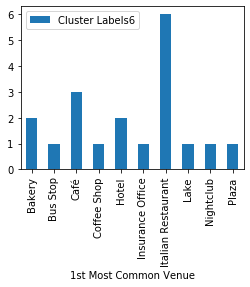

In [193]:
munich_merged6_venue1st_label2_counts_barchart = munich_merged6_venue1st_label2_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=90,figsize=(4,3))

#  CLUSTER 3

In [194]:
munich_merged6_venue1st#.head()

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
2,0,Hotel
3,2,Café
4,2,Café
5,3,Supermarket
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
9,3,Supermarket


In [195]:
#munich_merged6_venue1st.head()

munich_merged6_venue1st_label3 = munich_merged6_venue1st.loc[munich_merged6_venue1st['Cluster Labels6'] == 3]

In [196]:
munich_merged6_venue1st_label3

,Cluster Labels6,1st Most Common Venue
5,3,Supermarket
9,3,Supermarket
17,3,Fast Food Restaurant


In [197]:
munich_merged6_venue1st_label3_counts = munich_merged6_venue1st_label3.groupby('1st Most Common Venue').count().reset_index()

munich_merged6_venue1st_label3_counts 

,1st Most Common Venue,Cluster Labels6
0,Fast Food Restaurant,1
1,Supermarket,2


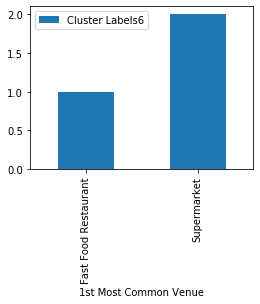

In [198]:
munich_merged6_venue1st_label3_counts_barchart = munich_merged6_venue1st_label3_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=90,figsize=(4,3))

#  CLUSTER 4

In [199]:
munich_merged6_venue1st#.head()

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
2,0,Hotel
3,2,Café
4,2,Café
5,3,Supermarket
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
9,3,Supermarket


In [200]:
#munich_merged6_venue1st.head()

munich_merged6_venue1st_label4 = munich_merged6_venue1st.loc[munich_merged6_venue1st['Cluster Labels6'] == 4]

In [201]:
munich_merged6_venue1st_label4

,Cluster Labels6,1st Most Common Venue
10,4,Bus Stop
23,4,Bus Stop


In [202]:
munich_merged6_venue1st_label4_counts = munich_merged6_venue1st_label4.groupby('1st Most Common Venue').count().reset_index()

munich_merged6_venue1st_label4_counts 

,1st Most Common Venue,Cluster Labels6
0,Bus Stop,2


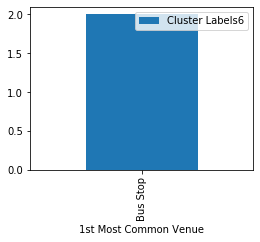

In [203]:
munich_merged6_venue1st_label4_counts_barchart = munich_merged6_venue1st_label4_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=90,figsize=(4,3))

#  CLUSTER 5

In [204]:
munich_merged6_venue1st#.head()

,Cluster Labels6,1st Most Common Venue
0,2,Hotel
1,2,Italian Restaurant
2,0,Hotel
3,2,Café
4,2,Café
5,3,Supermarket
6,2,Italian Restaurant
7,2,Café
8,2,Italian Restaurant
9,3,Supermarket


In [205]:
#munich_merged6_venue1st.head()

munich_merged6_venue1st_label5 = munich_merged6_venue1st.loc[munich_merged6_venue1st['Cluster Labels6'] == 5]

In [206]:
munich_merged6_venue1st_label5

,Cluster Labels6,1st Most Common Venue
15,5,Food & Drink Shop


In [207]:
munich_merged6_venue1st_label5_counts = munich_merged6_venue1st_label5.groupby('1st Most Common Venue').count().reset_index()

munich_merged6_venue1st_label5_counts 

,1st Most Common Venue,Cluster Labels6
0,Food & Drink Shop,1


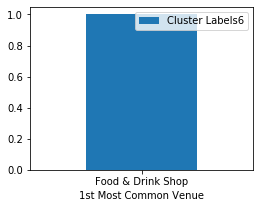

In [208]:
munich_merged6_venue1st_label5_counts_barchart = munich_merged6_venue1st_label5_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=0,figsize=(4,3))

#  we can plot these bar chart of the most common venue found in each cluster, alltogether

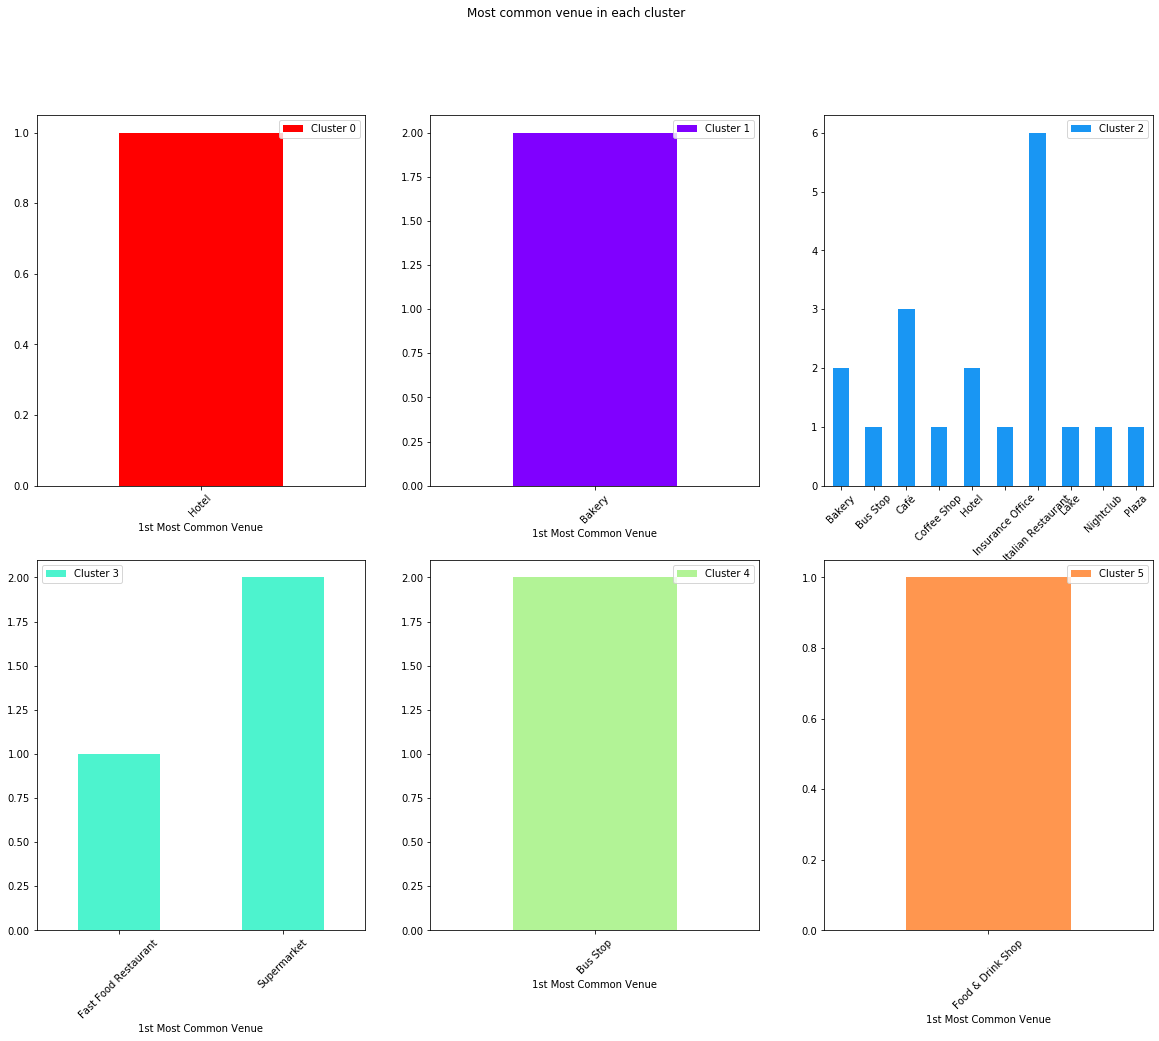

In [212]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# munich_merged6_venue1st_label5_counts_barchart = munich_merged6_venue1st_label5_counts.plot.bar(x='1st Most Common Venue', y='Cluster Labels6', rot=90,figsize=(4,3))


#fig, axes = plt.subplots(nrows=2, ncols=3)
#df[["a","b"]].plot(ax=axes[0], kind='bar')
#3df[["c", "d"]].plot(ax=axes[1], kind='bar');



#fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(20,15))
#ax.plot(munich_merged6_venue1st_label0_counts[["1st Most Common Venue","Cluster Labels6"]],label="Cluster 0")
#munich_merged6_venue1st_label1_counts.plot.bar(ax=axes[0,1],x='1st Most Common Venue', y='Cluster Labels6', rot=45)
#munich_merged6_venue1st_label2_counts.plot.bar(ax=axes[0,2],x='1st Most Common Venue', y='Cluster Labels6', rot=45)
#munich_merged6_venue1st_label3_counts.plot.bar(ax=axes[1,0],x='1st Most Common Venue', y='Cluster Labels6', rot=45)
#munich_merged6_venue1st_label4_counts.plot.bar(ax=axes[1,1],x='1st Most Common Venue', y='Cluster Labels6', rot=45)
#munich_merged6_venue1st_label5_counts.plot.bar(ax=axes[1,2],x='1st Most Common Venue', y='Cluster Labels6', rot=45)
#fig.suptitle('Most common venue in each cluster')


#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
#color=rainbow[-1]

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,15))
munich_merged6_venue1st_label0_counts.plot.bar(ax=axes[0,0],x='1st Most Common Venue', y='Cluster Labels6', rot=45,label='Cluster 0', color='#ff0000')
munich_merged6_venue1st_label1_counts.plot.bar(ax=axes[0,1],x='1st Most Common Venue', y='Cluster Labels6', rot=45,label='Cluster 1', color='#8000ff')
munich_merged6_venue1st_label2_counts.plot.bar(ax=axes[0,2],x='1st Most Common Venue', y='Cluster Labels6', rot=45,label='Cluster 2', color='#1996f3')
munich_merged6_venue1st_label3_counts.plot.bar(ax=axes[1,0],x='1st Most Common Venue', y='Cluster Labels6', rot=45,label='Cluster 3', color='#4df3ce')
munich_merged6_venue1st_label4_counts.plot.bar(ax=axes[1,1],x='1st Most Common Venue', y='Cluster Labels6', rot=45,label='Cluster 4', color='#b2f396')
munich_merged6_venue1st_label5_counts.plot.bar(ax=axes[1,2],x='1st Most Common Venue', y='Cluster Labels6', rot=45,label='Cluster 5', color='#ff964f')
fig.suptitle('Most common venue in each cluster')
plt.savefig('mostcommonvenueineachcluster.png',dpi=300)



#rainbow[-1]


#munich_merged6_venue1st_label0_counts[["1st Most Common Venue","Cluster Labels6"]].plot(ax=axes[0,0], kind='bar',figsize=(16,12))
#munich_merged6_venue1st_label1_counts[["1st Most Common Venue","Cluster Labels6"]].plot(ax=axes[0,1], kind='bar')
#munich_merged6_venue1st_label2_counts[["1st Most Common Venue","Cluster Labels6"]].plot(ax=axes[0,2], kind='bar')
#munich_merged6_venue1st_label3_counts[["1st Most Common Venue","Cluster Labels6"]].plot(ax=axes[1,0], kind='bar')
#munich_merged6_venue1st_label4_counts[["1st Most Common Venue","Cluster Labels6"]].plot(ax=axes[1,1], kind='bar')
#munich_merged6_venue1st_label5_counts[["1st Most Common Venue","Cluster Labels6"]].plot(ax=axes[1,2], kind='bar')



In [816]:
rainbow

['#8000ff', '#1996f3', '#4df3ce', '#b2f396', '#ff964f', '#ff0000']

## and now we can plot this together with our folium map

In [215]:

# 

munich_map_Labelsk3_venues = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged6['Latitude'], munich_merged6['Longitude'], munich_merged6['Neighborhood'], munich_merged6['Cluster Labels6']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        #color=rainbow[cluster-1],
        color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fil=rainbow[cluster-1],
        fill_opacity=1.5).add_to(munich_map_Labelsk3_venues)
    
    
    




# display map

munich_map_Labelsk3_venues




#munich_map.savefig('Munich_population_plot.png')
#munich_map_Labelsk3_venues.save('munich_map_Labelsk3_venues.html')


In [683]:
munich_map_Labelsk3_venues.save('munich_map_venuesk6.html')

In [218]:

# 

munich_map_Labelsk3_venues = folium.Map(location=[48.151146, 11.562479], zoom_start=12)#, tiles='Mapbox Bright') 

munich_map_Labelsk3_venues.choropleth(
    geo_data=munich_geo,
    data=Neighborhood_Clustering,
    columns=['Neighborhood', 'Labels with k=3'] ,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.5,
    legend_name='Cluster'
)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged6['Latitude'], munich_merged6['Longitude'], munich_merged6['Neighborhood'], munich_merged6['Cluster Labels6']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        #color=rainbow[cluster-1],
        color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fil=rainbow[cluster-1],
        fill_opacity=1.5).add_to(munich_map_Labelsk3_venues)
    
    
    




# display map

munich_map_Labelsk3_venues




#munich_map.savefig('Munich_population_plot.png')
#munich_map_Labelsk3_venues.save('munich_map_Labelsk3_venues.html')


## and now we can super impose the clustered neighborhoods with our cluster venues

In [644]:
munich_map_Labelsk3_venues.save('munich_map_Labelsk3_venuesk6.html')

## Lets do a couple more plots


In [220]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [395]:
# loades statistical data

#df_munich_rent = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="cost_rent",header=0)#
#df_munich_unemployed = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="unemployed",header=0 )
#df_munich_employable_rate = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="employable_rate",header=0)#
#df_munich_building_permits = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="building_permits",header=0)#
#df_munich_age = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="age",header=0)#
#df_munich_resident_number = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="resident_number",header=0)#
#df_munich_non_german_proportion = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="non_german_proportion",header=0)#
#df_munich_residents_per_pharmacy = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="residents_per_pharmacy",header=0)#
#df_munich_register_vehicle_by_population = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="register_vehicle_by_population",header=0)##

In [221]:
df_munich_resident_number

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Munich City,1560033,1542196,1526045,1542849,1521672,1489758,1463976,1438425,1409612,1381067
1,Altstadt-Lehel,21126,21100,20926,21454,21122,20801,20416,20041,19700,19198
2,Ludwigsvorstadt-Isarvorstadt,51933,51644,51632,54915,54049,52153,50594,49628,48197,47323
3,Maxvorstadt,51834,51402,51311,53443,53743,52549,51614,50849,49468,48845
4,Schwabing-West,68935,68527,68265,69407,68527,67051,65848,64723,63595,62803
5,Au-Haidhausen,61654,61356,60937,61999,61495,60729,59722,58849,57263,56287
6,Sendling,57111,56545,56281,56335,55374,54665,53978,53300,52669,51736
7,Westpark,60498,59643,59386,59174,58398,56451,55367,54508,53225,52448
8,Schwanthalerhöhe,29611,29743,29535,30282,30381,30071,29650,29388,28664,27989
9,Neuhausen,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210


In [222]:
df_munich_resident_number_indexok = df_munich_resident_number.set_index('Unnamed: 0')
df_munich_resident_number_indexok

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Unnamed: 0,,,,,,,,,,
Munich City,1560033,1542196,1526045,1542849,1521672,1489758,1463976,1438425,1409612,1381067
Altstadt-Lehel,21126,21100,20926,21454,21122,20801,20416,20041,19700,19198
Ludwigsvorstadt-Isarvorstadt,51933,51644,51632,54915,54049,52153,50594,49628,48197,47323
Maxvorstadt,51834,51402,51311,53443,53743,52549,51614,50849,49468,48845
Schwabing-West,68935,68527,68265,69407,68527,67051,65848,64723,63595,62803
Au-Haidhausen,61654,61356,60937,61999,61495,60729,59722,58849,57263,56287
Sendling,57111,56545,56281,56335,55374,54665,53978,53300,52669,51736
Westpark,60498,59643,59386,59174,58398,56451,55367,54508,53225,52448
Schwanthalerhöhe,29611,29743,29535,30282,30381,30071,29650,29388,28664,27989


In [223]:
df_munich_resident_number_trans_indexok = df_munich_resident_number_indexok.transpose()
df_munich_resident_number_trans_indexok.head()

Unnamed: 0,Munich City,Altstadt-Lehel,Ludwigsvorstadt-Isarvorstadt,Maxvorstadt,Schwabing-West,Au-Haidhausen,Sendling,Westpark,Schwanthalerhöhe,Neuhausen,Nymphenburg,Moosach,Milbertshofen-Am Hart,Freimann,Bogenhausen,Berg am Laim,Trudering,Ramersdorf-Perlach,Giesing,Harlaching,Forstenried-Fürstenried,Solln,Thalkirchen-Obersendling,Hadern,Pasing,Obermenzing,Aubing-Lochhausen-Langwied,Allach-Untermenzing,Feldmoching-Hasenbergl,Laim
2019,1560033,21126,51933,51834,68935,61654,57111,60498,29611,100213,100213,54871,76559,78657,90025,47000,73479,117918,54498,53238,97689,97689,97689,50165,76348,76348,49069,34277,62069,57111
2018,1542196,21100,51644,51402,68527,61356,56545,59643,29743,98813,98813,54222,75094,77936,87950,46098,73206,116326,54255,53179,96713,96713,96713,49898,74625,74625,47810,33354,61774,56545
2017,1526045,20926,51632,51311,68265,60937,56281,59386,29535,98519,98519,53661,74731,76341,85971,45582,72006,114478,53936,52595,95553,95553,95553,49626,74098,74098,46383,32677,60933,56281
2016,1542849,21454,54915,53443,69407,61999,56335,59174,30282,99538,99538,53857,76255,77188,87163,45655,71448,113898,54784,54045,96200,96200,96200,50567,74432,74432,45569,32248,61763,56335
2015,1521672,21122,54049,53743,68527,61495,55374,58398,30381,98702,98702,53261,75488,75020,85946,45035,69830,112371,54402,53372,93602,93602,93602,50257,73320,73320,43682,31882,61534,55374


In [224]:
df_munich_resident_number_trans_indexok_sorted = df_munich_resident_number_trans_indexok.sort_values(by='Munich City',ascending=True)

In [225]:
df_munich_resident_number_trans_indexok_sorted

Unnamed: 0,Munich City,Altstadt-Lehel,Ludwigsvorstadt-Isarvorstadt,Maxvorstadt,Schwabing-West,Au-Haidhausen,Sendling,Westpark,Schwanthalerhöhe,Neuhausen,Nymphenburg,Moosach,Milbertshofen-Am Hart,Freimann,Bogenhausen,Berg am Laim,Trudering,Ramersdorf-Perlach,Giesing,Harlaching,Forstenried-Fürstenried,Solln,Thalkirchen-Obersendling,Hadern,Pasing,Obermenzing,Aubing-Lochhausen-Langwied,Allach-Untermenzing,Feldmoching-Hasenbergl,Laim
2010,1381067,19198,47323,48845,62803,56287,51736,52448,27989,89210,89210,48365,68913,65115,77474,40515,62702,104662,48994,49458,83504,83504,83504,46816,66174,66174,38809,29130,56071,51736
2011,1409612,19700,48197,49468,63595,57263,52669,53225,28664,92068,92068,49331,70417,66665,79110,41309,64931,105831,50627,50416,85392,85392,85392,47424,67810,67810,39739,29666,57128,52669
2012,1438425,20041,49628,50849,64723,58849,53300,54508,29388,94192,94192,50202,72456,68492,80756,42279,65819,107098,51159,51146,87201,87201,87201,47913,69233,69233,41070,30368,58193,53300
2013,1463976,20416,50594,51614,65848,59722,53978,55367,29650,95843,95843,51488,73568,69639,82084,43038,66963,108183,51478,51905,90720,90720,90720,48911,70723,70723,42262,30713,59345,53978
2014,1489758,20801,52153,52549,67051,60729,54665,56451,30071,97461,97461,52609,74622,71768,83850,43997,68018,110043,52723,52421,91347,91347,91347,49842,71826,71826,42817,31330,60219,54665
2015,1521672,21122,54049,53743,68527,61495,55374,58398,30381,98702,98702,53261,75488,75020,85946,45035,69830,112371,54402,53372,93602,93602,93602,50257,73320,73320,43682,31882,61534,55374
2017,1526045,20926,51632,51311,68265,60937,56281,59386,29535,98519,98519,53661,74731,76341,85971,45582,72006,114478,53936,52595,95553,95553,95553,49626,74098,74098,46383,32677,60933,56281
2018,1542196,21100,51644,51402,68527,61356,56545,59643,29743,98813,98813,54222,75094,77936,87950,46098,73206,116326,54255,53179,96713,96713,96713,49898,74625,74625,47810,33354,61774,56545
2016,1542849,21454,54915,53443,69407,61999,56335,59174,30282,99538,99538,53857,76255,77188,87163,45655,71448,113898,54784,54045,96200,96200,96200,50567,74432,74432,45569,32248,61763,56335
2019,1560033,21126,51933,51834,68935,61654,57111,60498,29611,100213,100213,54871,76559,78657,90025,47000,73479,117918,54498,53238,97689,97689,97689,50165,76348,76348,49069,34277,62069,57111


In [226]:
df_munich_resident_number_trans_indexok_sorted_onlyneighborhoods = df_munich_resident_number_trans_indexok_sorted.drop(['Munich City'], axis=1)

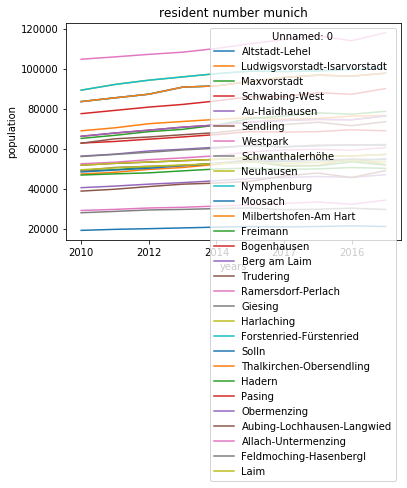

In [227]:
#df_munich_rent = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="cost_rent",header=0)#
#df_munich_resident_number_munichcity


#years = list(map(str,range(2010,2019)))

#df_munich_resident_number_indexok.loc['Munich City',years].plot(kind='line')
#[df_munich_resident_number_trans_indexok['Munich City'],years_2019to2010].plot(kind='line')
df_munich_resident_number_trans_indexok_sorted_onlyneighborhoods.plot(kind='line')
plt.title('resident number munich')
plt.ylabel('population')
plt.xlabel('years')

plt.show()

# too many data points, lets just grab the top 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


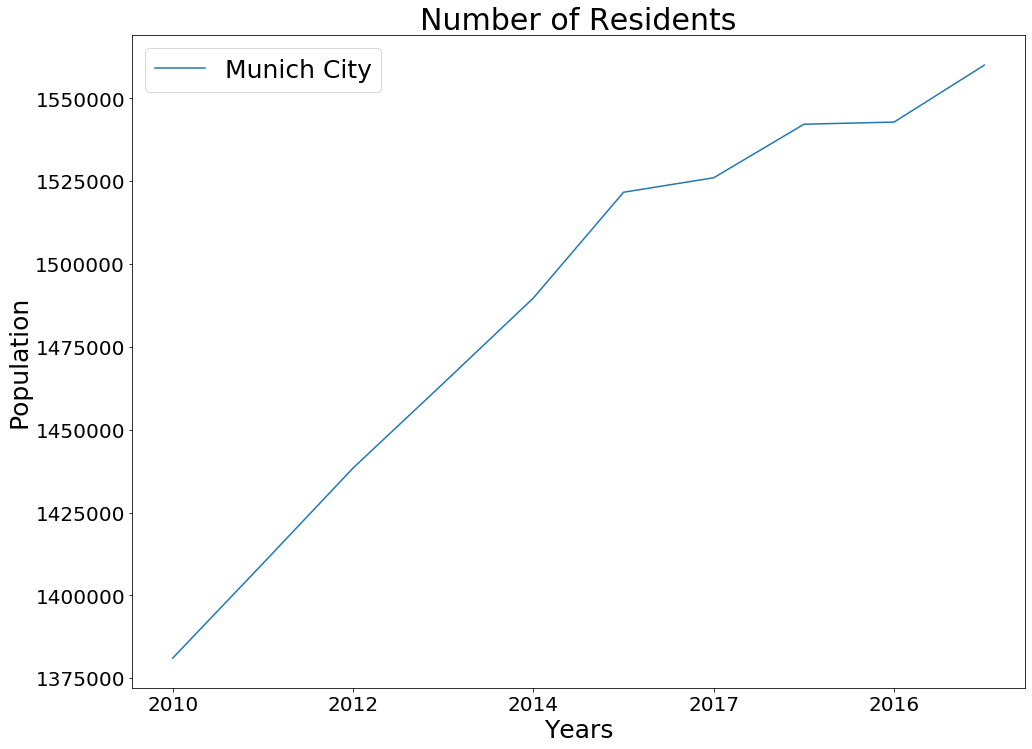

In [228]:
#df_munich_rent = pd.read_excel(r"munich_data_selbsgeholt_touse.xlsx",sheet_name="cost_rent",header=0)#
#df_munich_resident_number_munichcity


#years = list(map(str,range(2010,2019)))

#df_munich_resident_number_indexok.loc['Munich City',years].plot(kind='line')
#[df_munich_resident_number_trans_indexok['Munich City'],years_2019to2010].plot(kind='line')


font = {'family' : 'normal',
        'weight' : 'normal', #bold
        'size'   : 20}

#import matplotlib as mpl
mpl.rc('font', **font)


df_munich_resident_number_trans_indexok_sorted['Munich City'].plot(kind='line',figsize=(16,12))


plt.title('Number of Residents',fontsize=30)
plt.ylabel('Population',fontsize=25)
plt.xlabel('Years',fontsize=25)

plt.legend(loc=2, prop={'size': 25})

plt.savefig('Munich_population.png',dpi=100)

plt.show()

In [404]:
plt.savefig('Munich_population.png',dpi=100)

<Figure size 432x288 with 0 Axes>

In [229]:
# lets just grab the top and bottom rows from 2019

#df_munich_resident_number_trans_indexok_sorted_onlyneighborhoods

#df_munich_resident_number_trans_indexok_sorted = df_munich_resident_number_trans_indexok.sort_values(by='Munich City',ascending=True)

df_munich_resident_number_trans_indexok_sorted_topbottom= df_munich_resident_number_indexok.sort_values(by='2019',ascending=False)

df_munich_resident_number_trans_indexok_sorted_topbottom

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Unnamed: 0,,,,,,,,,,
Munich City,1560033,1542196,1526045,1542849,1521672,1489758,1463976,1438425,1409612,1381067
Ramersdorf-Perlach,117918,116326,114478,113898,112371,110043,108183,107098,105831,104662
Nymphenburg,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210
Neuhausen,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210
Forstenried-Fürstenried,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Solln,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Thalkirchen-Obersendling,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Bogenhausen,90025,87950,85971,87163,85946,83850,82084,80756,79110,77474
Freimann,78657,77936,76341,77188,75020,71768,69639,68492,66665,65115


In [230]:
df_munich_resident_number_trans_indexok_sorted_topbottom_onlyneighborhood = df_munich_resident_number_trans_indexok_sorted_topbottom.drop(labels='Munich City',axis=0)

In [231]:
df_munich_resident_number_trans_indexok_sorted_topbottom_onlyneighborhood

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Unnamed: 0,,,,,,,,,,
Ramersdorf-Perlach,117918,116326,114478,113898,112371,110043,108183,107098,105831,104662
Nymphenburg,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210
Neuhausen,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210
Forstenried-Fürstenried,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Solln,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Thalkirchen-Obersendling,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Bogenhausen,90025,87950,85971,87163,85946,83850,82084,80756,79110,77474
Freimann,78657,77936,76341,77188,75020,71768,69639,68492,66665,65115
Milbertshofen-Am Hart,76559,75094,74731,76255,75488,74622,73568,72456,70417,68913


## the bottom and top populated are in 2019: 

### TOP 
<br> 1. Ramersdorf-Perlach
<br> 2. Neuhausen
<br> 3. Nymphenburg

### BOTTOM
<br> 1. Allach-Untermenzing
<br> 2. Schwanthalerhöhe
<br> 3. Altstadt-Lehel

In [232]:
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top= df_munich_resident_number_trans_indexok_sorted_topbottom_onlyneighborhood.head(5)
#df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_bottom= df_munich_resident_number_trans_indexok_sorted_topbottom_onlyneighborhood.tail(3)                                                                                 

In [233]:
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Unnamed: 0,,,,,,,,,,
Ramersdorf-Perlach,117918,116326,114478,113898,112371,110043,108183,107098,105831,104662
Nymphenburg,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210
Neuhausen,100213,98813,98519,99538,98702,97461,95843,94192,92068,89210
Forstenried-Fürstenried,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504
Solln,97689,96713,95553,96200,93602,91347,90720,87201,85392,83504


In [249]:
#df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_bottom

In [234]:
df_munich_resident_number_trans_indexok_sorted_onlyneighborhoods.head()

Unnamed: 0,Altstadt-Lehel,Ludwigsvorstadt-Isarvorstadt,Maxvorstadt,Schwabing-West,Au-Haidhausen,Sendling,Westpark,Schwanthalerhöhe,Neuhausen,Nymphenburg,Moosach,Milbertshofen-Am Hart,Freimann,Bogenhausen,Berg am Laim,Trudering,Ramersdorf-Perlach,Giesing,Harlaching,Forstenried-Fürstenried,Solln,Thalkirchen-Obersendling,Hadern,Pasing,Obermenzing,Aubing-Lochhausen-Langwied,Allach-Untermenzing,Feldmoching-Hasenbergl,Laim
2010,19198,47323,48845,62803,56287,51736,52448,27989,89210,89210,48365,68913,65115,77474,40515,62702,104662,48994,49458,83504,83504,83504,46816,66174,66174,38809,29130,56071,51736
2011,19700,48197,49468,63595,57263,52669,53225,28664,92068,92068,49331,70417,66665,79110,41309,64931,105831,50627,50416,85392,85392,85392,47424,67810,67810,39739,29666,57128,52669
2012,20041,49628,50849,64723,58849,53300,54508,29388,94192,94192,50202,72456,68492,80756,42279,65819,107098,51159,51146,87201,87201,87201,47913,69233,69233,41070,30368,58193,53300
2013,20416,50594,51614,65848,59722,53978,55367,29650,95843,95843,51488,73568,69639,82084,43038,66963,108183,51478,51905,90720,90720,90720,48911,70723,70723,42262,30713,59345,53978
2014,20801,52153,52549,67051,60729,54665,56451,30071,97461,97461,52609,74622,71768,83850,43997,68018,110043,52723,52421,91347,91347,91347,49842,71826,71826,42817,31330,60219,54665


In [235]:
#df_munich_resident_number_trans_indexok_sorted_onlyneighborhood

df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot = df_munich_resident_number_trans_indexok_sorted_onlyneighborhoods[['Ramersdorf-Perlach','Nymphenburg','Forstenried-Fürstenried','Bogenhausen','Freimann']]
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot

Unnamed: 0,Ramersdorf-Perlach,Nymphenburg,Forstenried-Fürstenried,Bogenhausen,Freimann
2010,104662,89210,83504,77474,65115
2011,105831,92068,85392,79110,66665
2012,107098,94192,87201,80756,68492
2013,108183,95843,90720,82084,69639
2014,110043,97461,91347,83850,71768
2015,112371,98702,93602,85946,75020
2017,114478,98519,95553,85971,76341
2018,116326,98813,96713,87950,77936
2016,113898,99538,96200,87163,77188
2019,117918,100213,97689,90025,78657


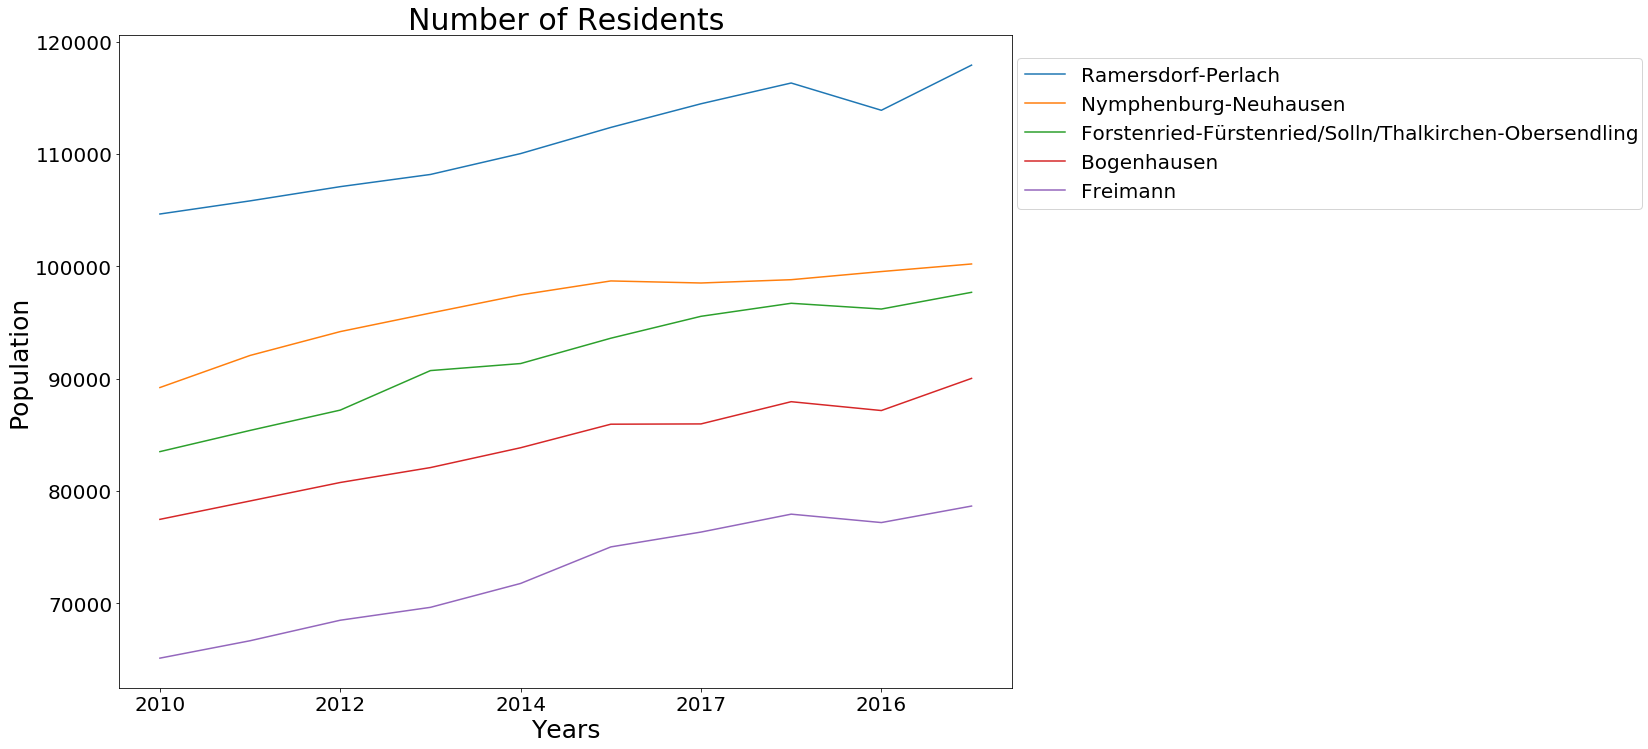

In [236]:

font = {'family' : 'normal',
        'weight' : 'normal', #bold
        'size'   : 20}

#import matplotlib as mpl
mpl.rc('font', **font)



df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot['Ramersdorf-Perlach'].plot(kind='line', label="Ramersdorf-Perlach",figsize=(16,12))
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot['Nymphenburg'].plot(kind='line', label="Nymphenburg-Neuhausen")
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot['Forstenried-Fürstenried'].plot(kind='line', label="Forstenried-Fürstenried/Solln/Thalkirchen-Obersendling")
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot['Bogenhausen'].plot(kind='line', label="Bogenhausen")
df_munich_resident_number_trans_indexok_sorted_onlyneighborhood_top_forplot['Freimann'].plot(kind='line', label="Freimann")


# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(1.005, .6, 0.7, 0.5), loc='right', ncol=1, mode="expand", borderaxespad=0.)



plt.title('Number of Residents',fontsize=30)
plt.ylabel('Population',fontsize=25)
plt.xlabel('Years',fontsize=25)

#plt.legend(loc=2, prop={'size': 25})
#plt.legend(('Ramersdorf-Perlach','Nymphenburg','Solln','Forstenried-Fürstenried','Bogenhausen','Freimann'), ('Ramersdorf-Perlach','Nymphenburg','Solln','Forstenried-Fürstenried','Bogenhausen','Freimann')) #'Ramersdorf-Perlach','Neuhausen','Nymphenburg','Thalkirchen-Obersendling','Solln'

plt.savefig('Munich_population_neighborhoods.png', bbox_inches='tight',dpi=100)

plt.show()


# well, this is the end of this jupyther notebook!
